# SelectKNearestNeighbors For Pickles
=====================================================

- author : Sylvie Dagoret-Campagne
- date : Jun 4th 2018


In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import pandas as pd
%matplotlib inline

In [29]:
plt.rcParams.update({'figure.max_open_warning': 0})

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# input file

In [32]:
file_SNLS='SNLS_col_D1D2D4.csv'

In [33]:
file_sedmodel='pickle_uvk_snlscol_Noextinct.csv'

In [34]:
file_prediction='prediction_pickle_uvk_snlscol_Noextinct.txt'

# Read file

In [35]:
snls_mag=pd.read_csv(file_SNLS,index_col=0)
sed_mag=pd.read_csv(file_sedmodel,index_col=0)

In [36]:
snls_mag.head()

data       u-g       g-r       r-i       i-z
0   D1  2.130920  1.245991  0.908982  0.392783
1   D1  0.785666  0.368973  0.147722  0.057034
2   D1  1.899920  0.962188  0.415663  0.196992
3   D1  1.004933  0.474140  0.184380  0.079237
4   D1  2.166805  1.264816  1.531233  0.641415

In [37]:
X=snls_mag.loc[:, 'u-g':'i-z'].values

In [38]:
sed_mag.head()

u-g       g-r       r-i       i-z
0  1.452366  0.598061  0.183617  0.050410
1  0.466562 -0.236973 -0.195859 -0.137199
2  0.796336  1.368301  2.603366  1.615724
3  2.794657  1.300602  1.137627  0.485209
4  2.513944  1.105671  0.654969  0.313203

# K Nearest Neighbors

- Use machine learning tool to find the SED that match the best in color space the magnitudes
- Later one could ask for three nearest nearest neighbougs and would average SED

In [39]:
knn = KNeighborsClassifier(n_neighbors=1)

## The training sample is the pickles SED catalog

In [40]:
X_train=sed_mag.values

In [41]:
X_train.shape

(131, 4)

## The training sample Y is the SED number

- the row in the input file

In [42]:
Y_train=np.arange(X_train.shape[0])

## Does the training of Fit

In [43]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Does the prediction

- Every SNLS object is associated to an SED in pickle catalog

In [44]:
y_pred = knn.predict(X)

# Check the Fit

## Histogram of the SED frequency in SNLS catalog

Text(0,0.5,'Frequency of selection')

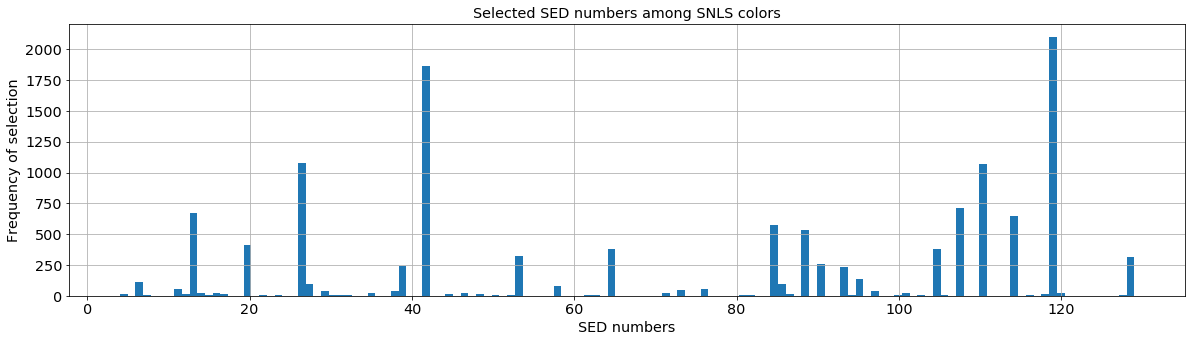

In [45]:
plt.figure(figsize=(20,5))
plt.hist(y_pred,bins=X_train.shape[0])
plt.grid()
plt.title("Selected SED numbers among SNLS colors")
plt.xlabel("SED numbers")
plt.ylabel("Frequency of selection")

In [46]:
nentries,xedge=np.histogram(y_pred,bins=X_train.shape[0],range=(0,X_train.shape[0]))

In [47]:
nentries

array([   0,    0,    0,    0,   12,    0,  112,    4,    0,    0,    0,
         57,   11,  672,   24,   10,   20,   16,    0,    0,  413,    0,
          4,    0,   10,    0, 1080,   94,    0,   37,    3,    6,    6,
          0,    2,   20,    1,    0,   38,  244,    0,    0, 1867,    0,
          0,   16,   19,    0,   16,    1,    4,    0,    7,  322,    1,
          0,    1,    0,   77,    0,    2,    0,    9,    9,    0,  377,
          2,    1,    0,    0,    0,   21,    0,   44,    0,    0,   58,
          1,    0,    0,    0,    4,    4,    0,    0,  573,   96,   12,
        532,    0,  261,    0,    0,  235,    5,  133,    2,   39,    0,
          0,    3,   21,    0,   10,    0,  377,    8,    0,  713,    0,
       1071,    0,    0,    2,  646,    0,    8,    0,   16, 2101,   21,
          0,    0,    0,    0,    0,    0,    0,    7,  311,    0])

In [48]:
X_train[:,0].shape

(131,)

In [49]:
jet =plt.get_cmap('jet') 
VMAX=nentries.max()
VMIN=nentries.min()

print VMIN,VMAX
cNorm  = colors.Normalize(vmin=VMIN, vmax=VMAX)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
colorVal = scalarMap.to_rgba(nentries,alpha=1)

0 2101


## Check the SED magnitude location wrt frequency of its selection in SNLS catalog

In [50]:
def Plot2DColorsSED(X_train,Y):
    fig, axes = plt.subplots(1, 3,figsize=(20,5))
 
    jet =plt.get_cmap('jet') 
    
    nentries,xedge=np.histogram(Y,bins=X_train.shape[0],range=(0,X_train.shape[0]))
    
    VMAX=nentries.max()
    VMIN=nentries.min()
    
    normalize = mpl.colors.Normalize(vmin=VMIN, vmax=VMAX)
    
    # U-G and G-R
    XMIN=X_train[:,0].min()
    XMAX=X_train[:,0].max()
    YMIN=X_train[:,1].min()
    YMAX=X_train[:,1].max()
    
    
    sc1=axes[0].scatter(X_train[:,0],X_train[:,1],marker='o',s=30,vmin=VMIN,vmax=VMAX,c=nentries,label='pickles',cmap=jet)
    #plt.colorbar(sc1,cax=axes[0])
    axes[0].grid()
    axes[0].legend()
    axes[0].set_xlabel('u-g',fontsize=16,fontweight='bold')
    axes[0].set_ylabel('g-r',fontsize=16,fontweight='bold')
    axes[0].set_xlim(XMIN,XMAX)
    axes[0].set_ylim(YMIN,YMAX)
    # Optionally add a colorbar
    cax, _ = mpl.colorbar.make_axes(axes[0])
    cbar = mpl.colorbar.ColorbarBase(cax, cmap=jet,norm=normalize)


    # ----   G-R and R-I --------------------
    XMIN=X_train[:,1].min()
    XMAX=X_train[:,1].max()
    YMIN=X_train[:,2].min()
    YMAX=X_train[:,2].max()
    
    
    sc2=axes[1].scatter(X_train[:,1],X_train[:,2],marker='o',s=30,vmin=VMIN,vmax=VMAX,c=nentries,label='pickles',cmap=jet)
    #plt.colorbar(sc2,cax=axes[1])
    axes[1].grid()
    axes[1].legend()
    axes[1].set_xlabel('g-r',fontsize=16,fontweight='bold')
    axes[1].set_ylabel('r-i',fontsize=16,fontweight='bold')
    axes[1].set_xlim(XMIN,XMAX)
    axes[1].set_ylim(YMIN,YMAX)
     # Optionally add a colorbar
    cax, _ = mpl.colorbar.make_axes(axes[1])
    cbar = mpl.colorbar.ColorbarBase(cax, cmap=jet,norm=normalize)

    # ----  R-I and I-Z --------------------
    XMIN=X_train[:,2].min()
    XMAX=X_train[:,2].max()
    YMIN=X_train[:,3].min()
    YMAX=X_train[:,3].max()
    
    sc3=axes[2].scatter(X_train[:,2],X_train[:,3],marker='o',s=30,vmin=VMIN,vmax=VMAX,c=nentries,label='pickles',cmap=jet)   
    #plt.colorbar(sc3,cax=axes[2])
    axes[2].grid()
    axes[2].legend()
    axes[2].set_xlabel('r-i',fontsize=16,fontweight='bold')
    axes[2].set_ylabel('i-z',fontsize=16,fontweight='bold')
    axes[2].set_xlim(XMIN,XMAX)
    axes[2].set_ylim(YMIN,YMAX)
     # Optionally add a colorbar
    cax, _ = mpl.colorbar.make_axes(axes[2])
    cbar = mpl.colorbar.ColorbarBase(cax, cmap=jet,norm=normalize)

    thetitle="Statistic of associated Pickles"
    
    plt.suptitle(thetitle,fontsize=25,fontweight='bold')

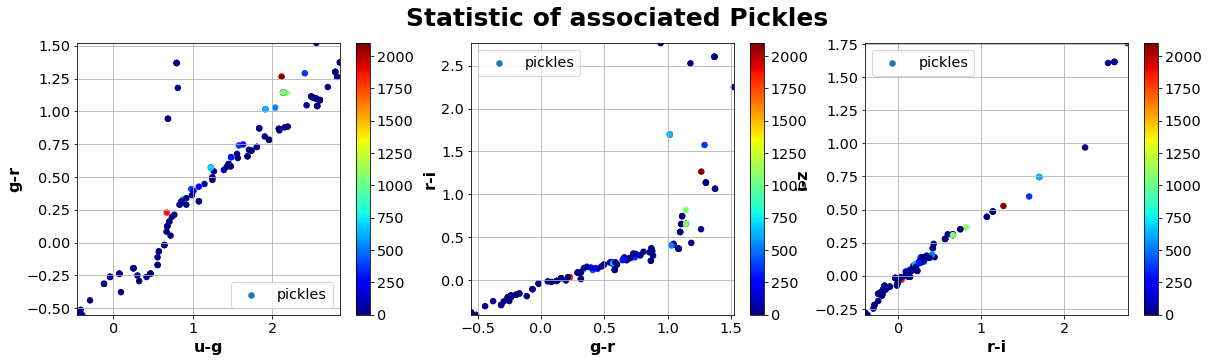

In [51]:
Plot2DColorsSED(X_train,y_pred)

## Check location of SNLS magnitudes and its associated SED pickles

In [52]:
def Plot2DColorsID(idx,X_train,X,Y):
    fig, axes = plt.subplots(1, 3,figsize=(20,6))

    
    # U-G and G-R
    XMIN=X_train[:,0].min()
    XMAX=X_train[:,0].max()
    YMIN=X_train[:,1].min()
    YMAX=X_train[:,1].max()
    
    # SED colors
    C1_sed=X_train[idx,0]
    C2_sed=X_train[idx,1]
    
    # selected SNLS objects
    index_sel=np.where(Y==idx)[0]
    
    C1_snls=X[index_sel,0]
    C2_snls=X[index_sel,1]    
    axes[0].scatter(C1_snls,C2_snls,marker='.',color="blue",label='snls')
    axes[0].scatter([C1_sed],[C2_sed],marker='o',s=30,color="red",label='pickles')
    axes[0].grid()
    axes[0].legend()
    axes[0].set_xlabel('u-g',fontsize=16,fontweight='bold')
    axes[0].set_ylabel('g-r',fontsize=16,fontweight='bold')
    axes[0].set_xlim(XMIN,XMAX)
    axes[0].set_ylim(YMIN,YMAX)


    # ----   G-R and R-I --------------------
    XMIN=X_train[:,1].min()
    XMAX=X_train[:,1].max()
    YMIN=X_train[:,2].min()
    YMAX=X_train[:,2].max()
    
    # SED colors
    C1_sed=X_train[idx,1]
    C2_sed=X_train[idx,2]
    
    # selected SNLS objects
    index_sel=np.where(Y==idx)[0]
    
    C1_snls=X[index_sel,1]
    C2_snls=X[index_sel,2]  
    
    axes[1].scatter(C1_snls,C2_snls,marker='.',color="blue",label='snls')
    axes[1].scatter([C1_sed],[C2_sed],marker='o',s=30,color="red",label='pickles')
    axes[1].grid()
    axes[1].legend()
    axes[1].set_xlabel('g-r',fontsize=16,fontweight='bold')
    axes[1].set_ylabel('r-i',fontsize=16,fontweight='bold')
    axes[1].set_xlim(XMIN,XMAX)
    axes[1].set_ylim(YMIN,YMAX)

    # ----  R-I and I-Z --------------------
    XMIN=X_train[:,2].min()
    XMAX=X_train[:,2].max()
    YMIN=X_train[:,3].min()
    YMAX=X_train[:,3].max()
    
    # SED colors
    C1_sed=X_train[idx,2]
    C2_sed=X_train[idx,3]
    
    # selected SNLS objects
    index_sel=np.where(Y==idx)[0]
    
    C1_snls=X[index_sel,2]
    C2_snls=X[index_sel,3]  
    
    axes[2].scatter(C1_snls,C2_snls,marker='.',color="blue",label='snls')
    axes[2].scatter([C1_sed],[C2_sed],marker='o',s=30,color="red",label='pickles')
    axes[2].grid()
    axes[2].legend()
    axes[2].set_xlabel('r-i',fontsize=16,fontweight='bold')
    axes[2].set_ylabel('i-z',fontsize=16,fontweight='bold')
    axes[2].set_xlim(XMIN,XMAX)
    axes[2].set_ylim(YMIN,YMAX)

    thetitle="Closest SNLS colors obj for Pickle id = {}".format(idx)
    
    plt.suptitle(thetitle,fontsize=25,fontweight='bold')

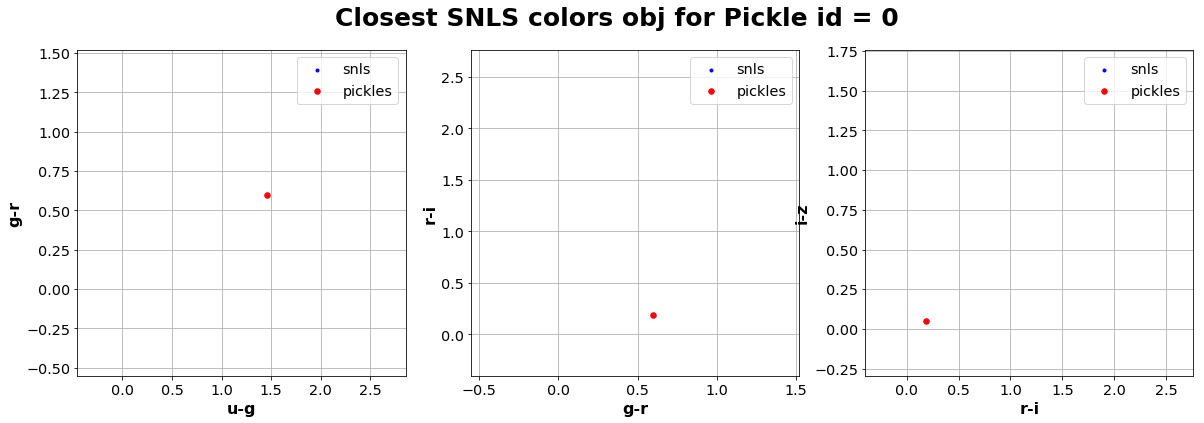

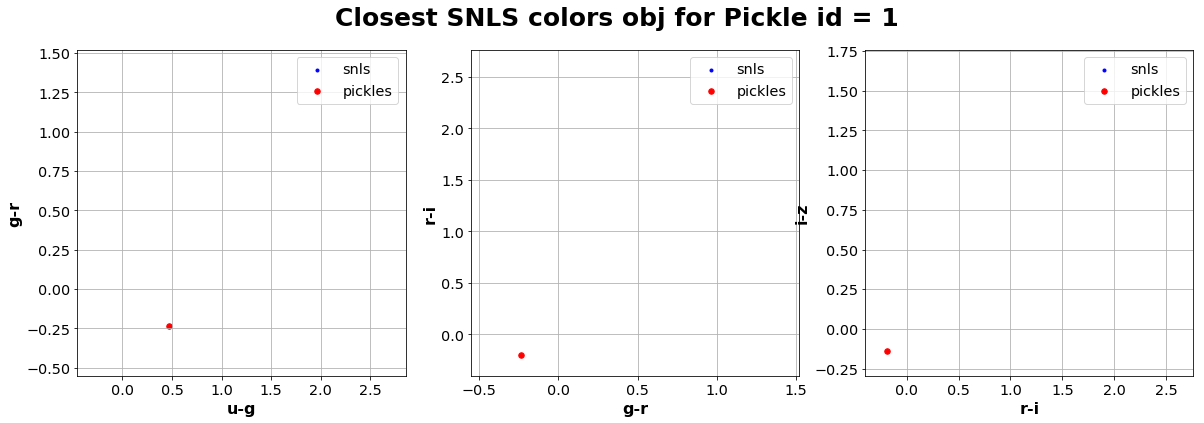

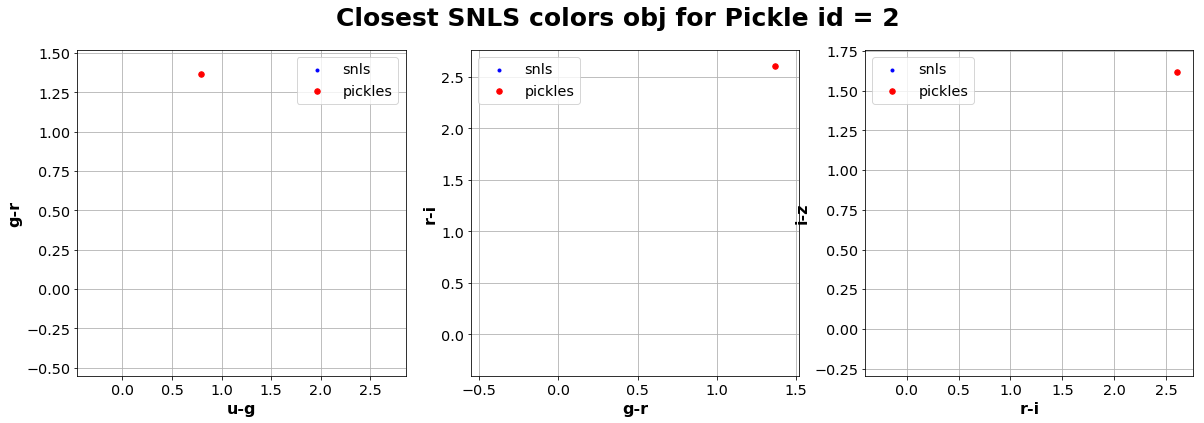

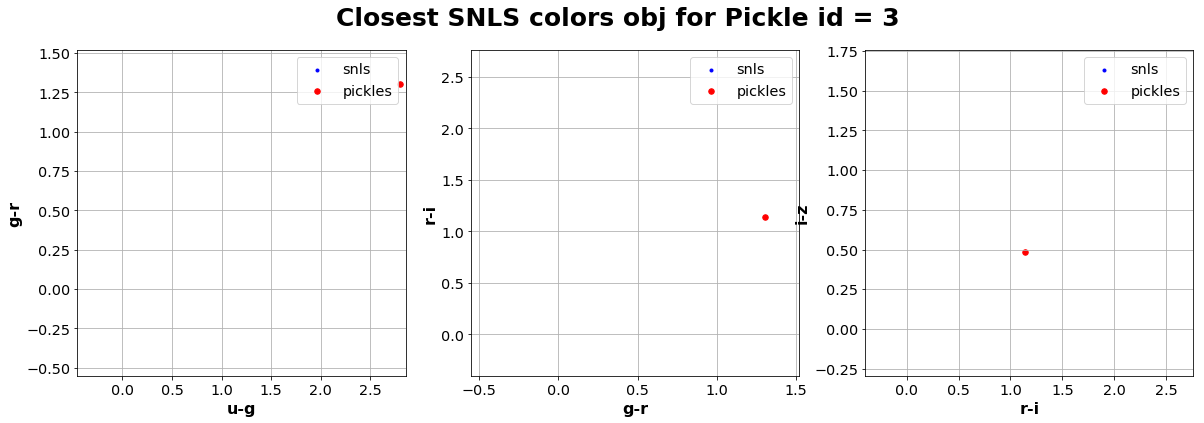

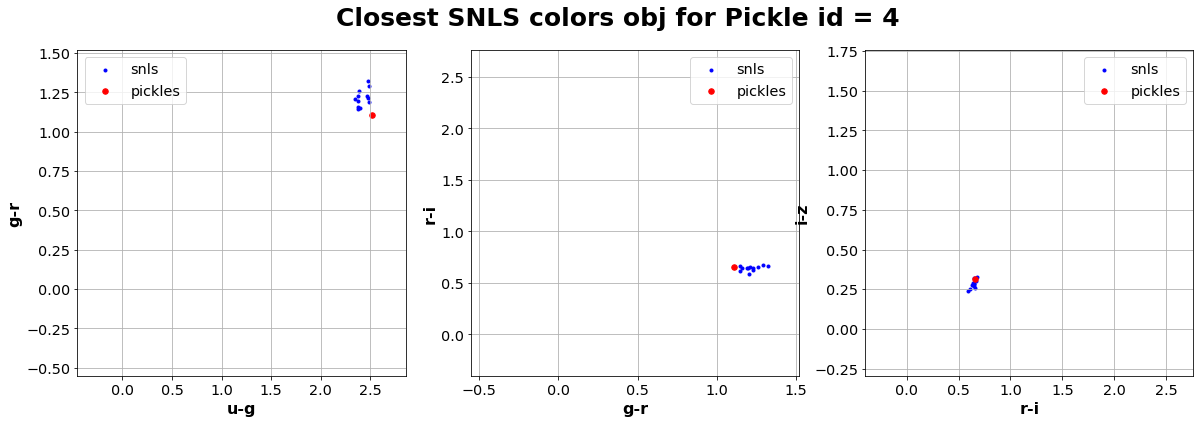

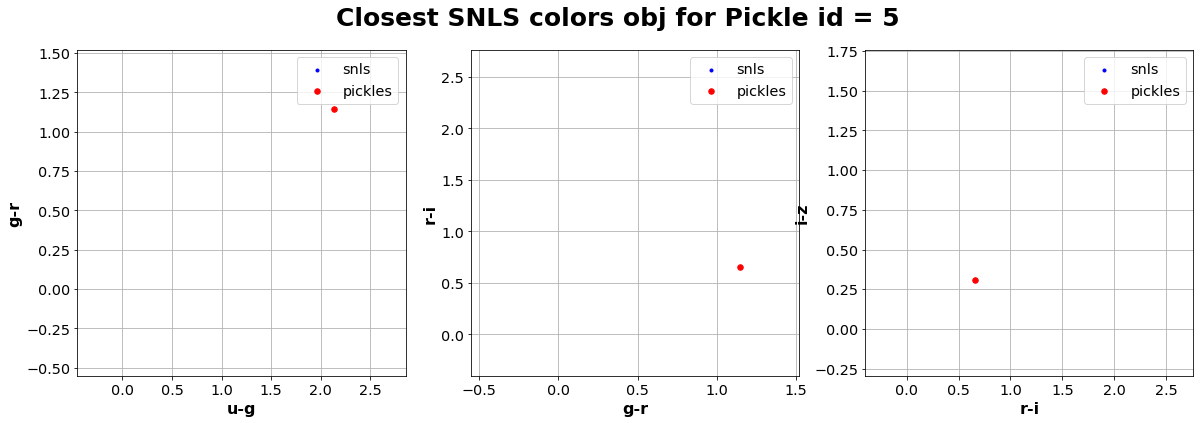

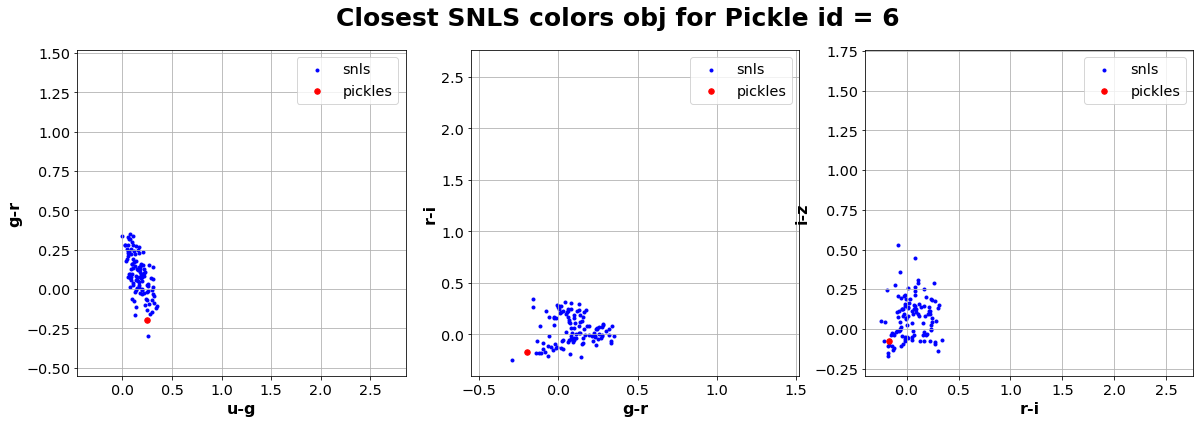

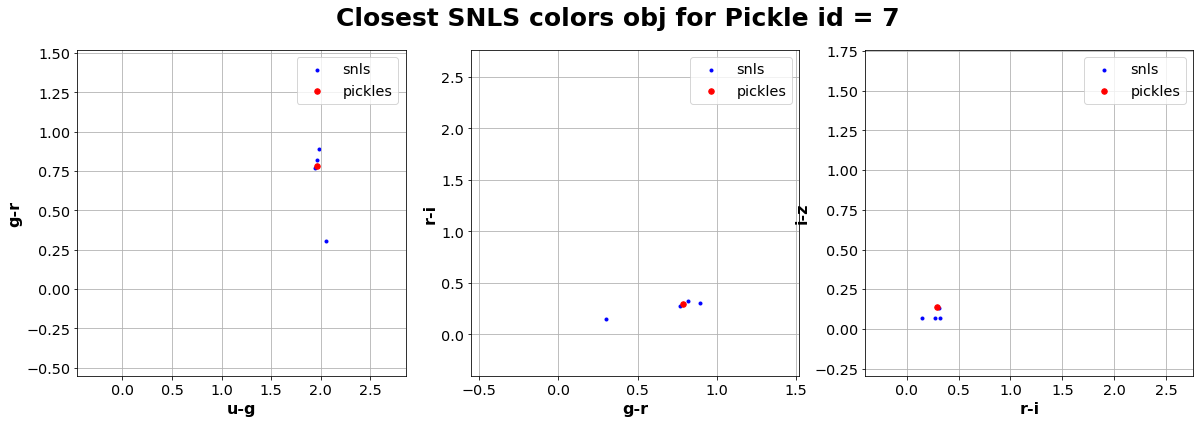

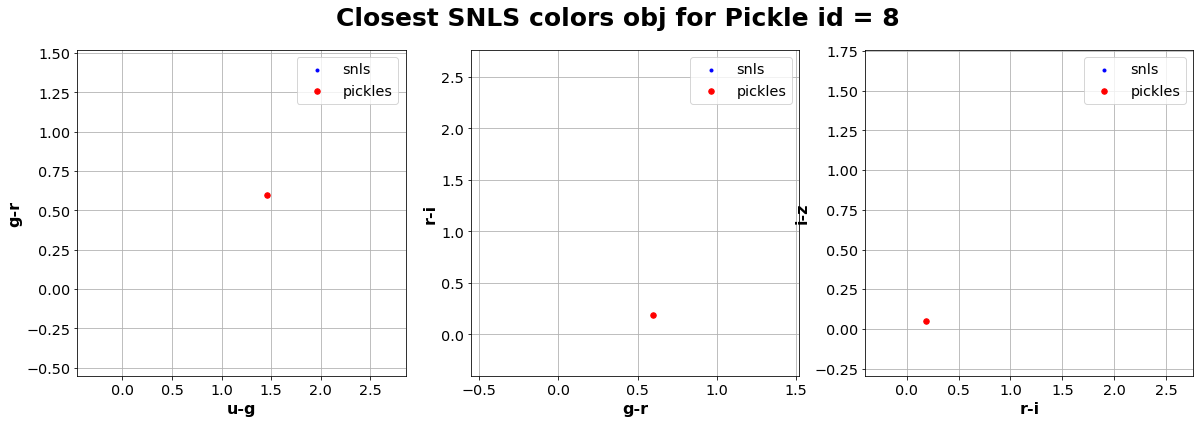

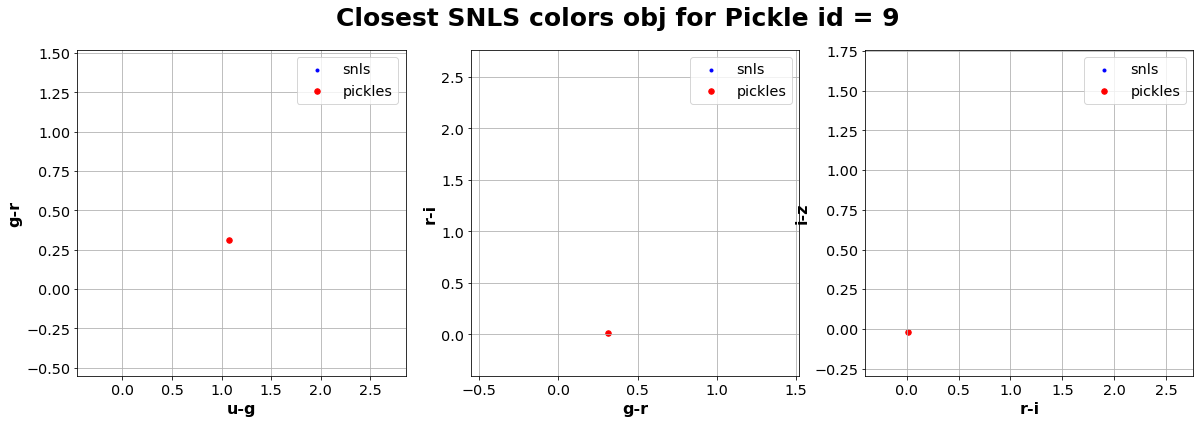

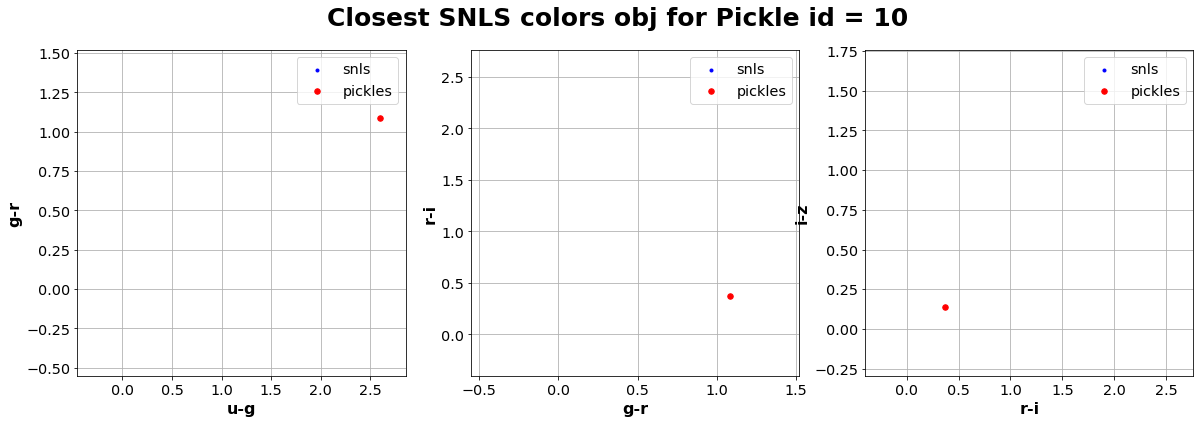

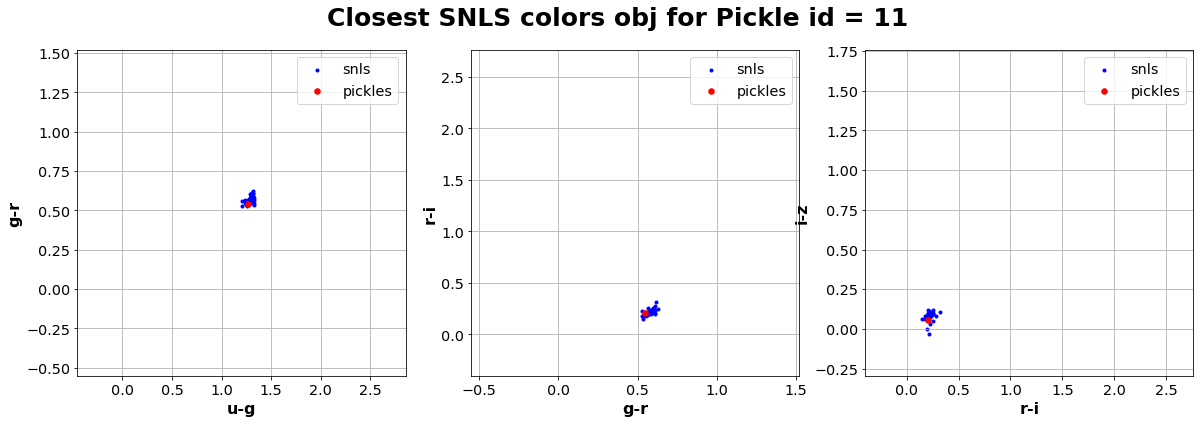

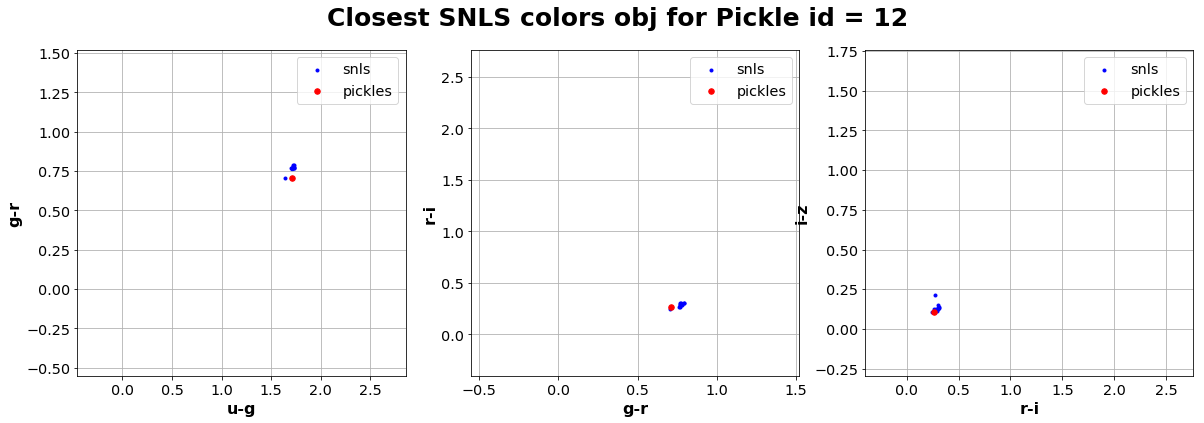

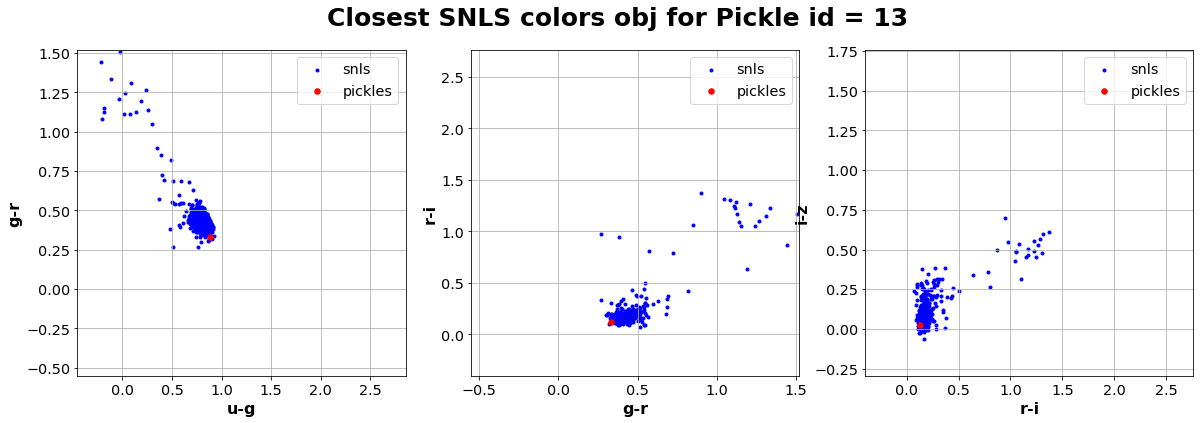

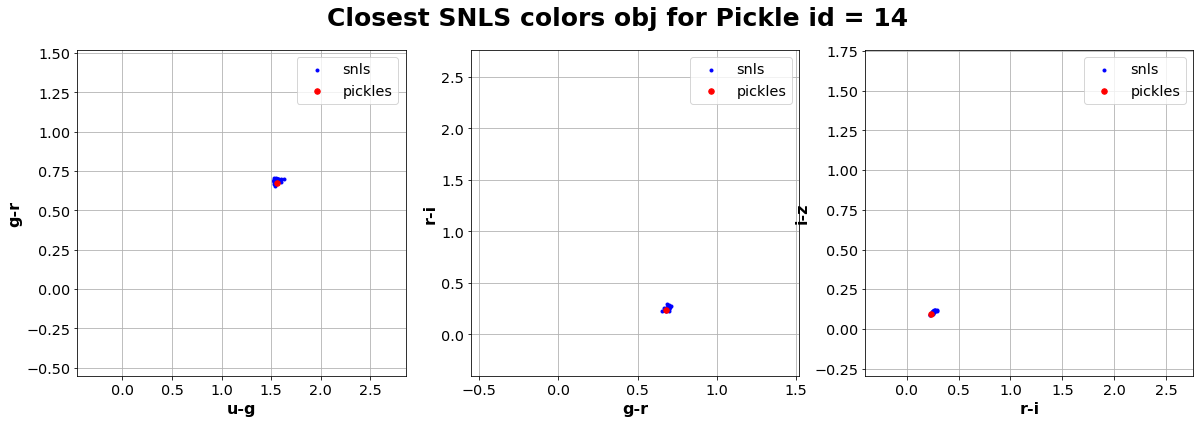

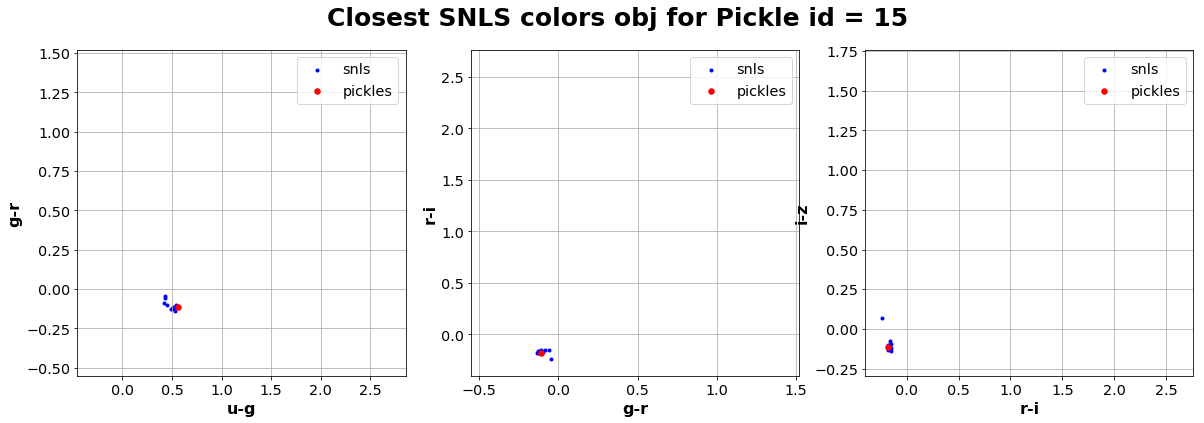

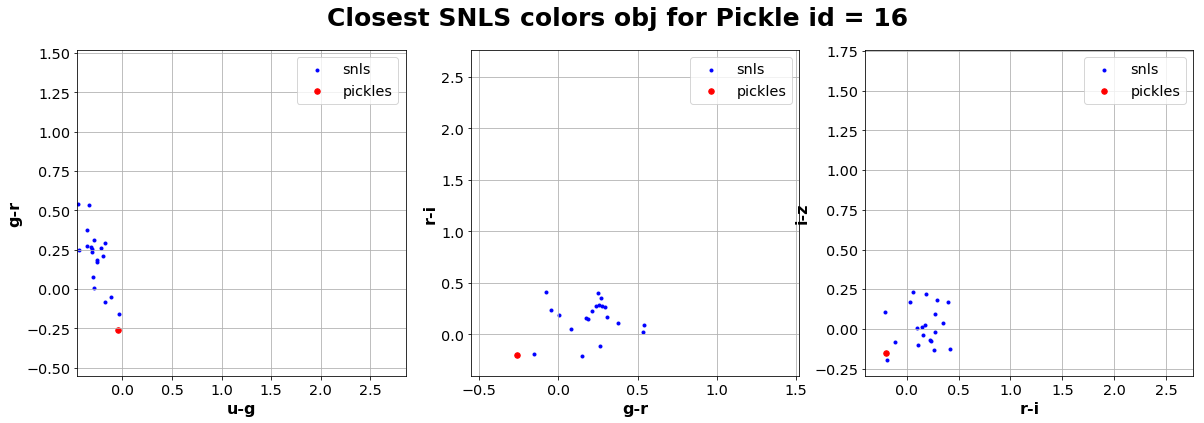

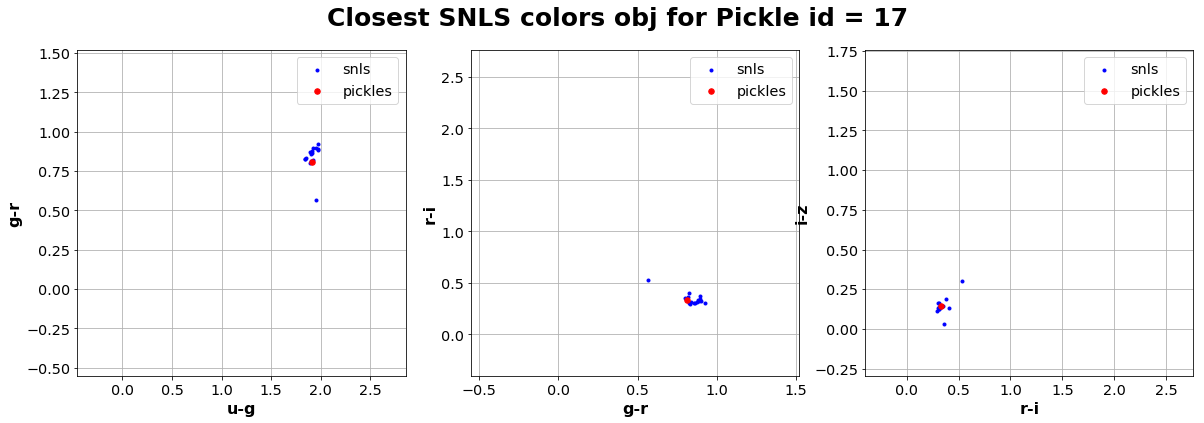

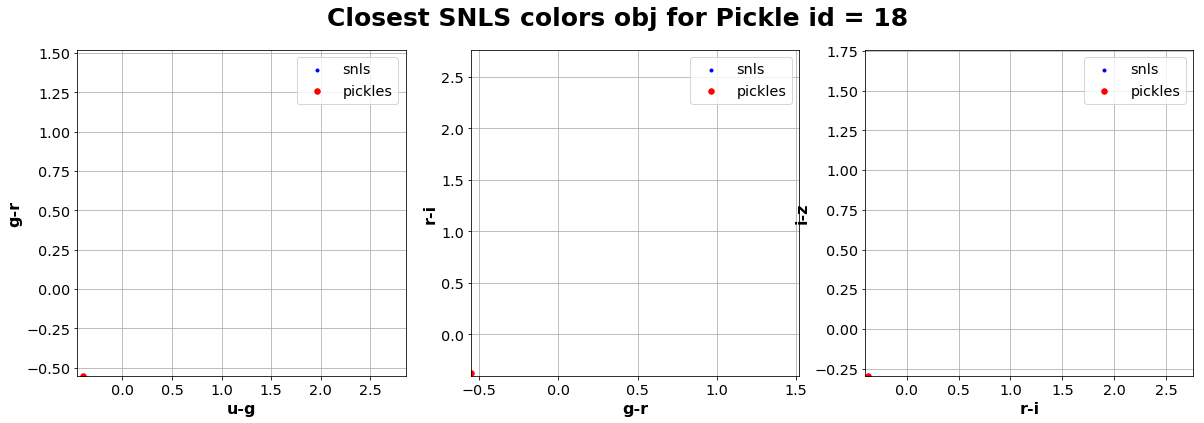

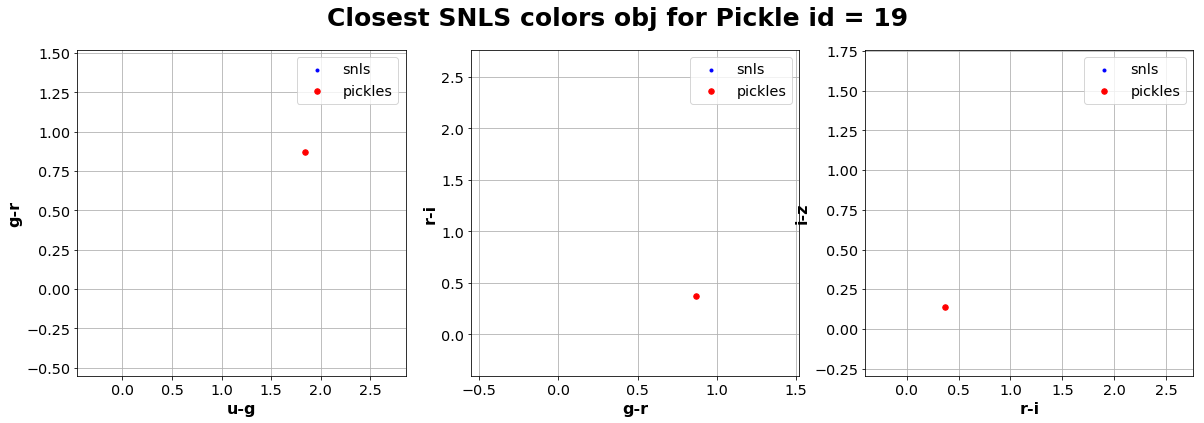

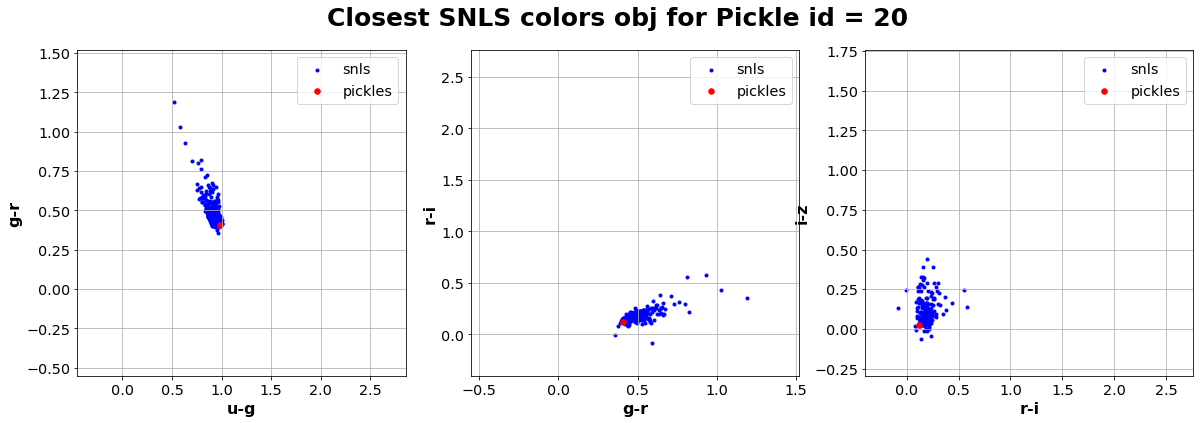

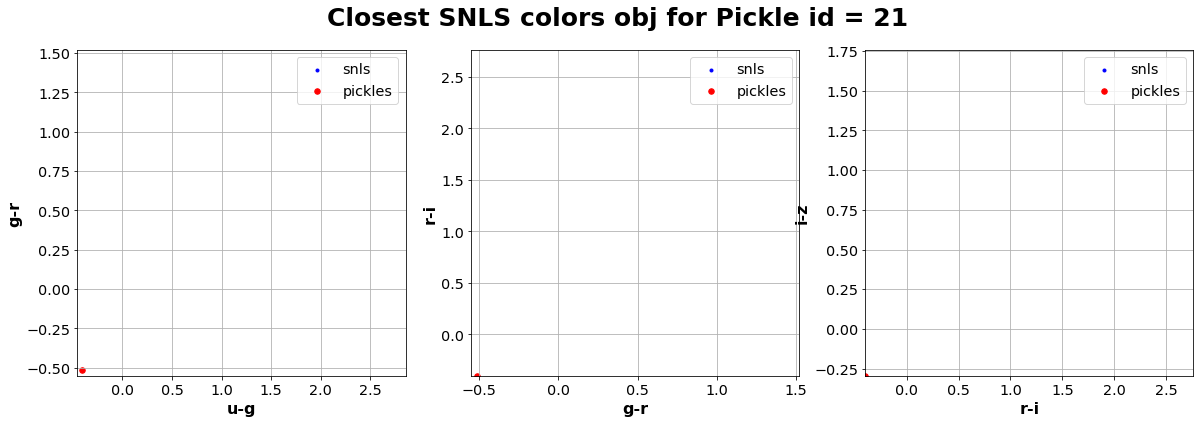

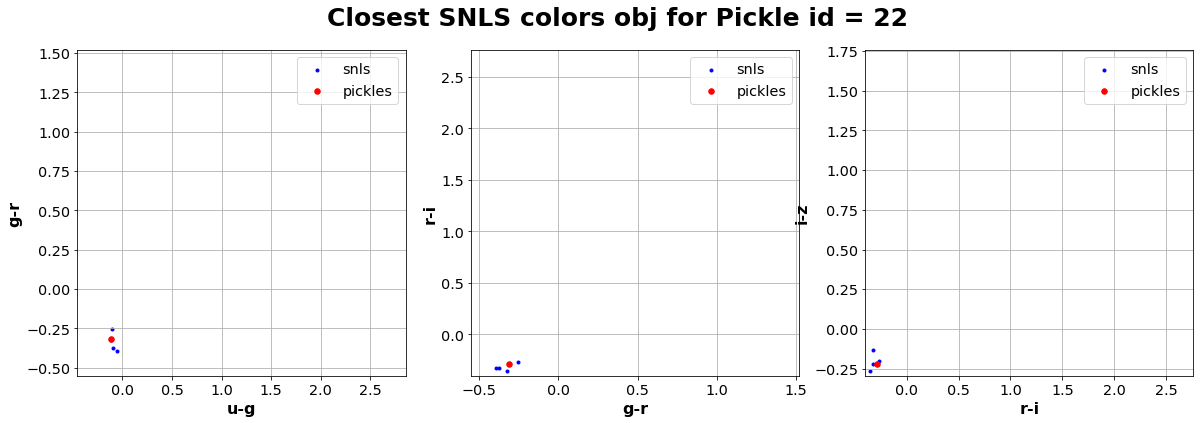

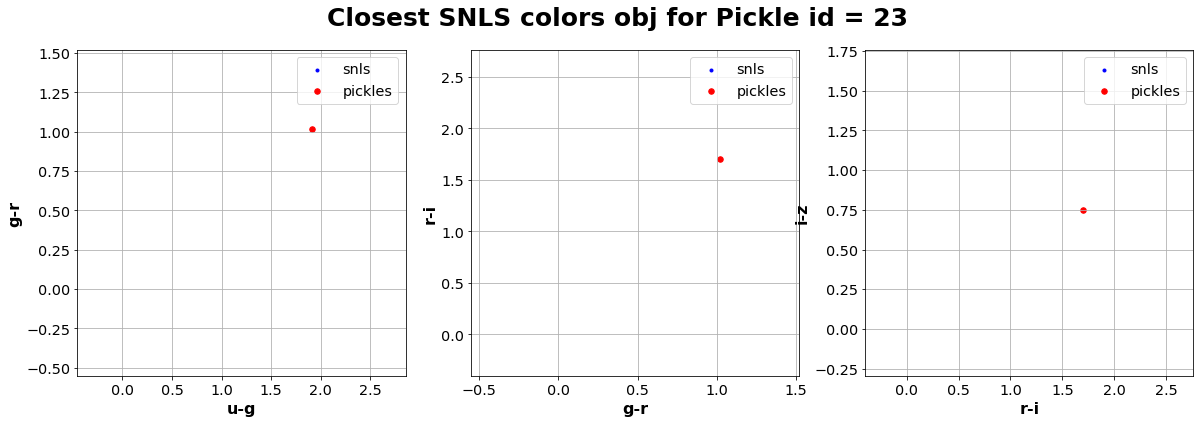

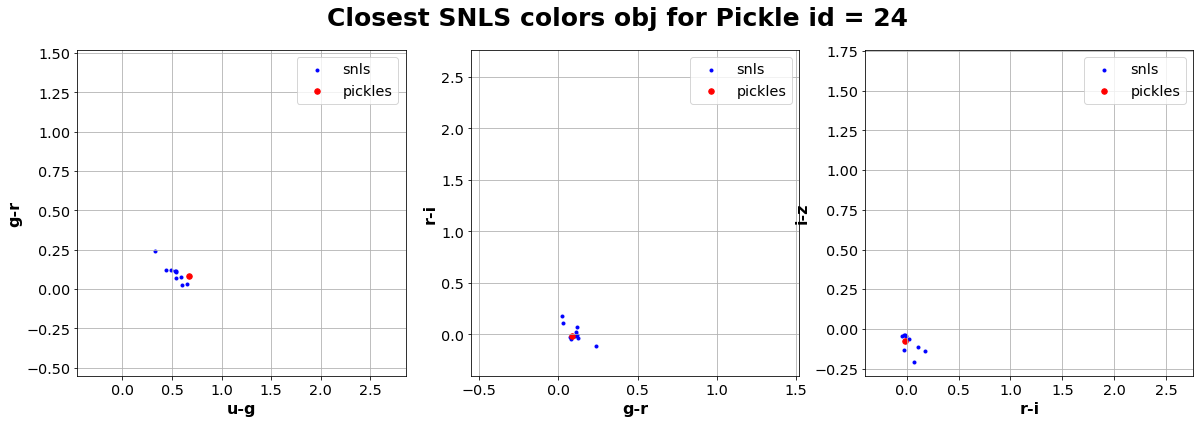

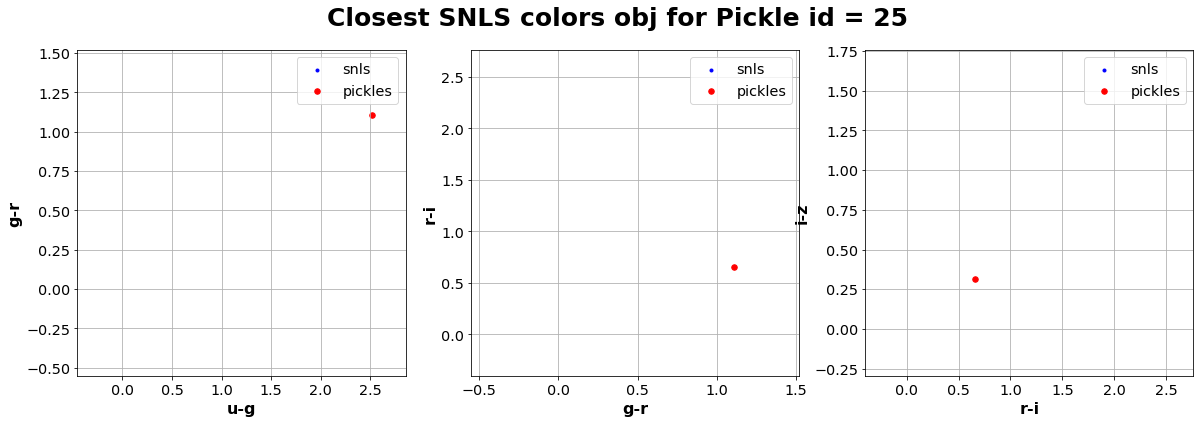

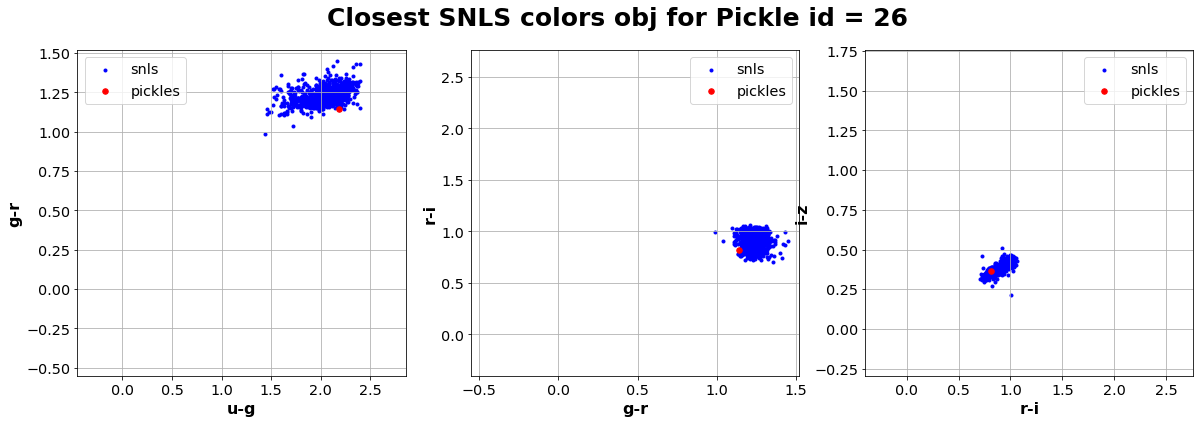

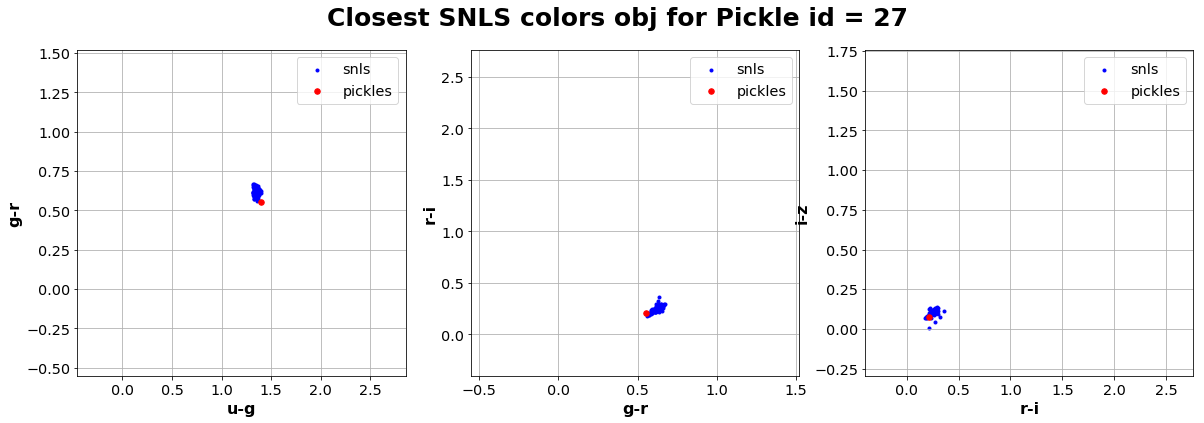

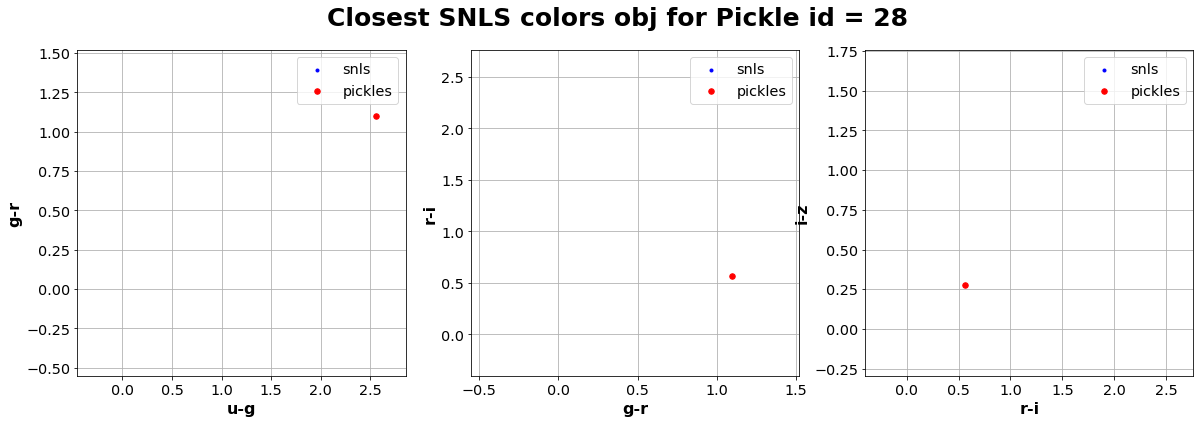

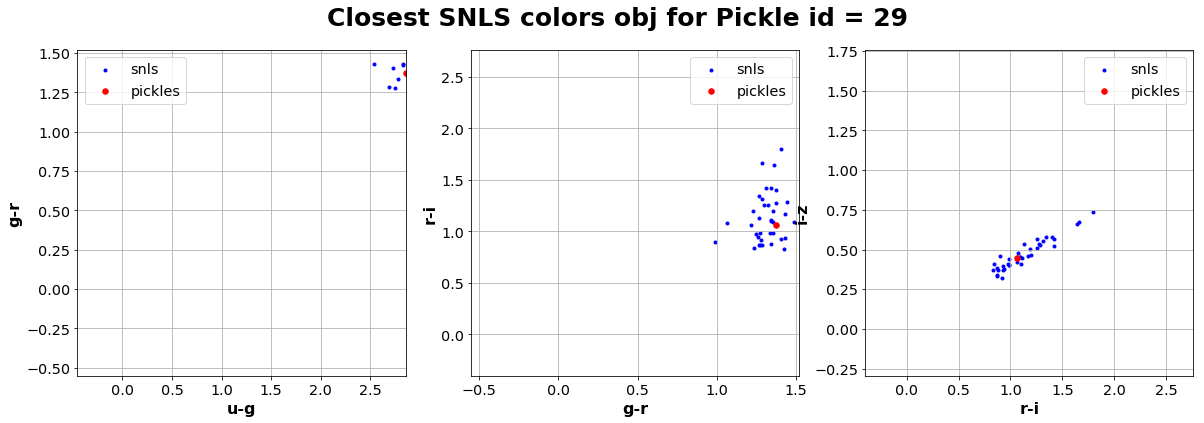

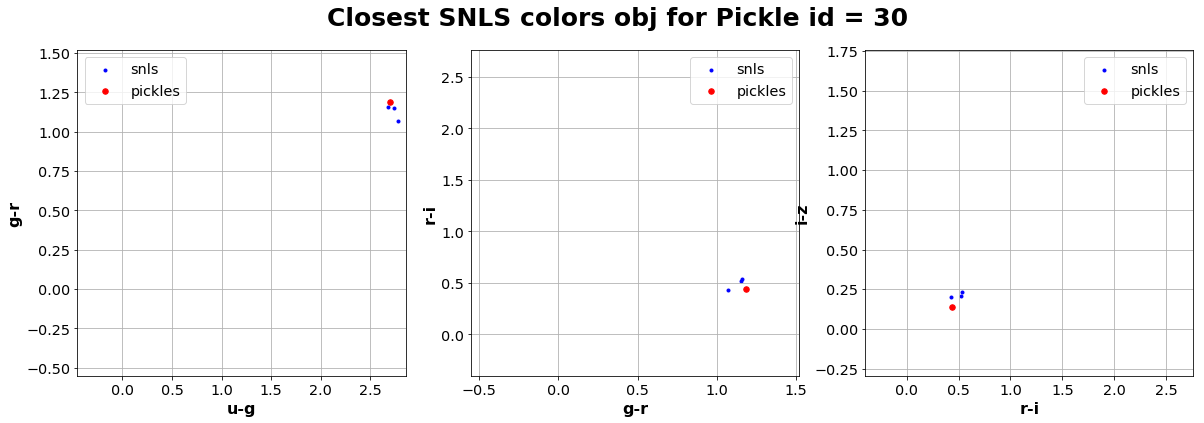

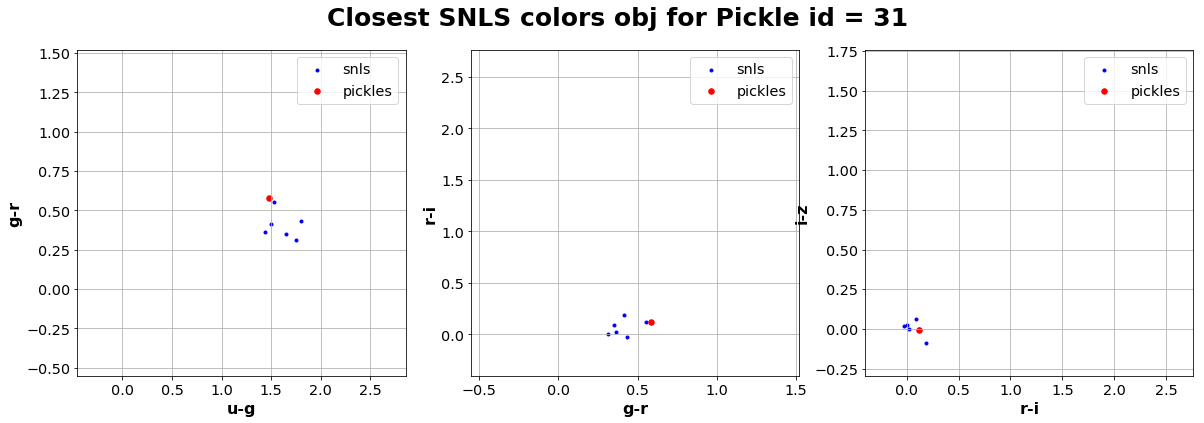

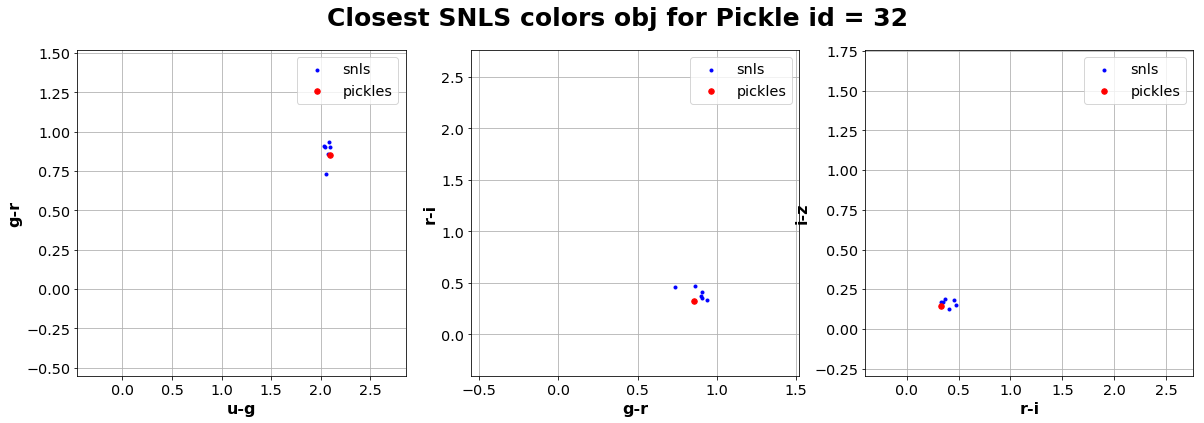

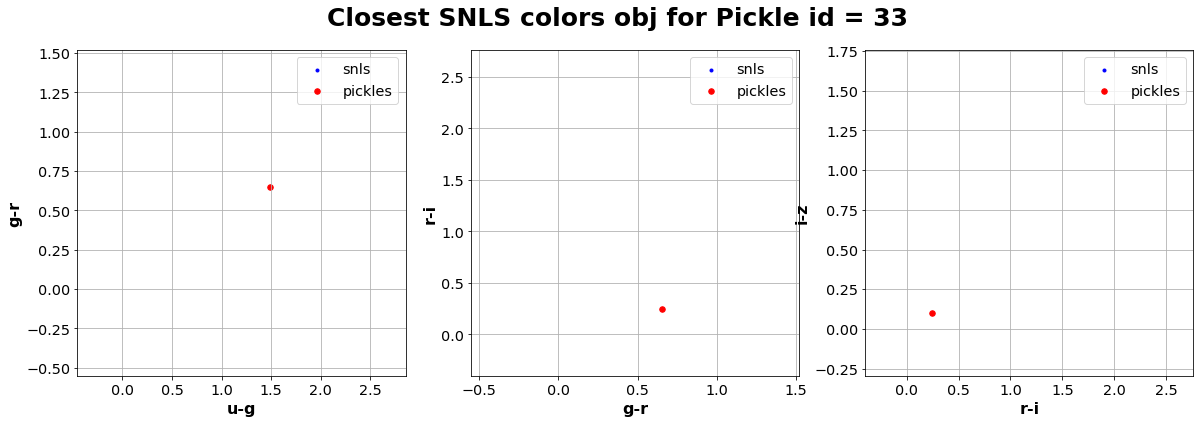

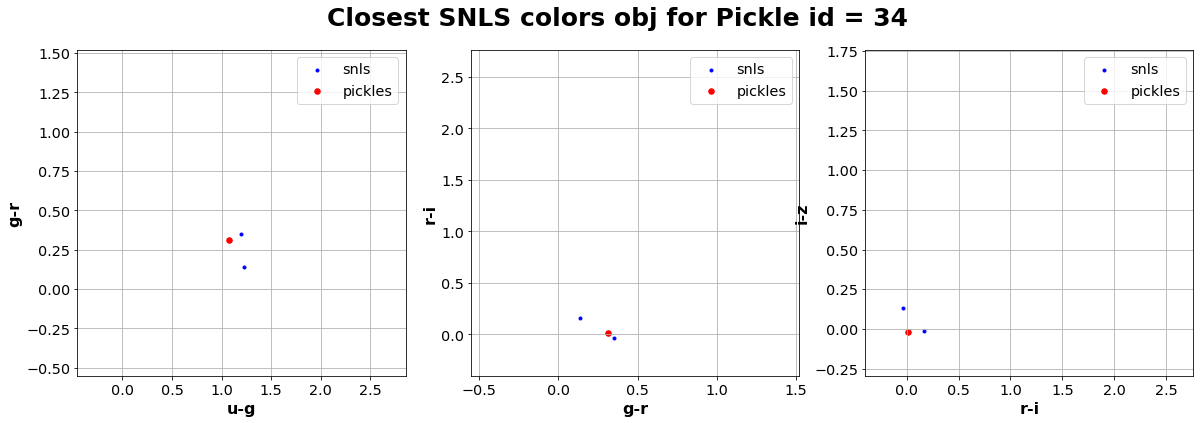

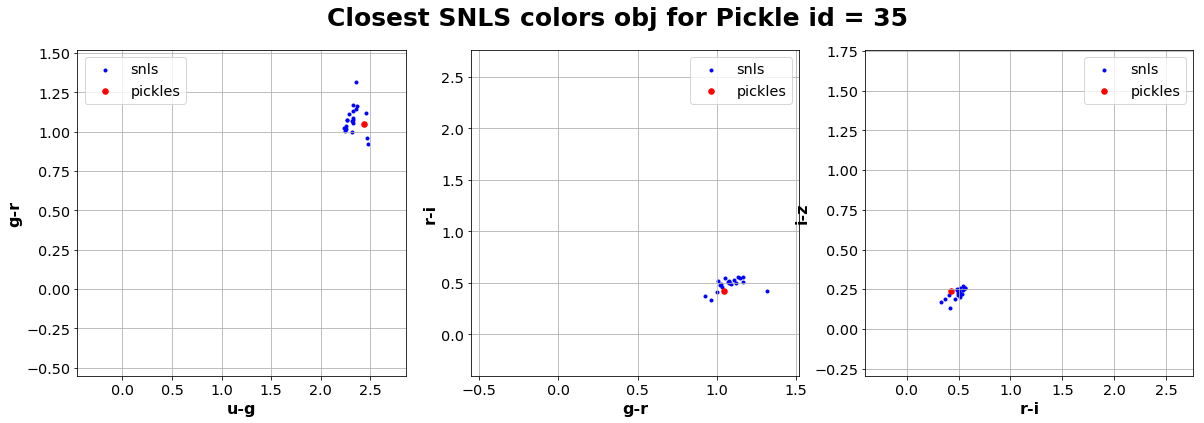

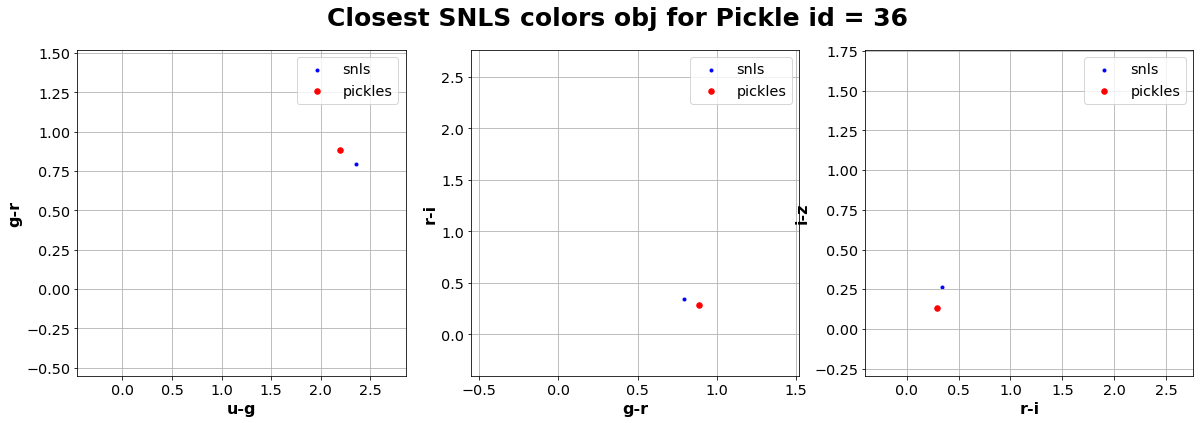

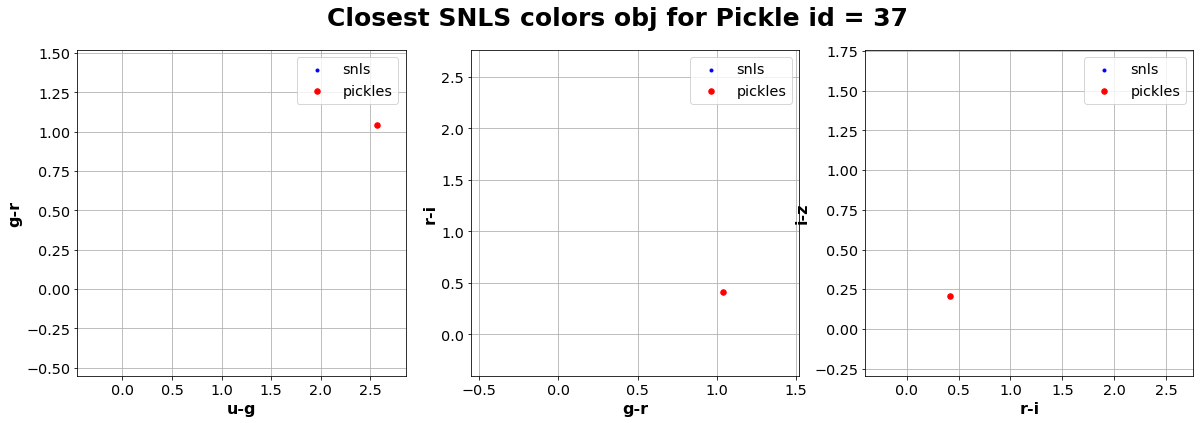

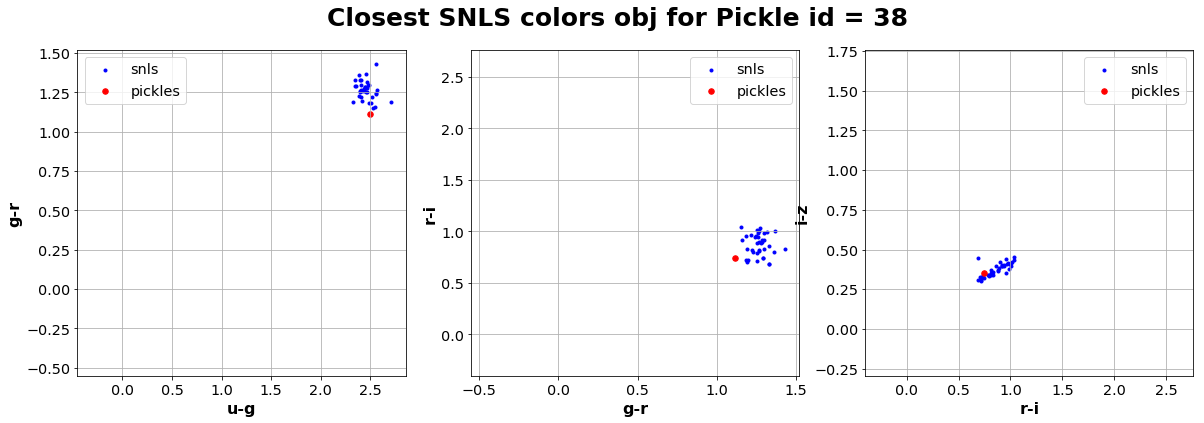

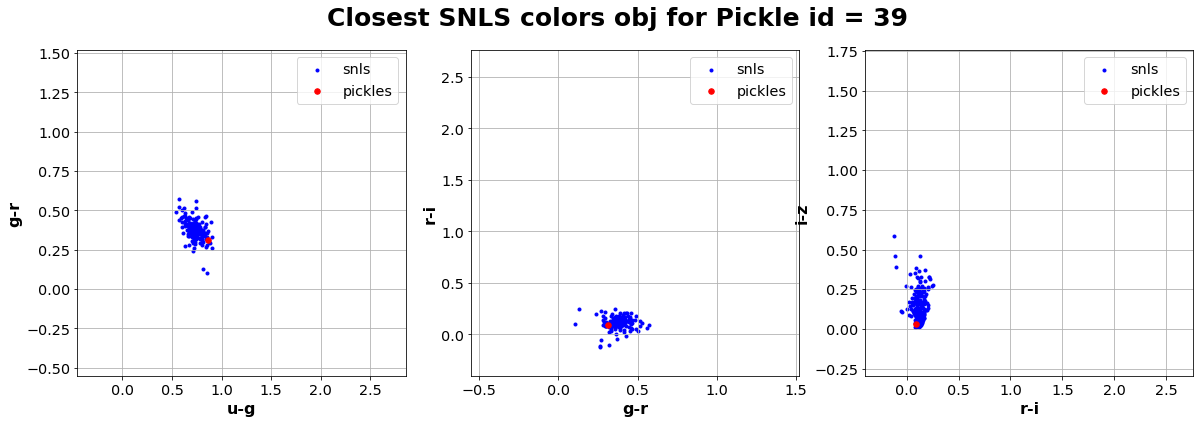

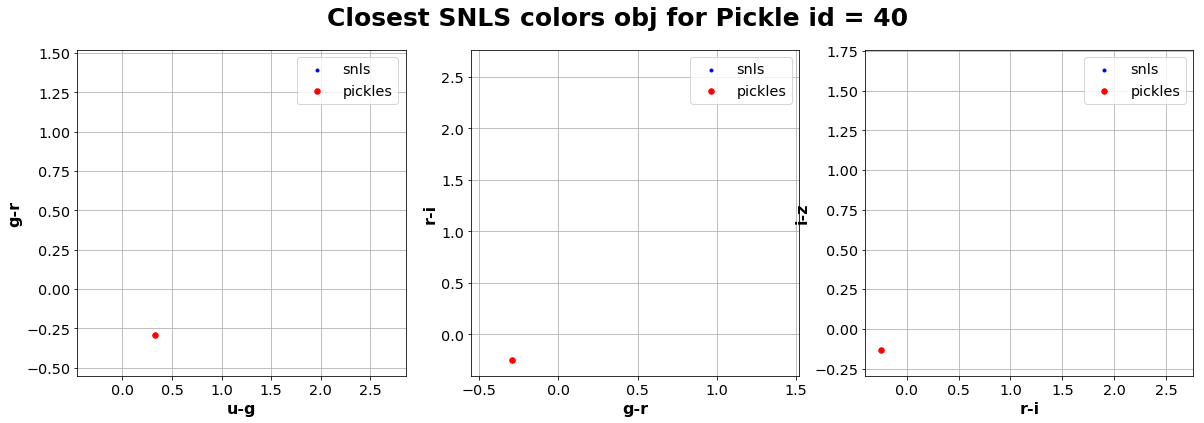

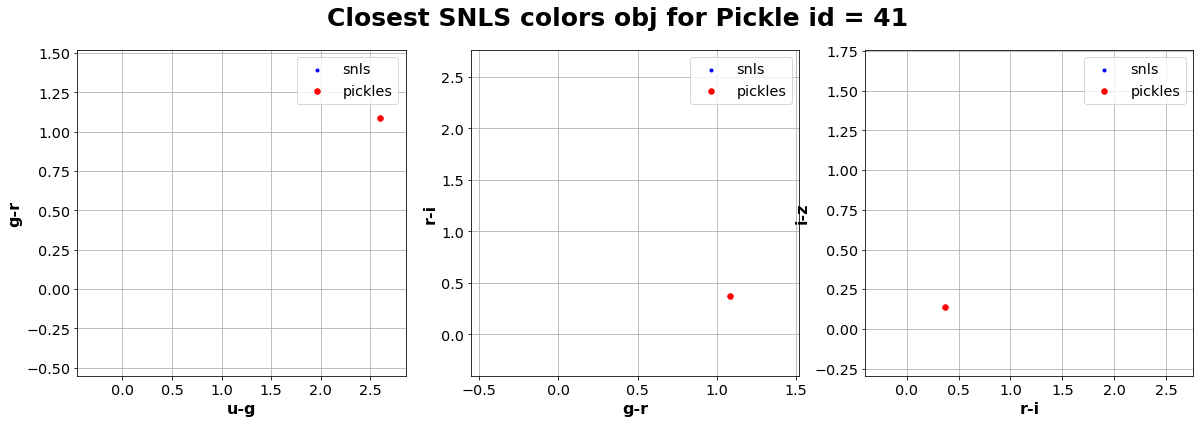

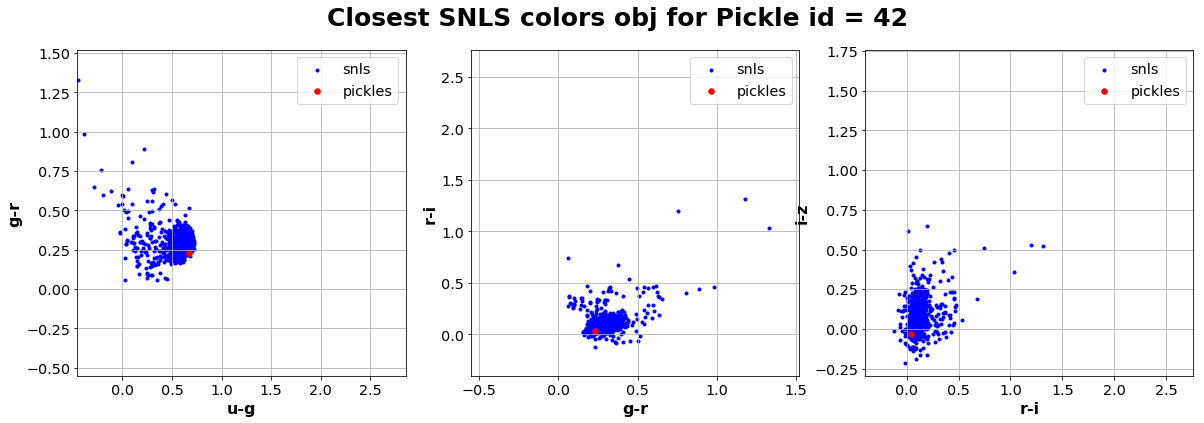

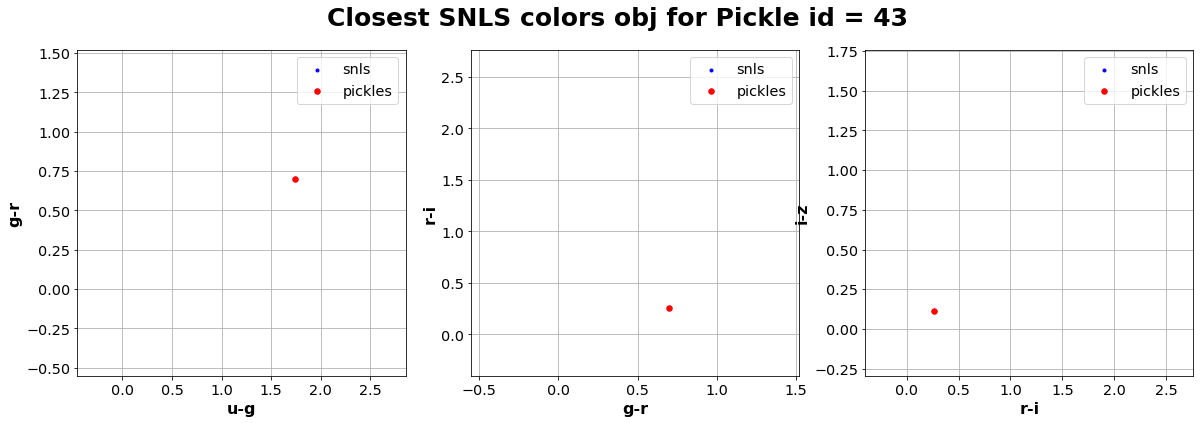

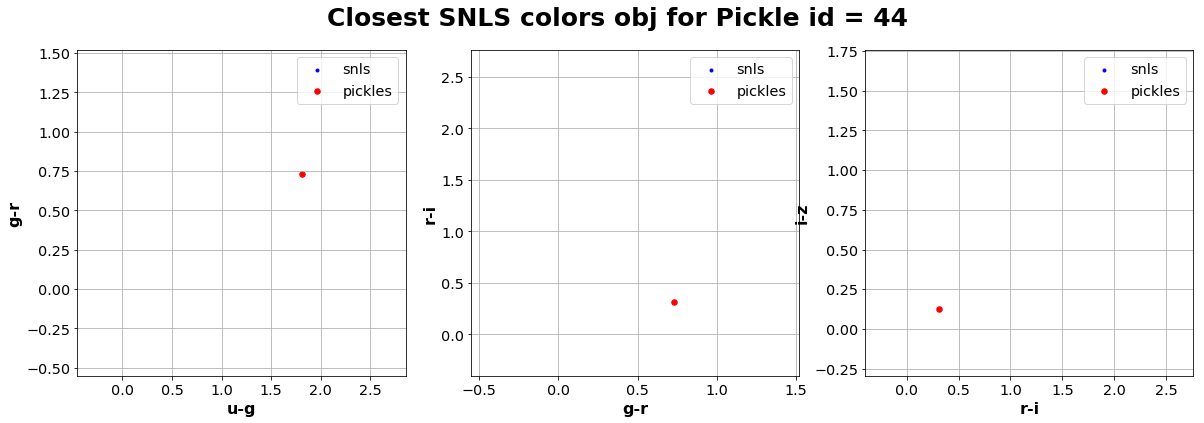

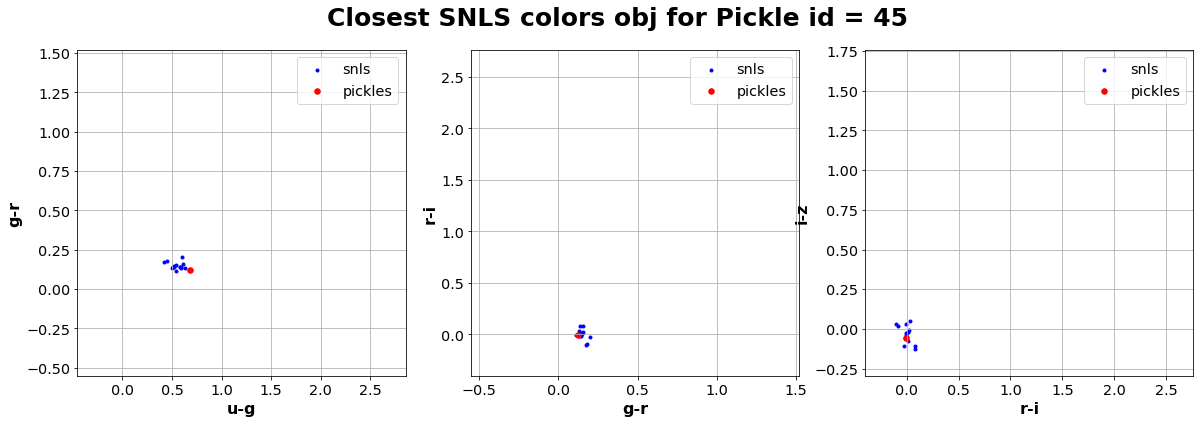

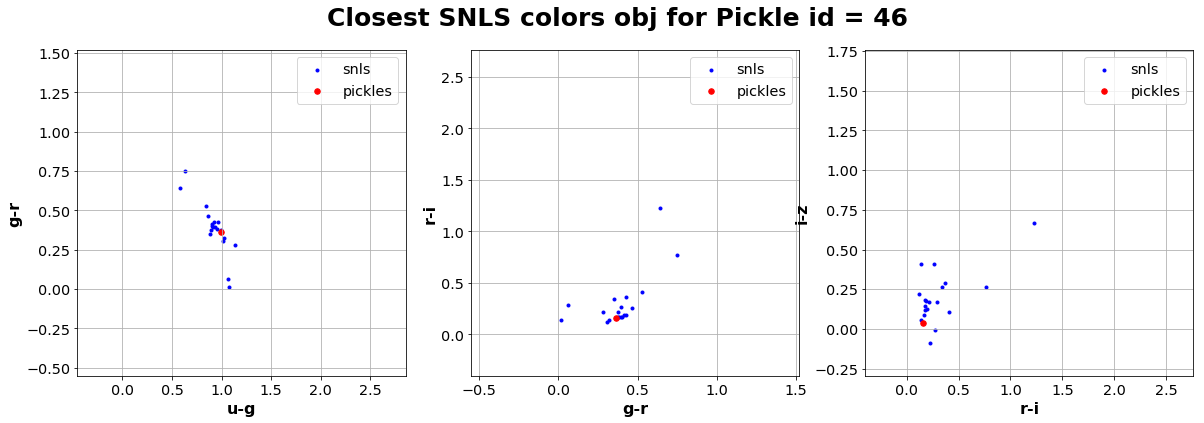

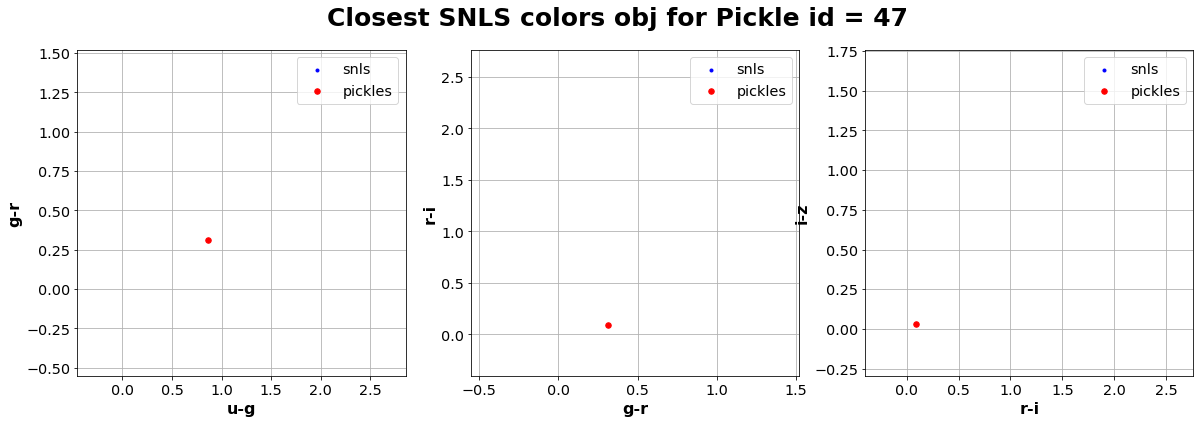

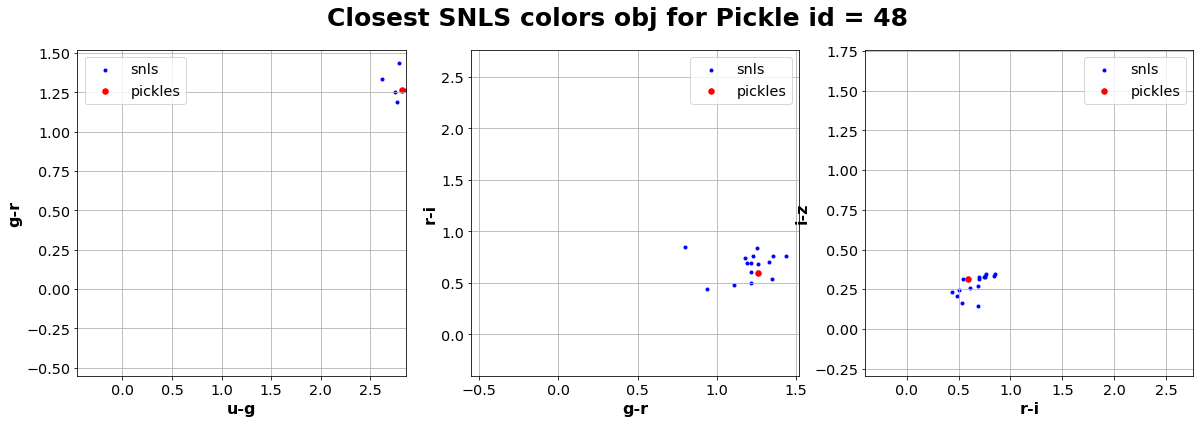

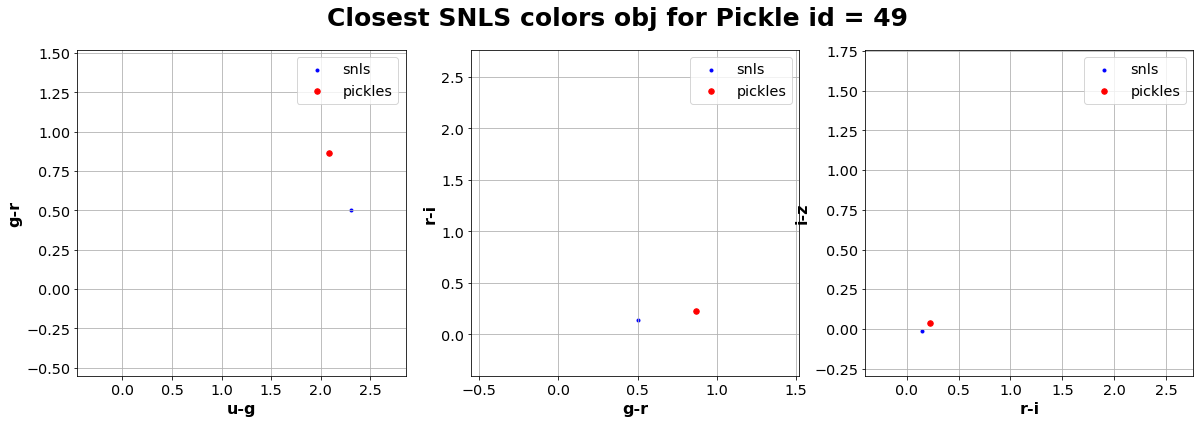

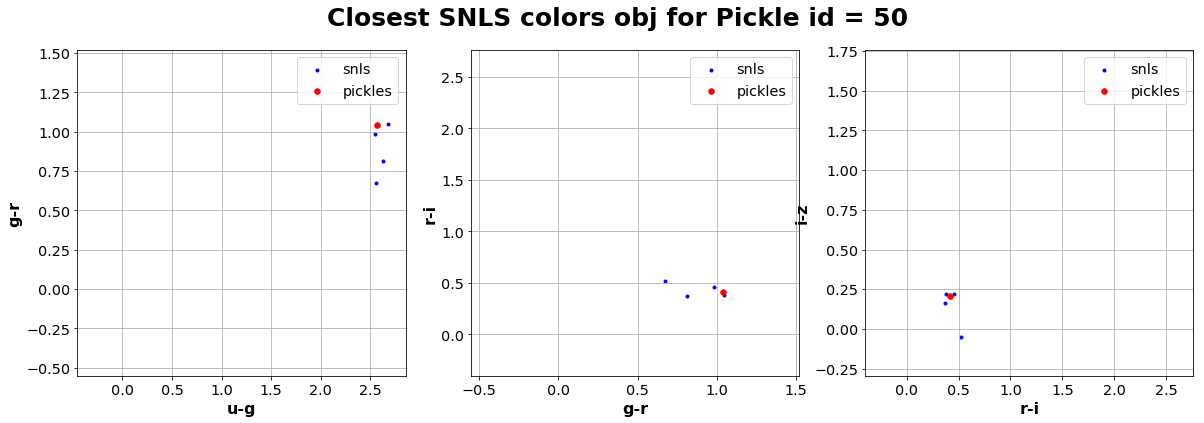

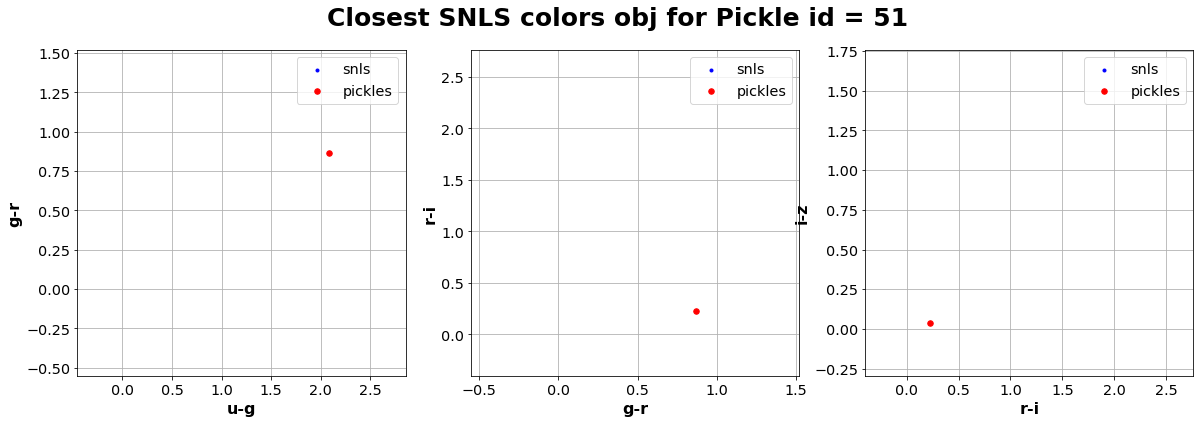

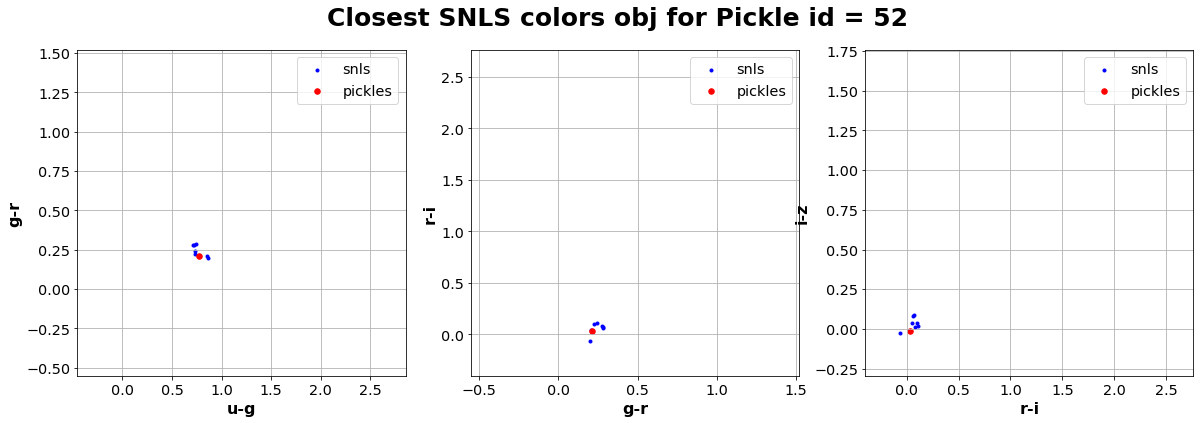

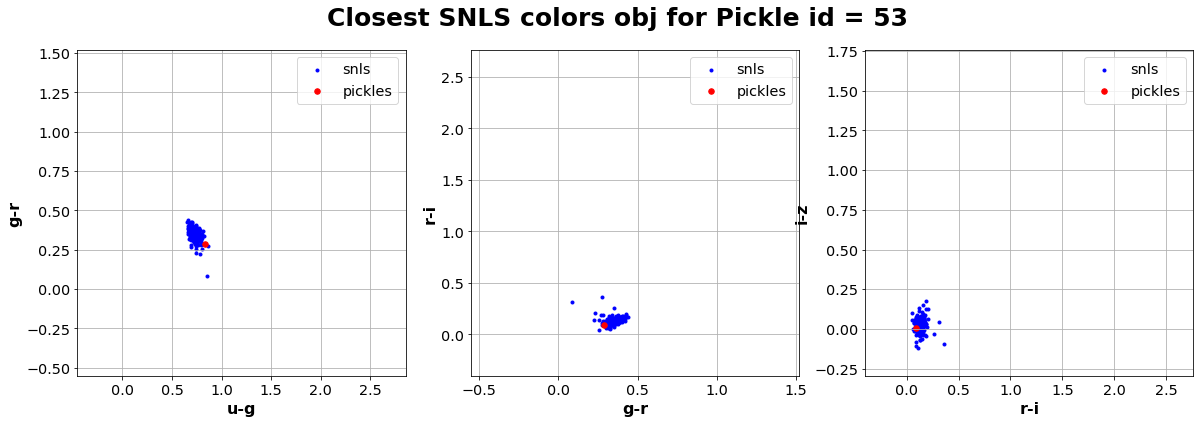

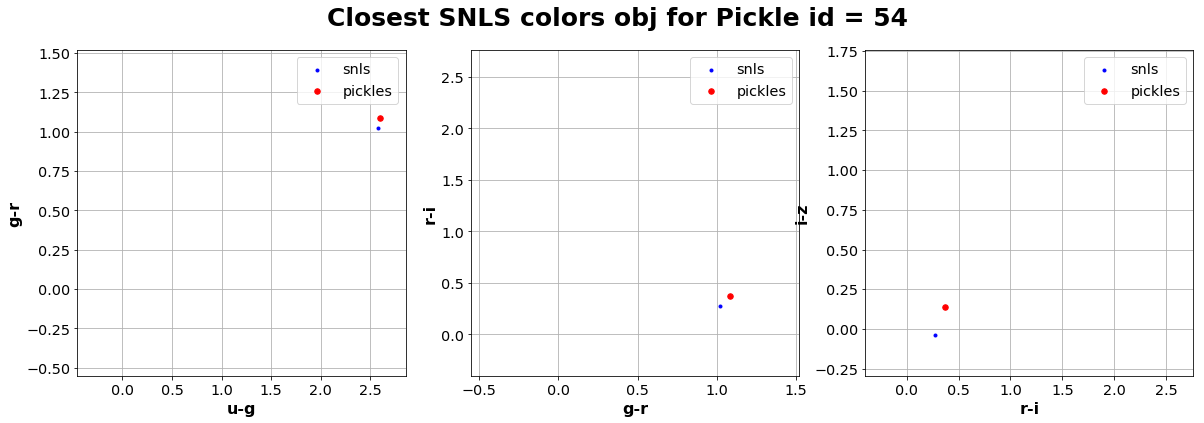

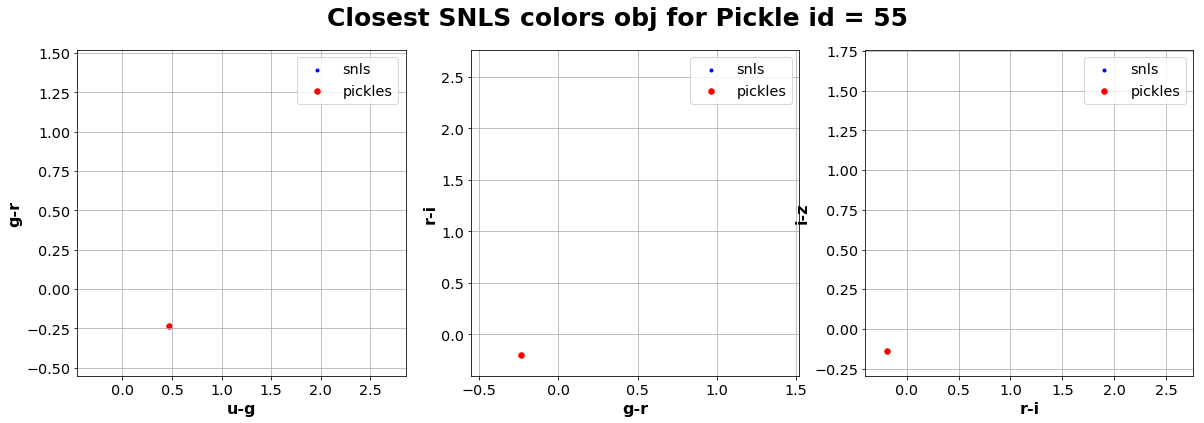

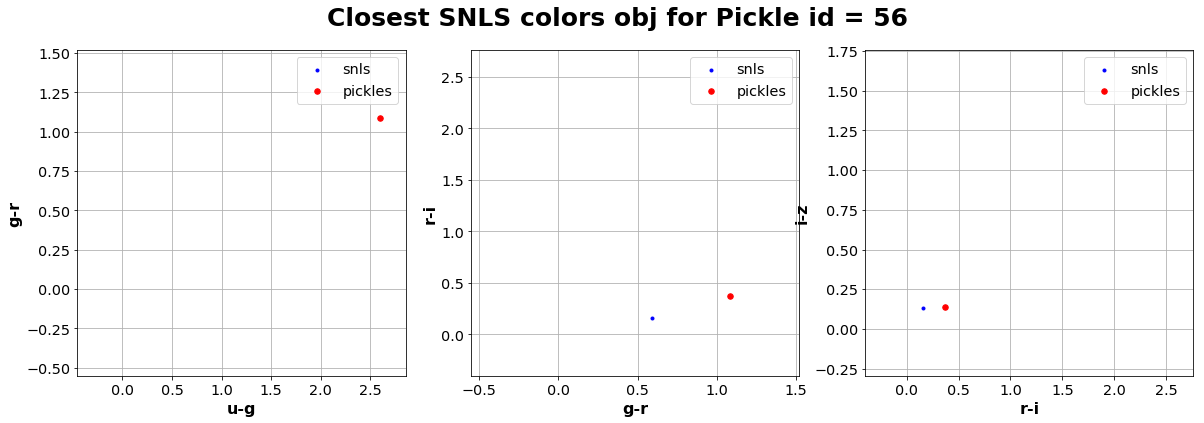

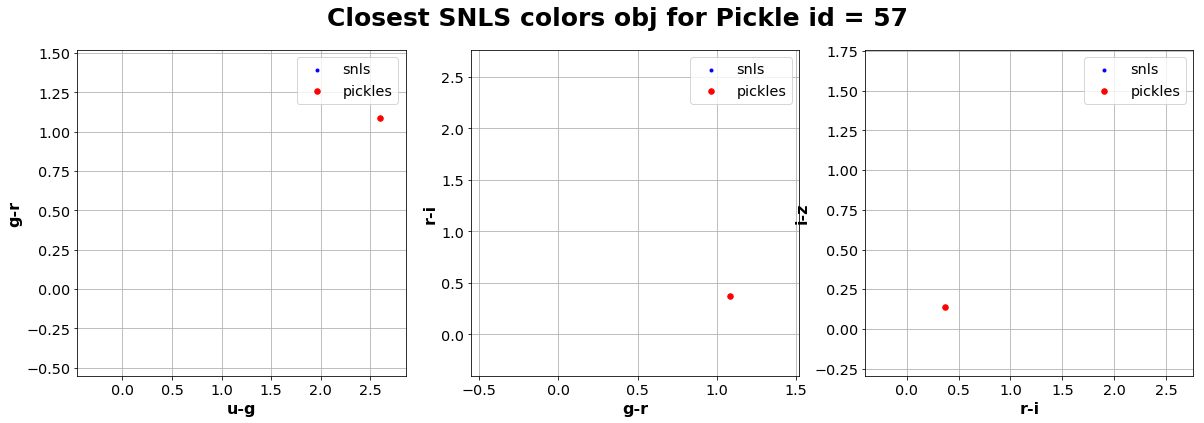

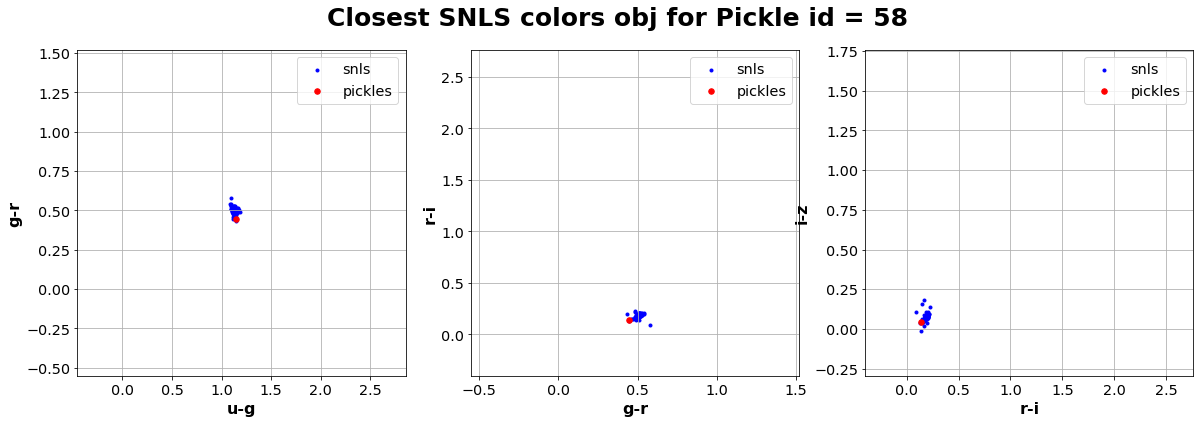

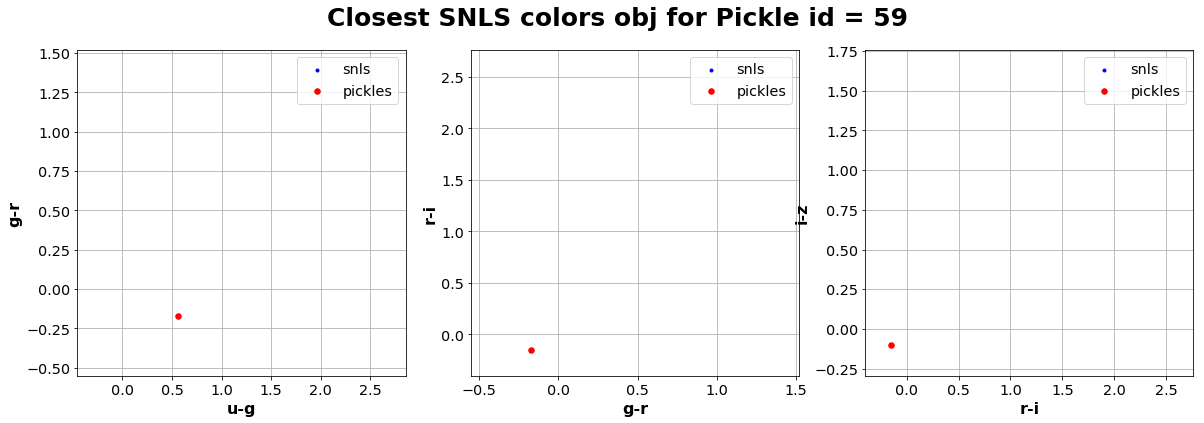

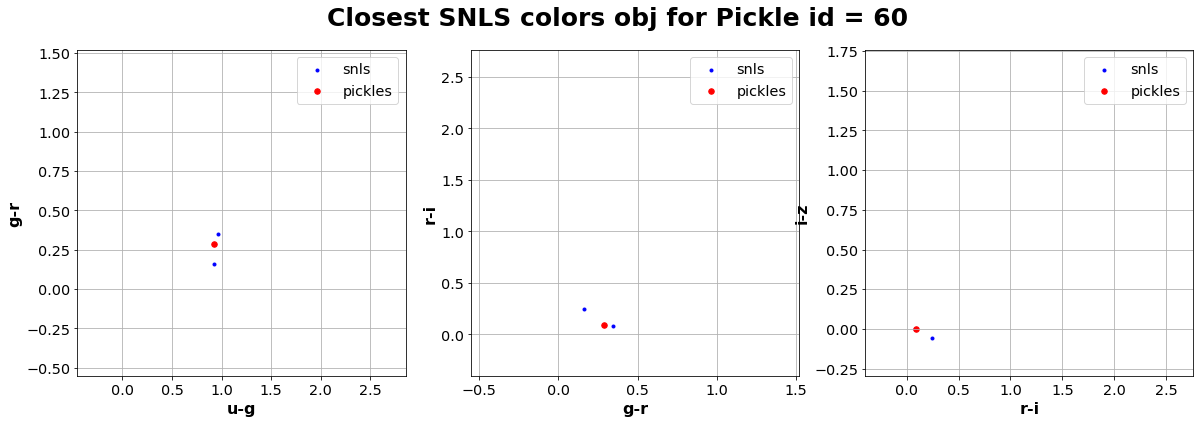

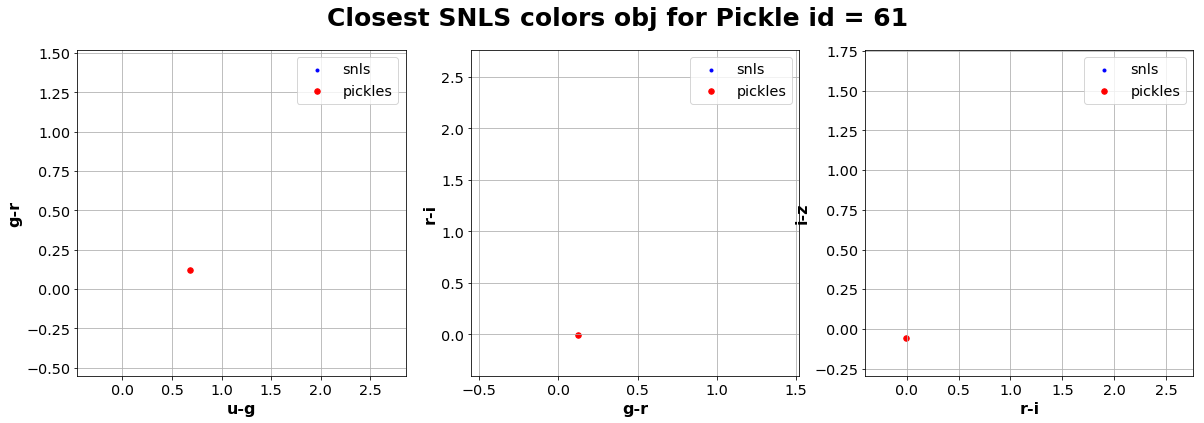

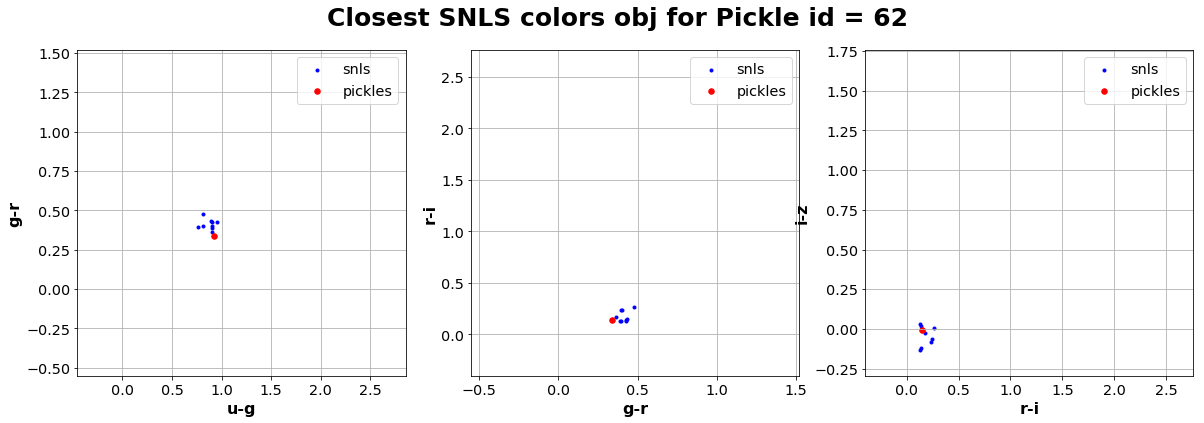

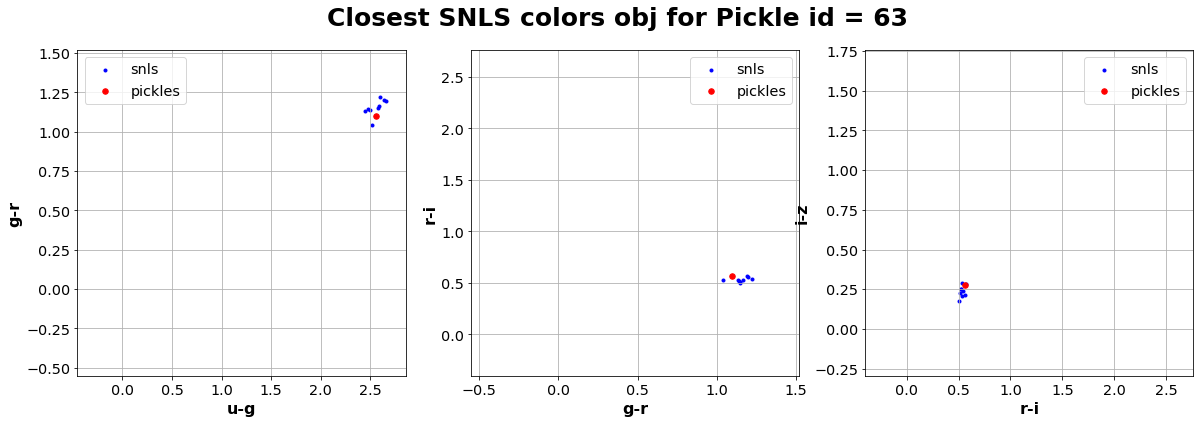

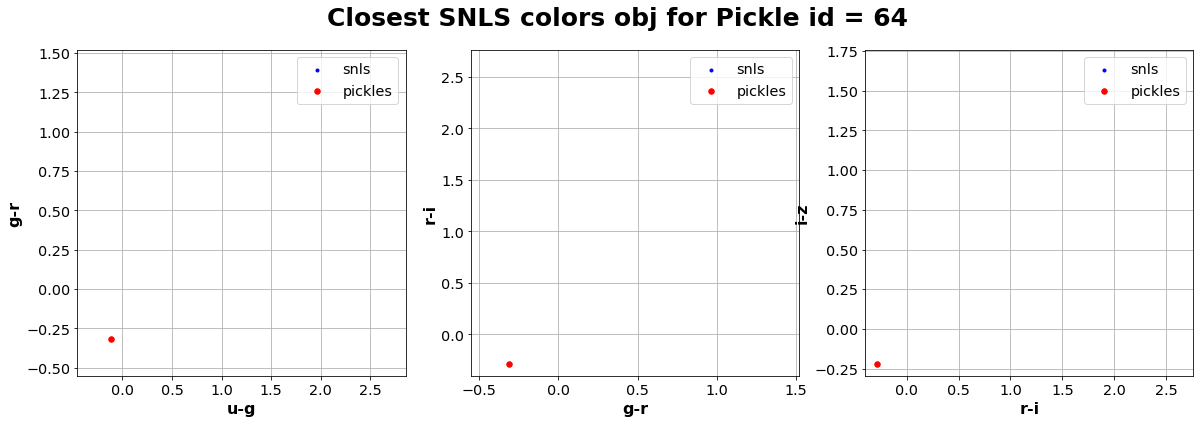

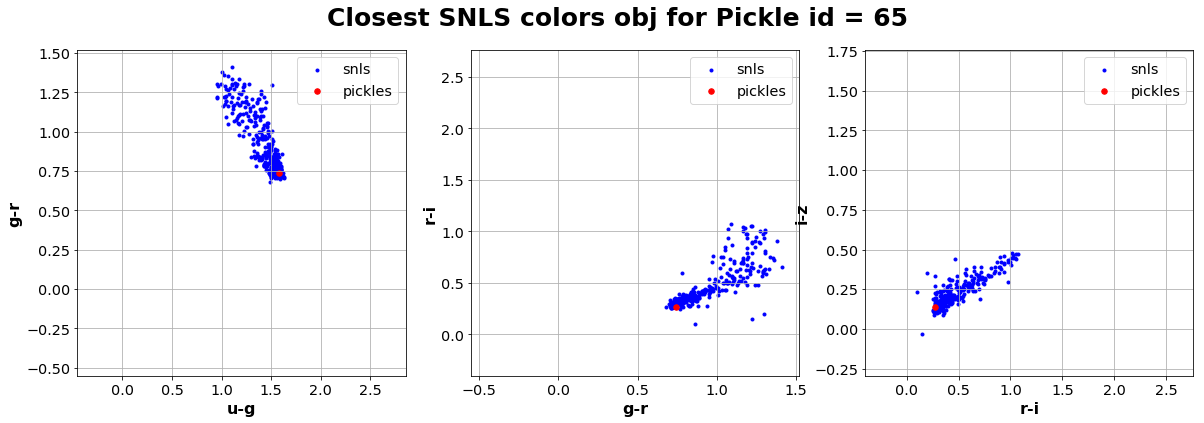

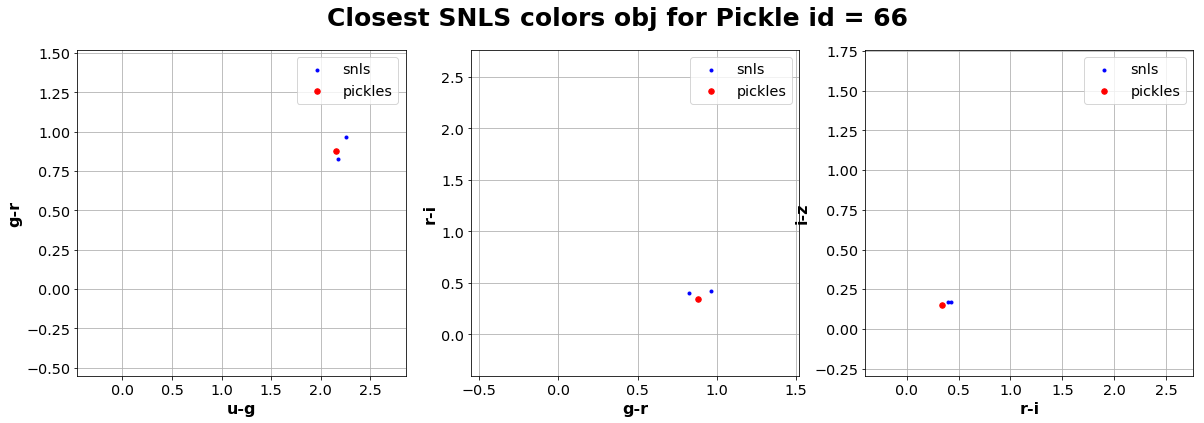

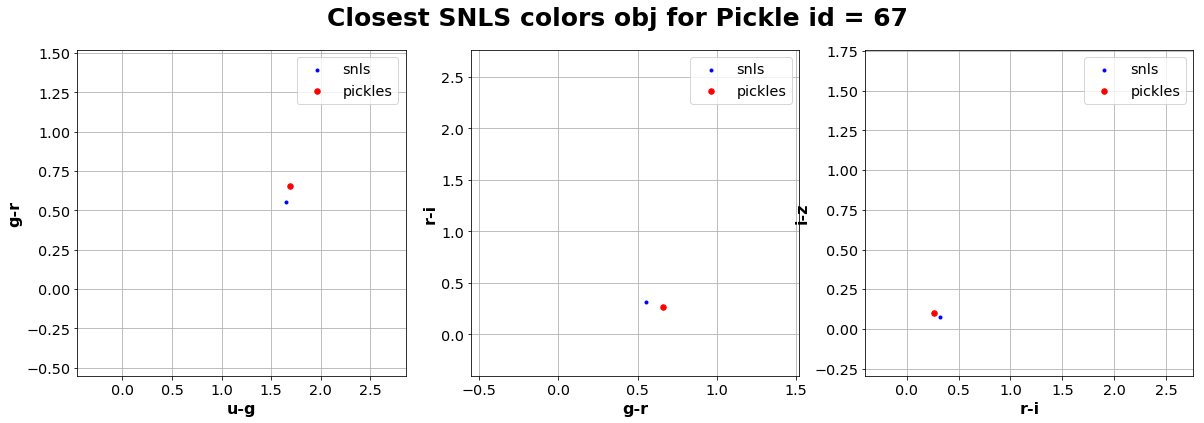

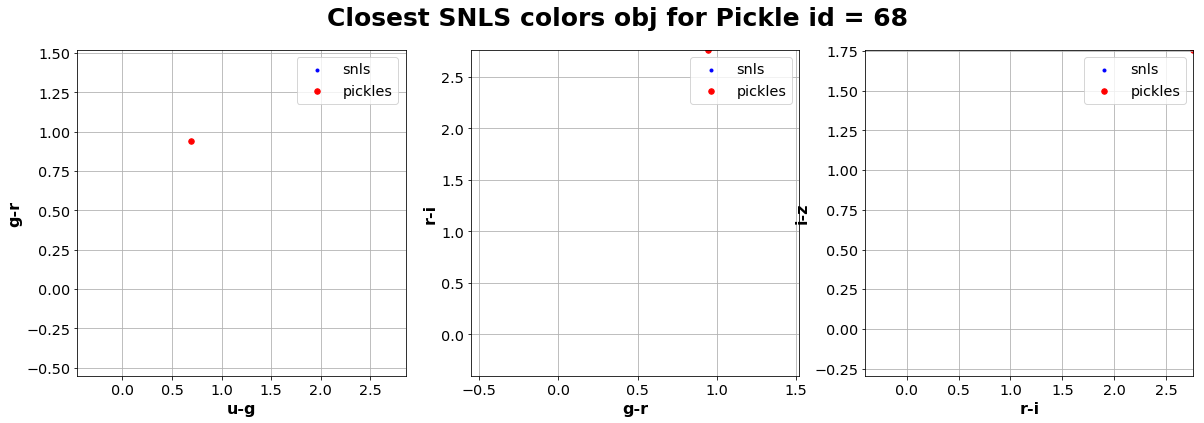

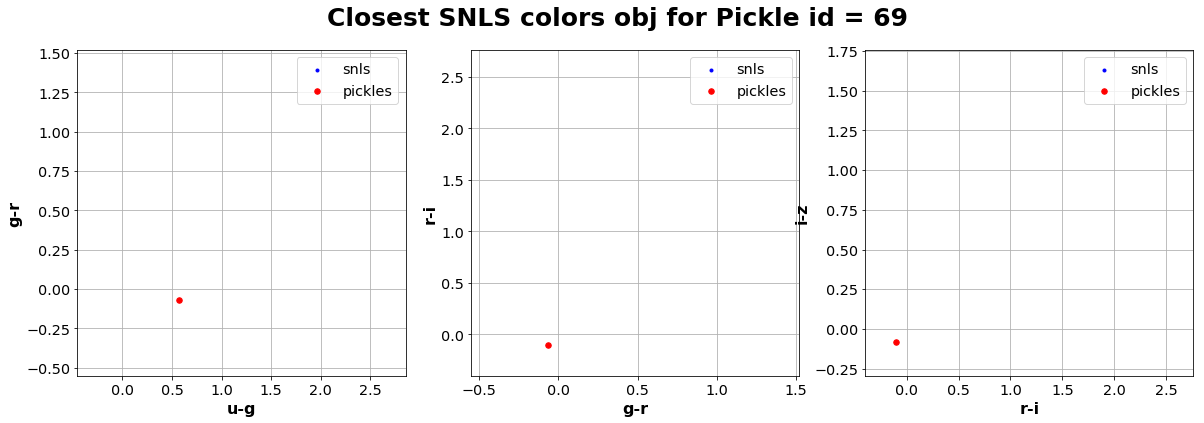

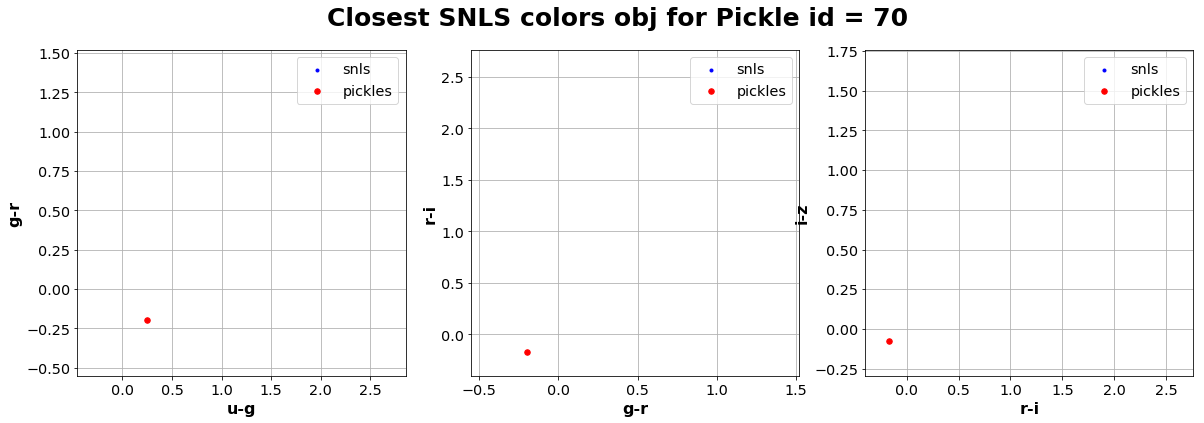

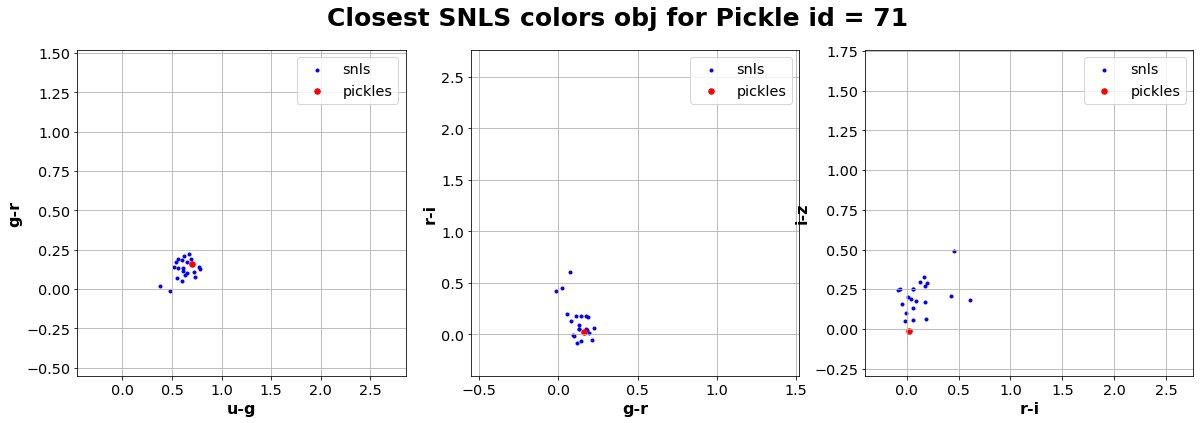

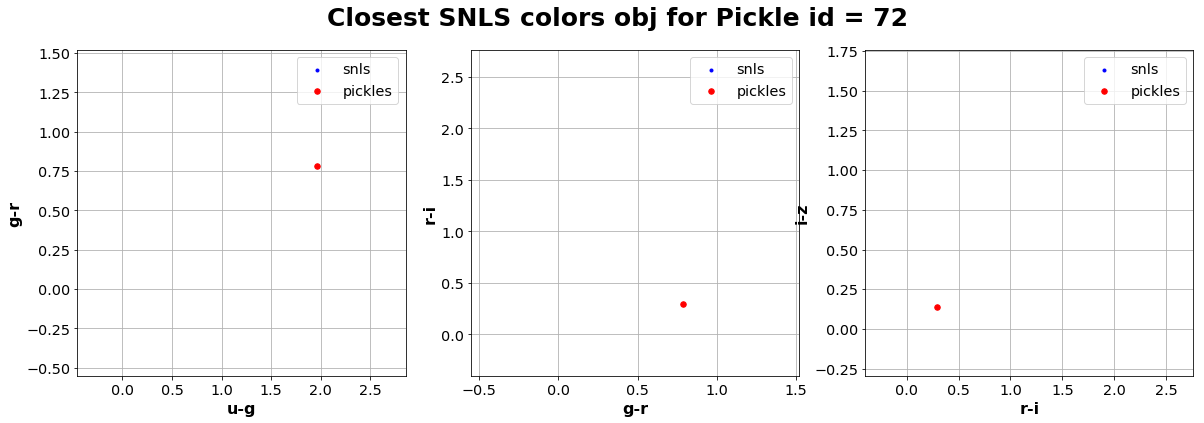

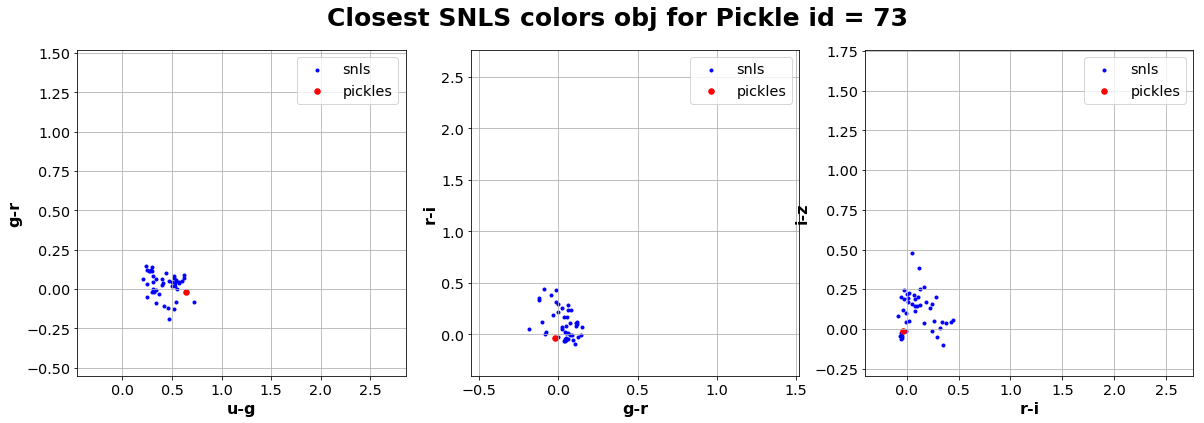

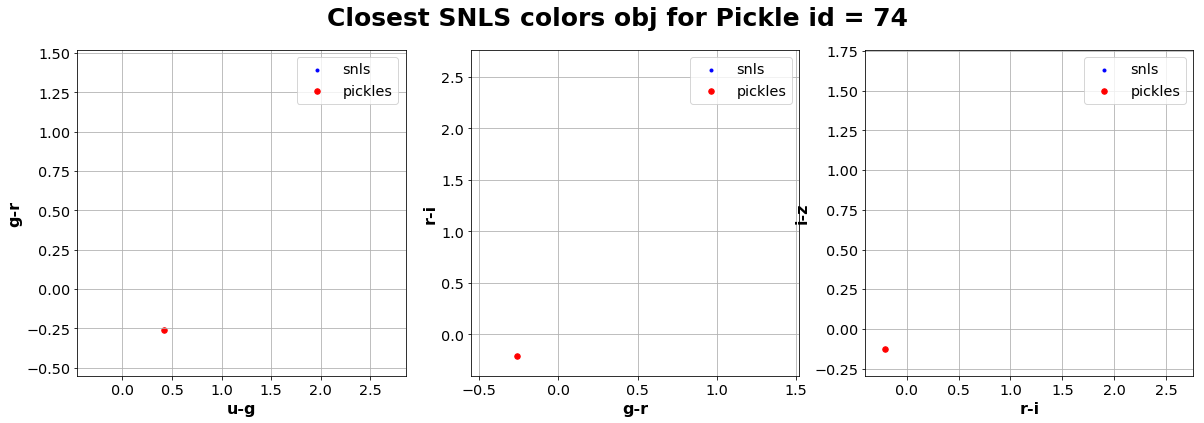

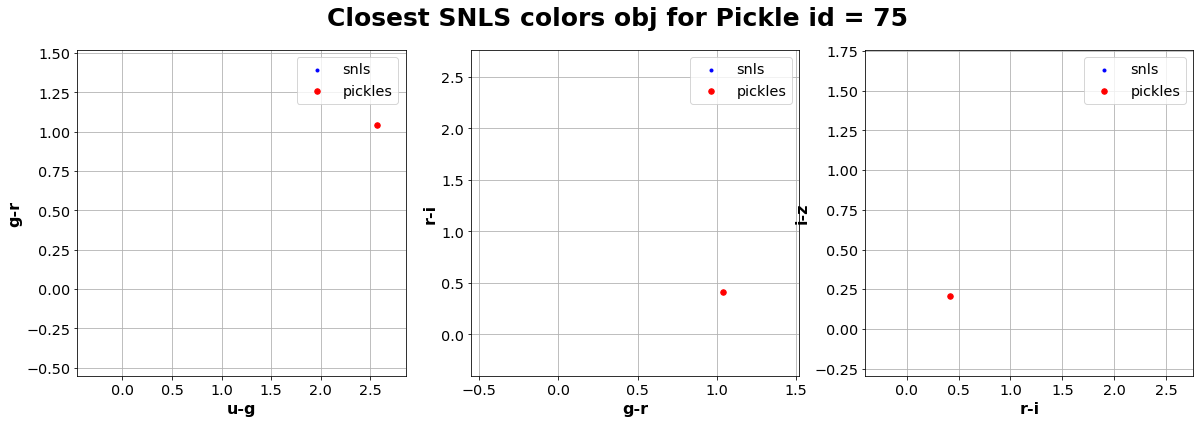

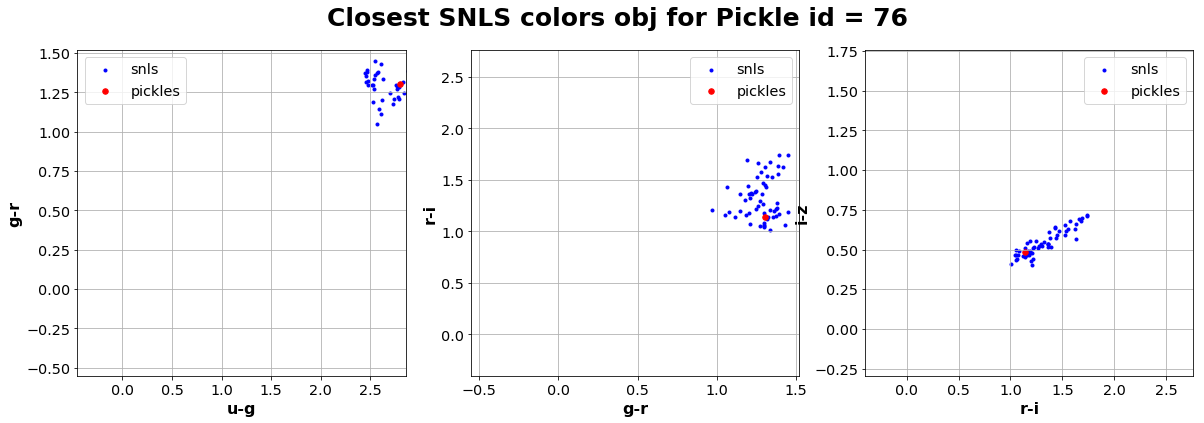

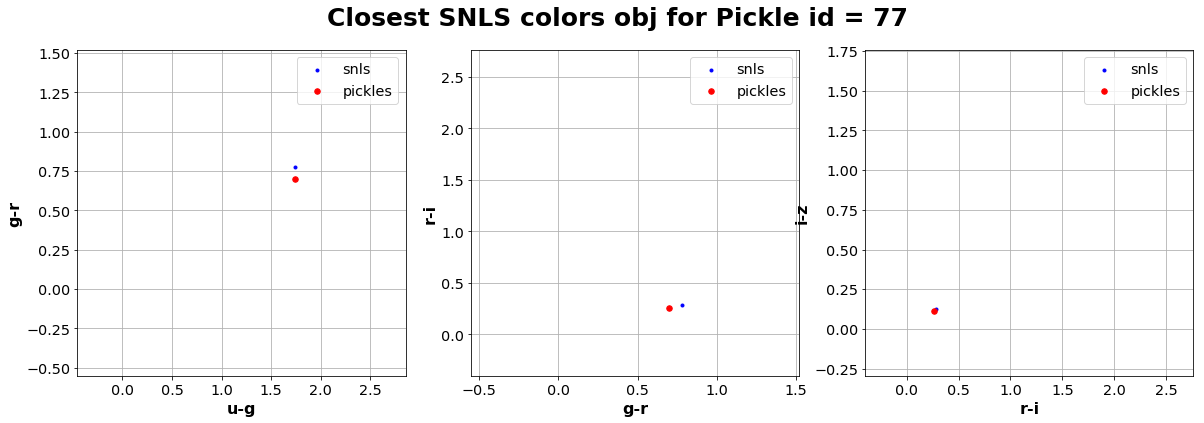

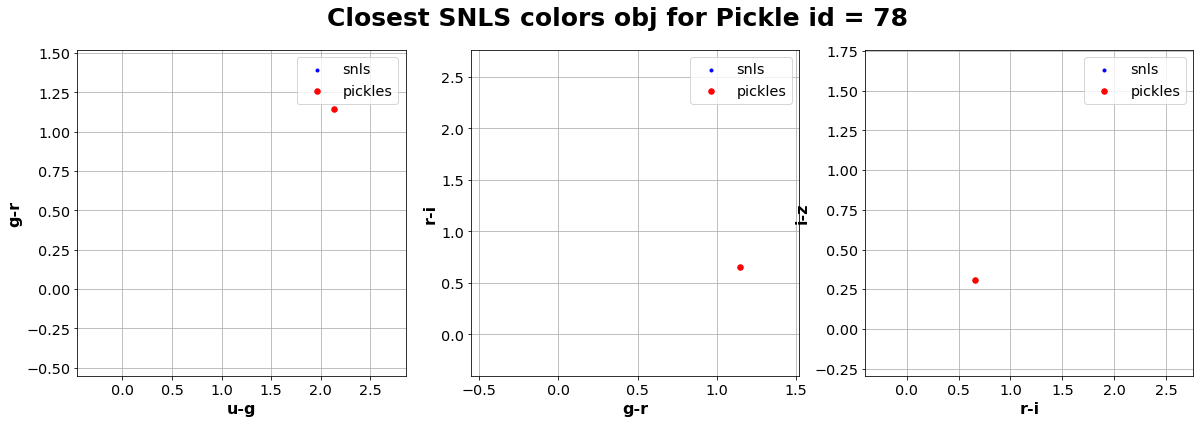

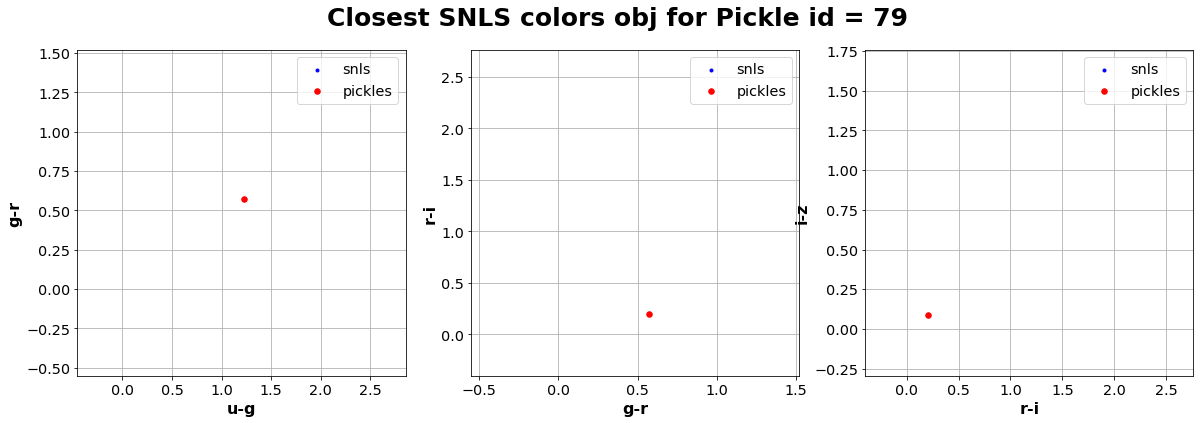

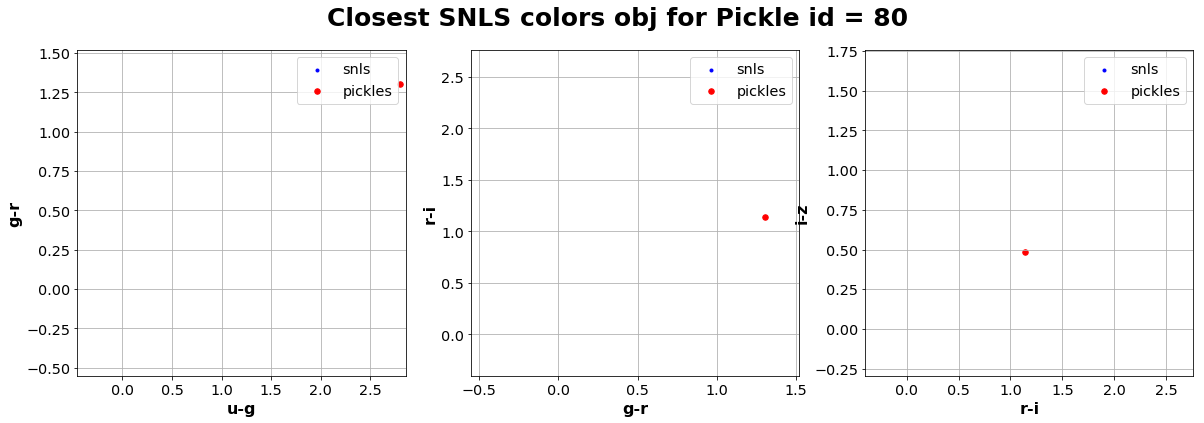

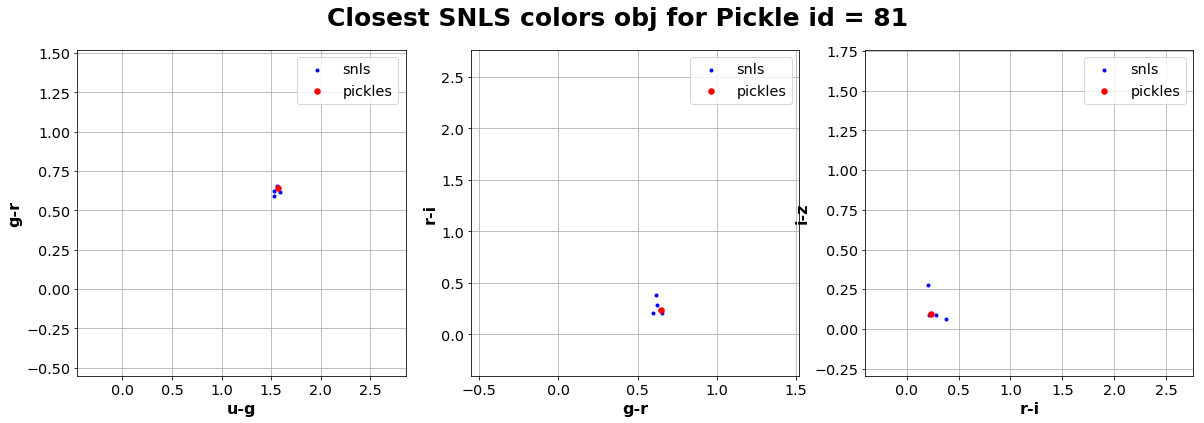

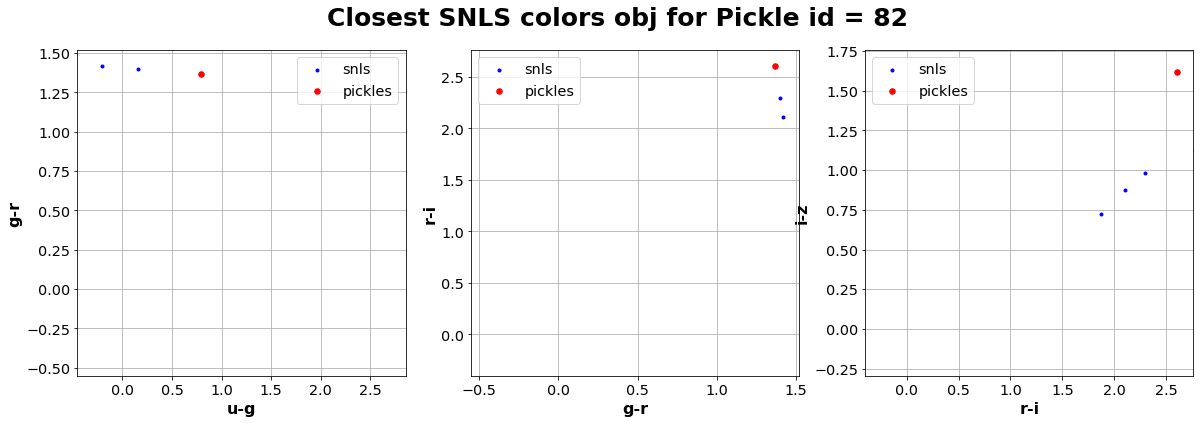

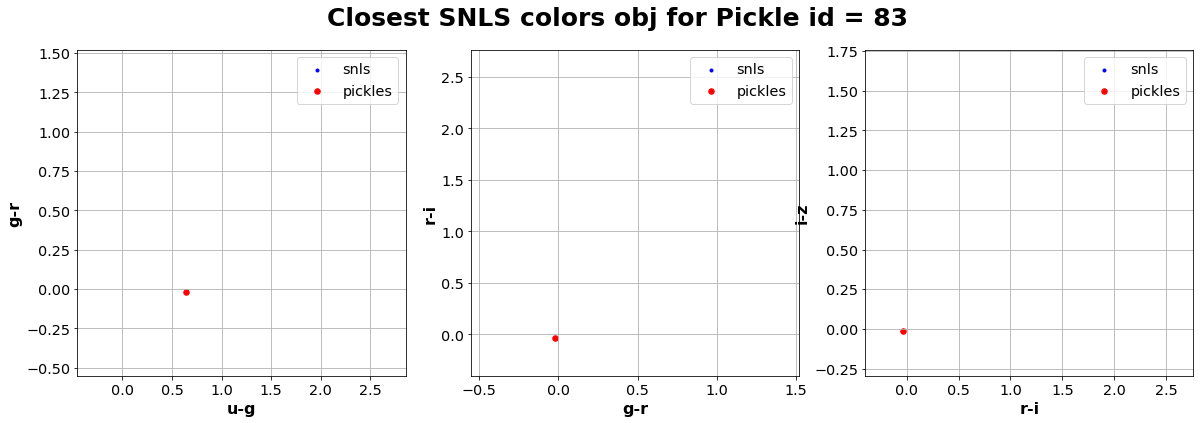

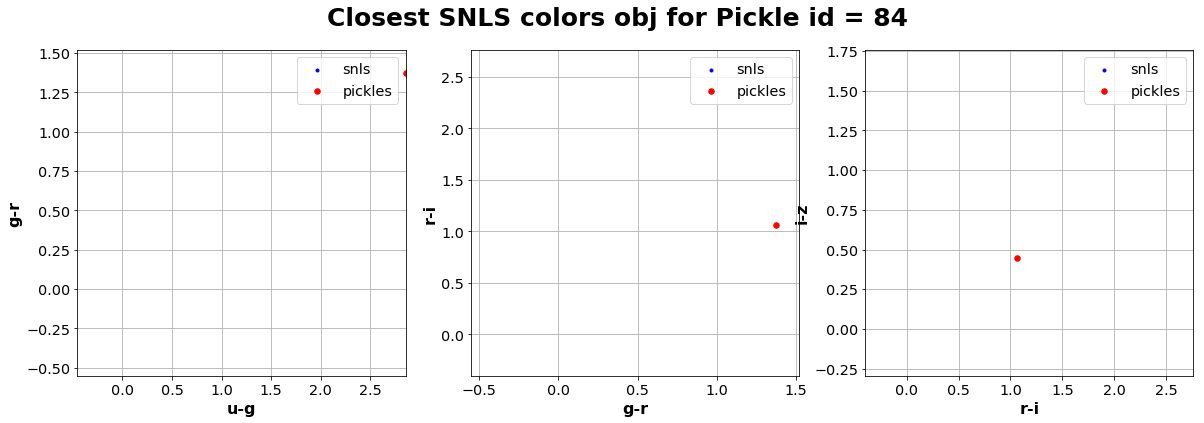

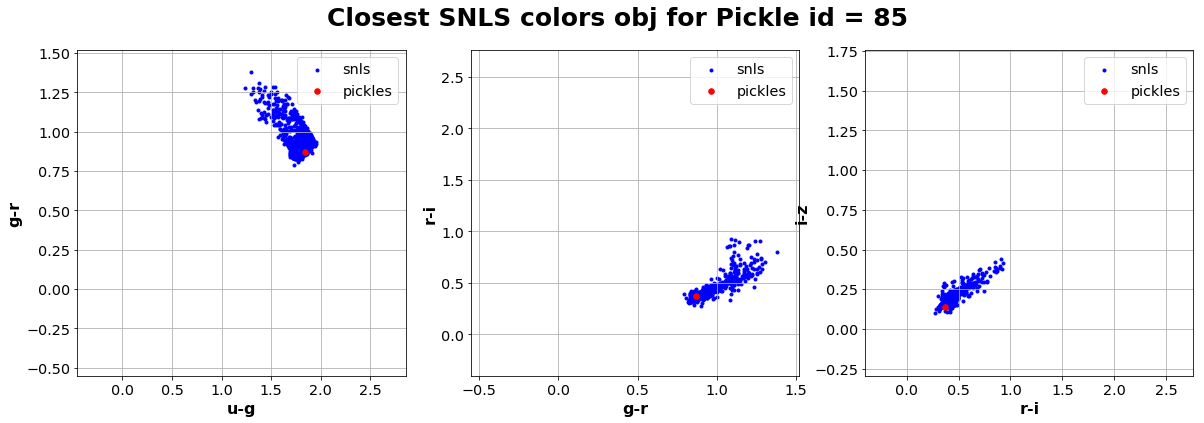

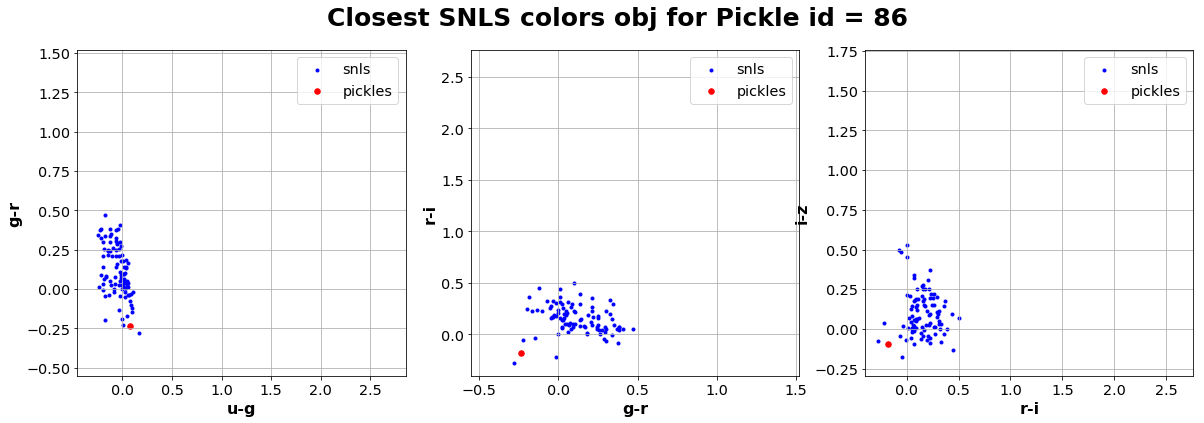

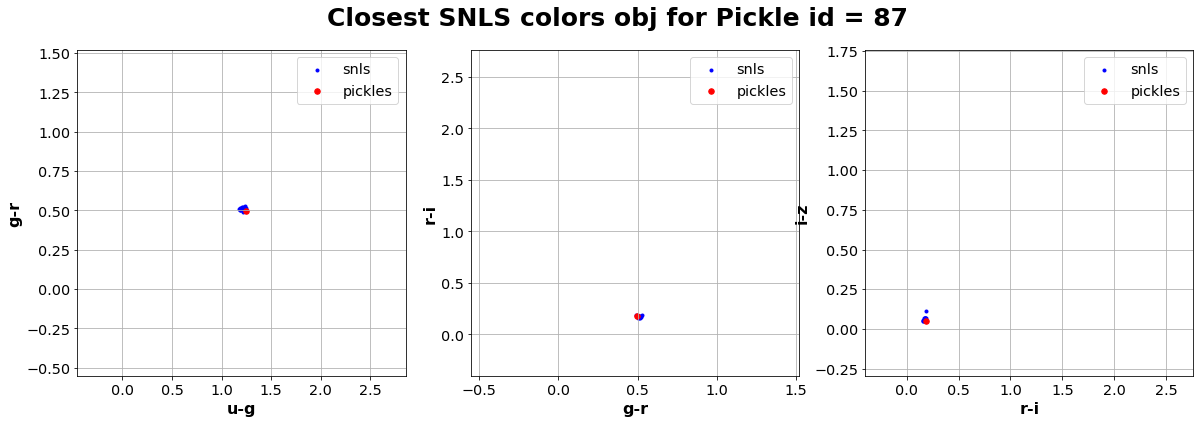

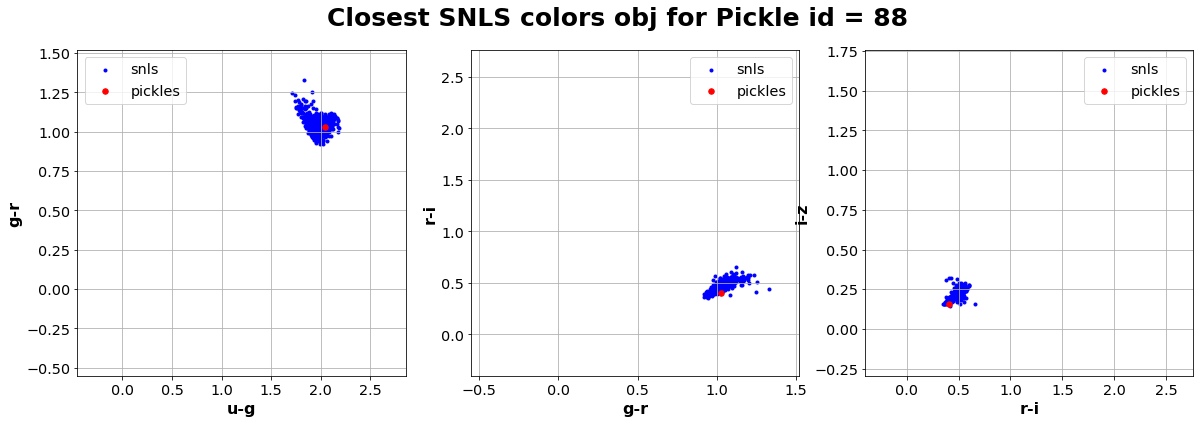

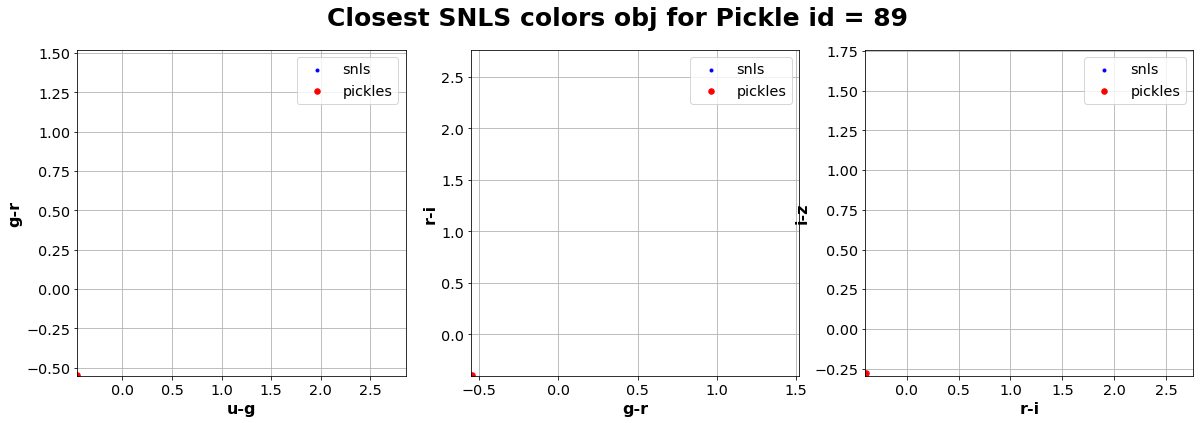

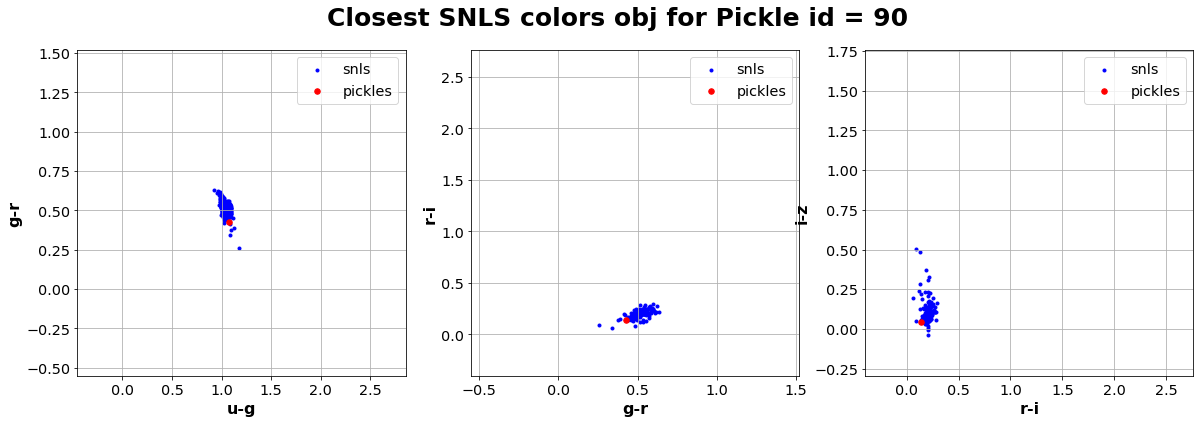

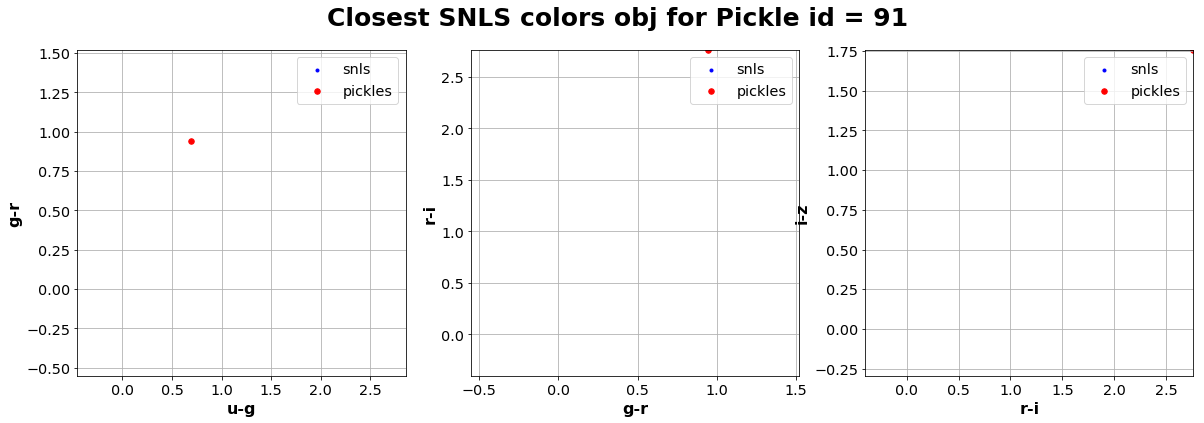

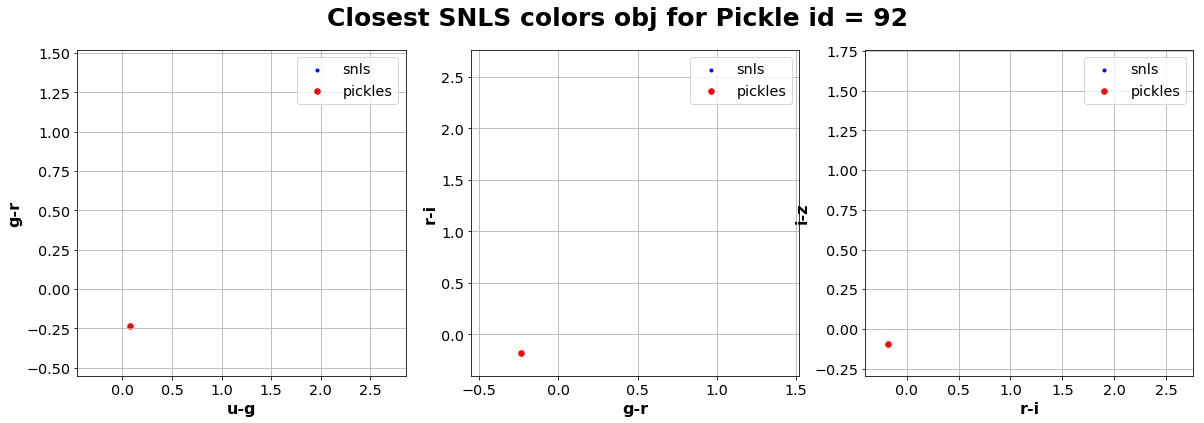

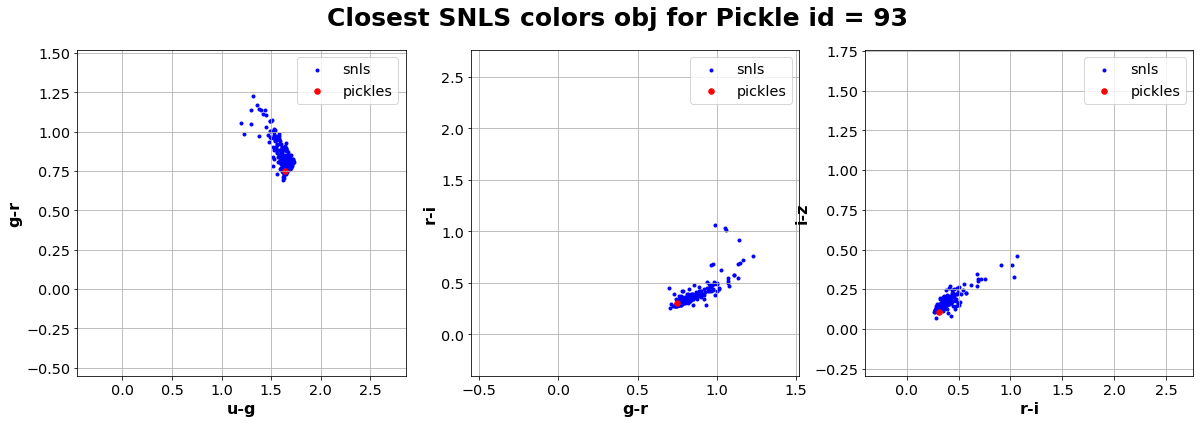

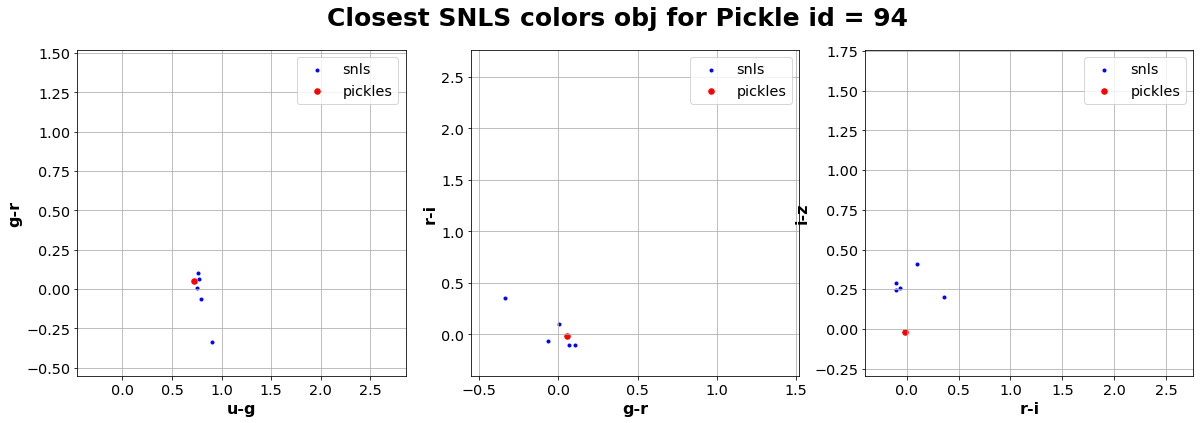

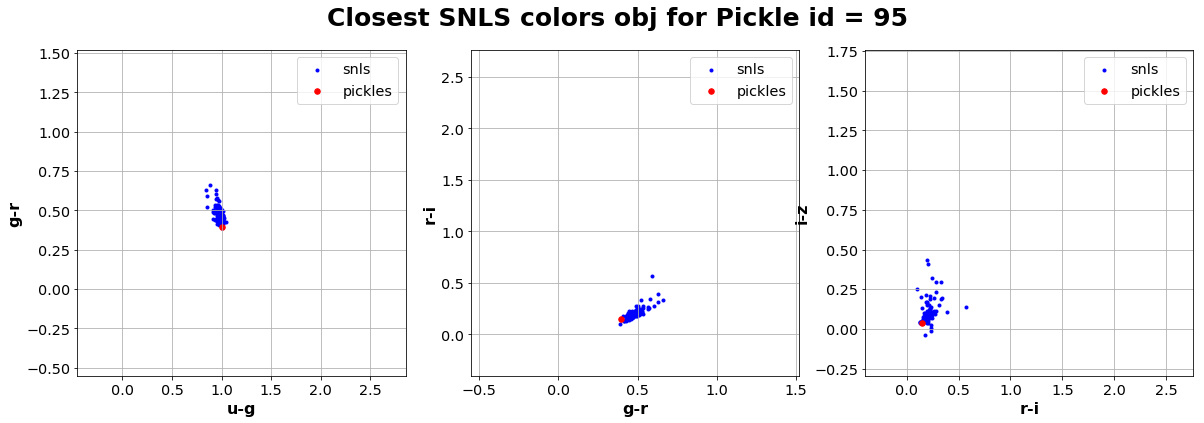

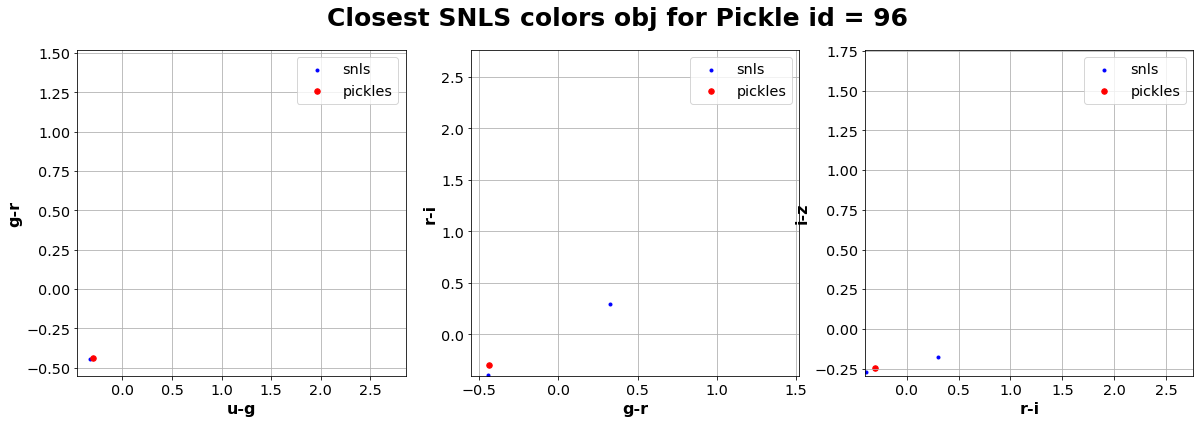

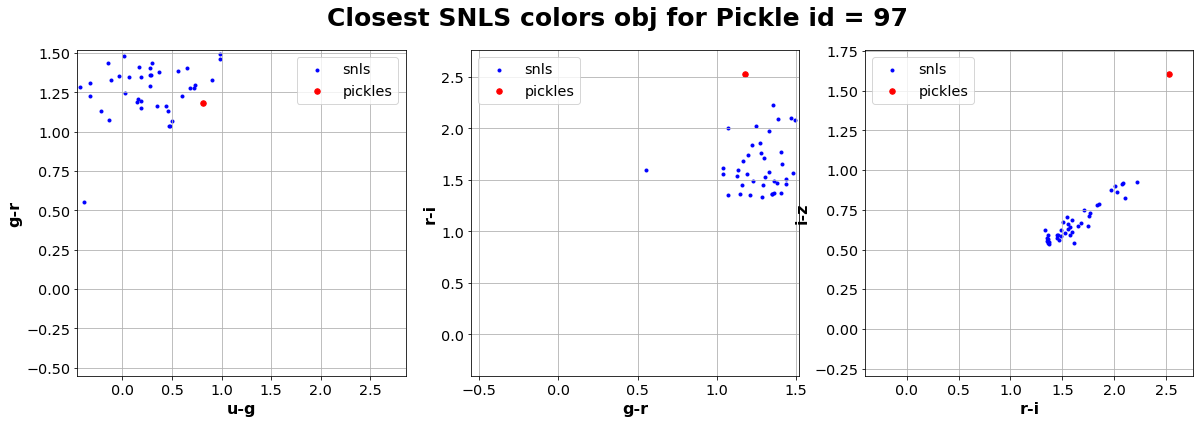

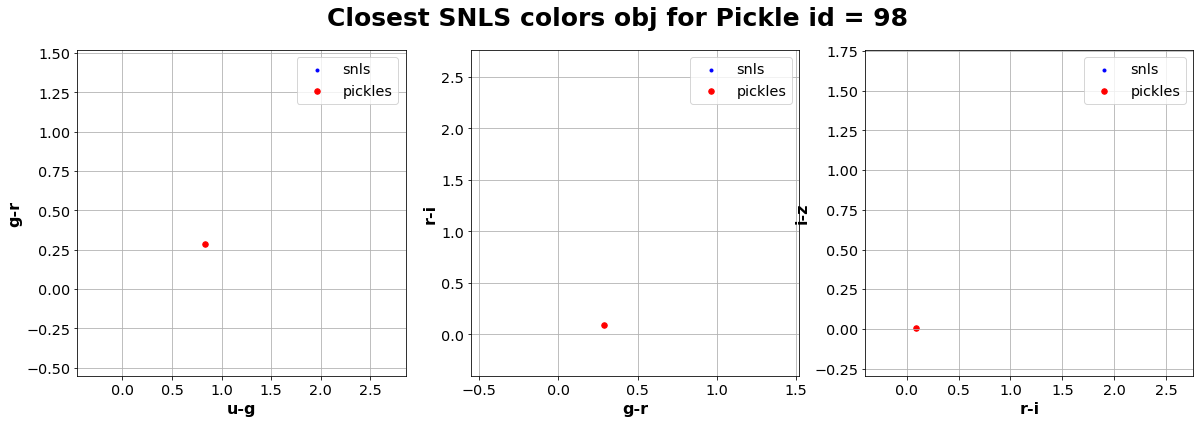

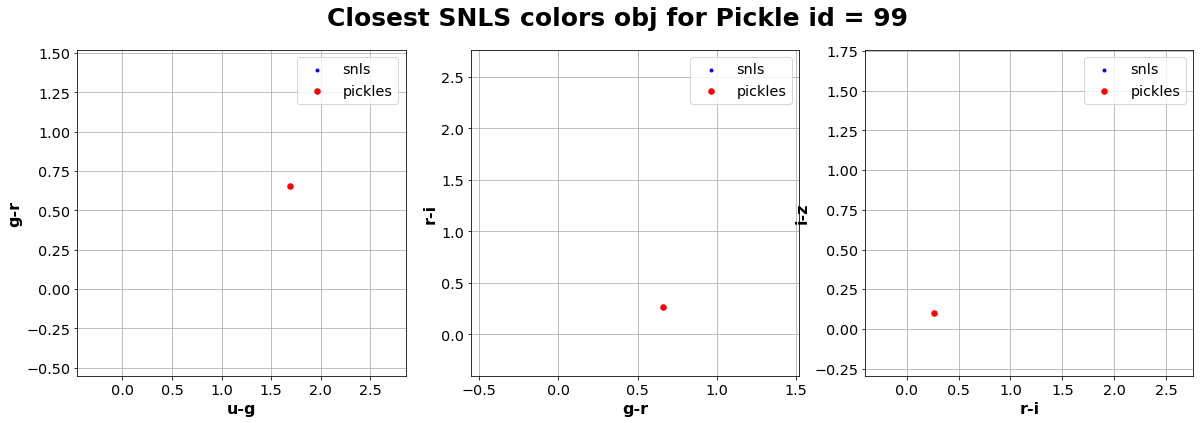

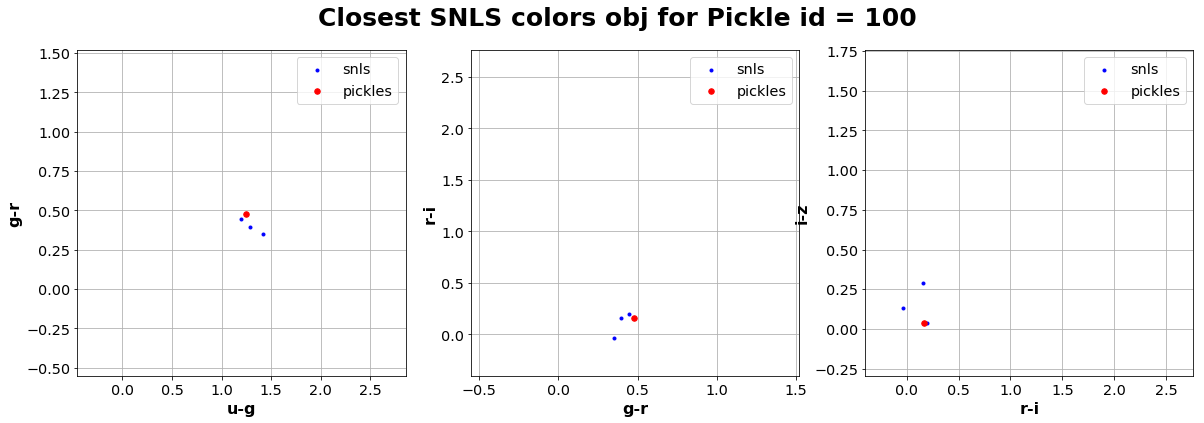

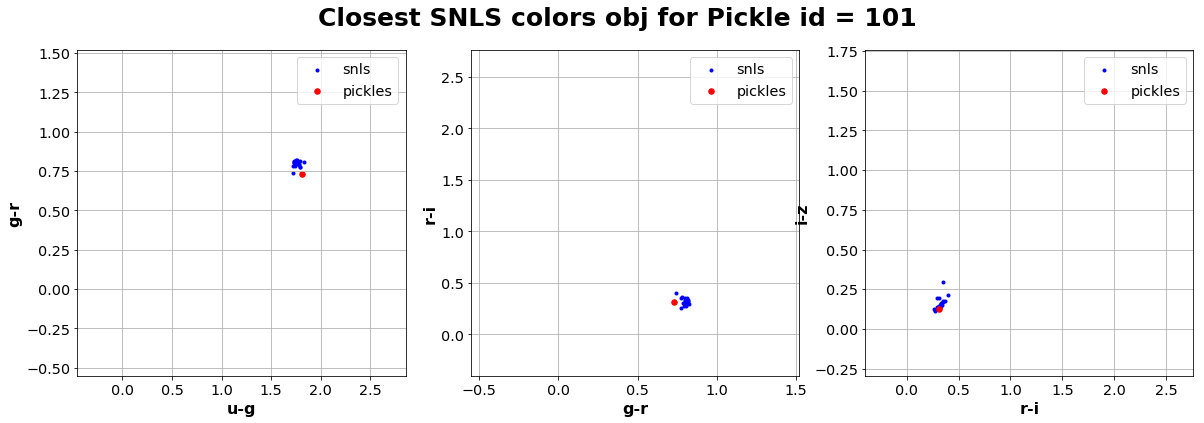

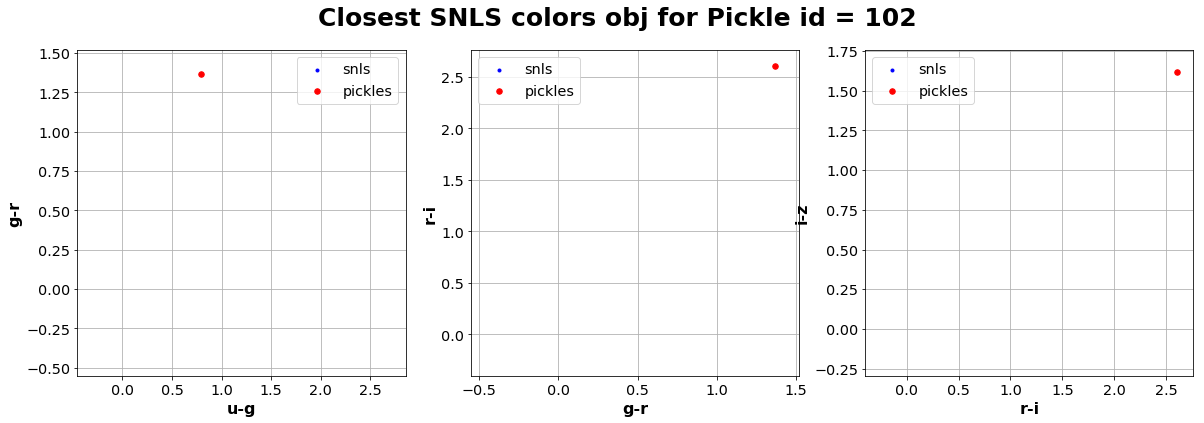

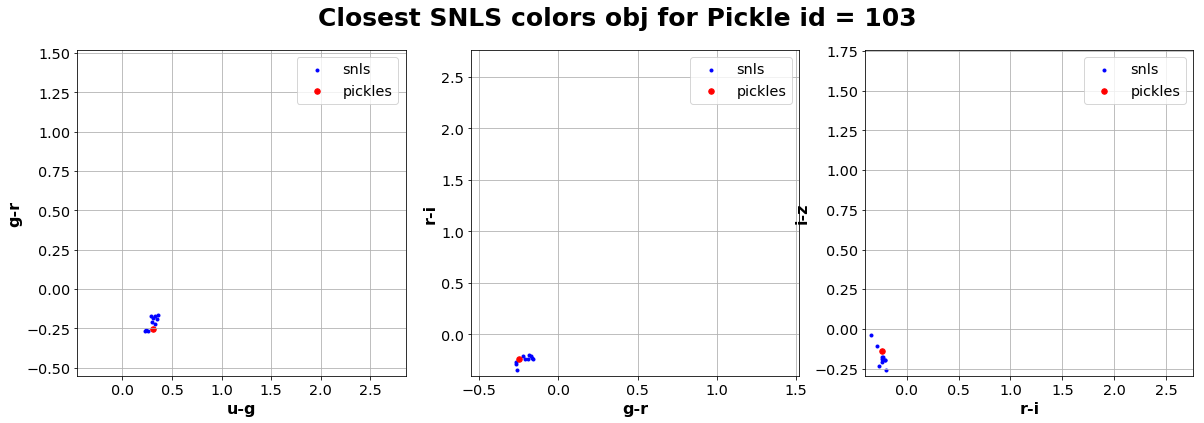

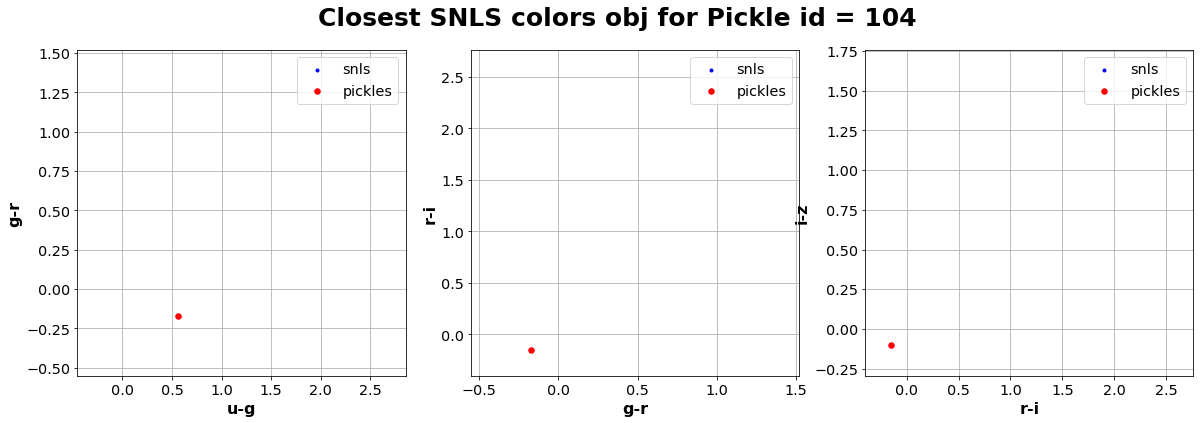

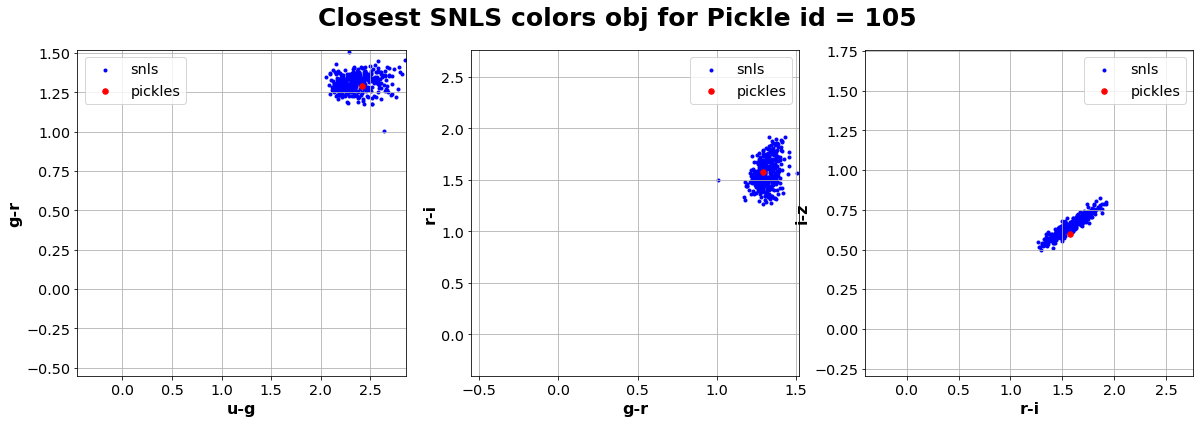

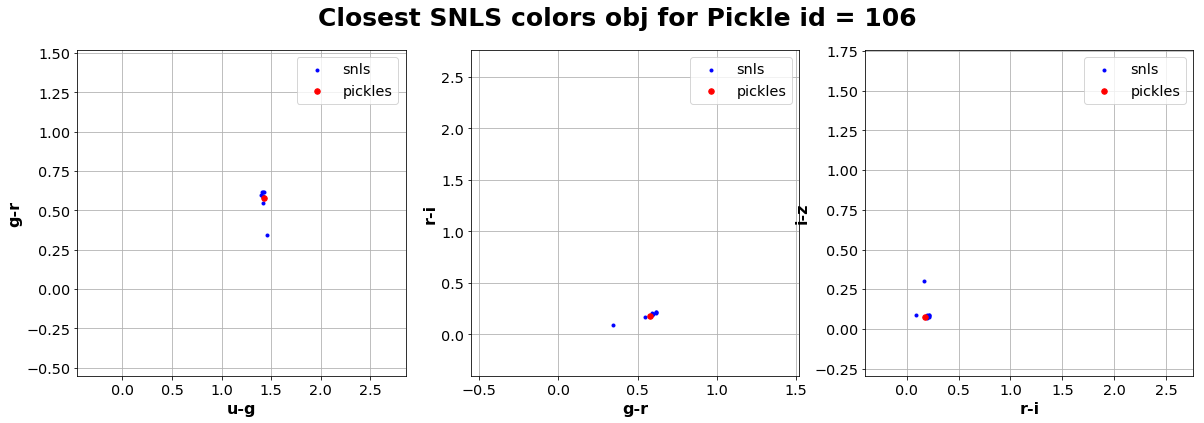

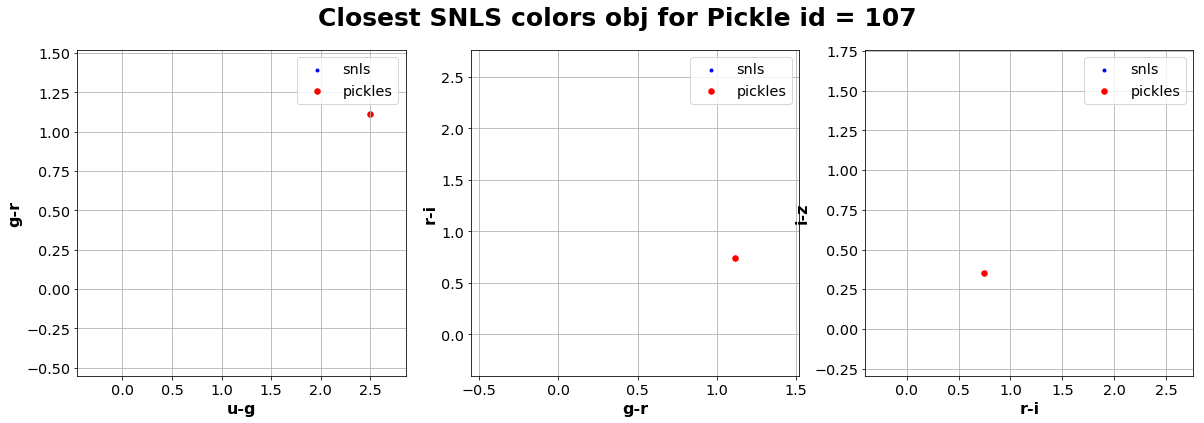

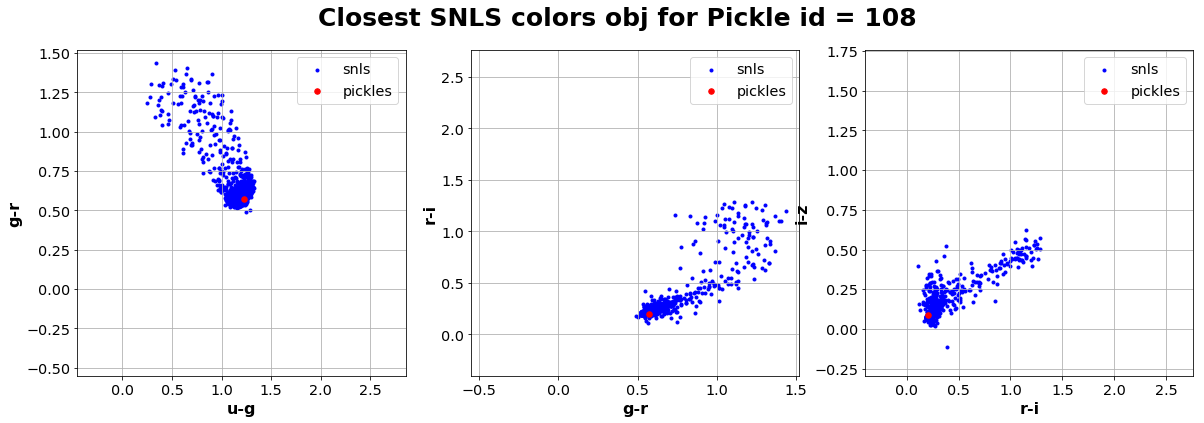

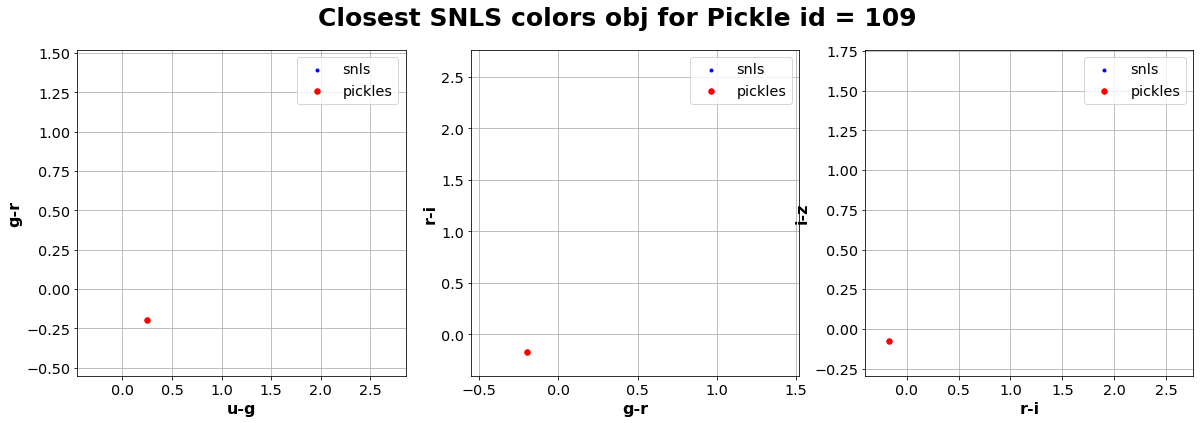

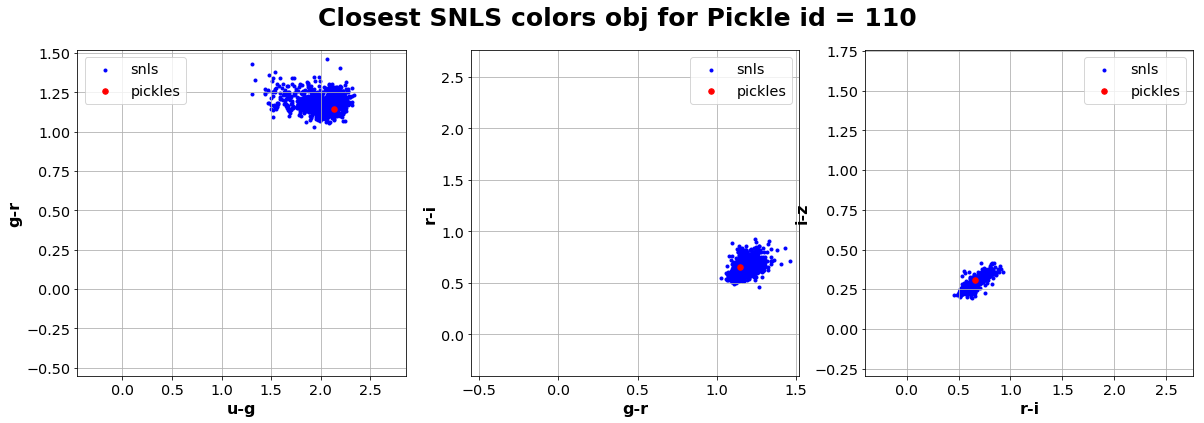

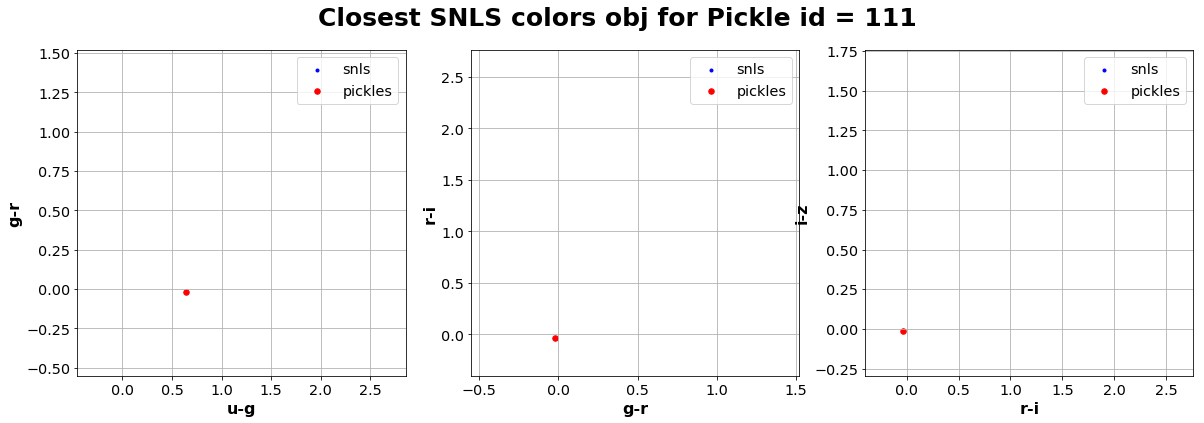

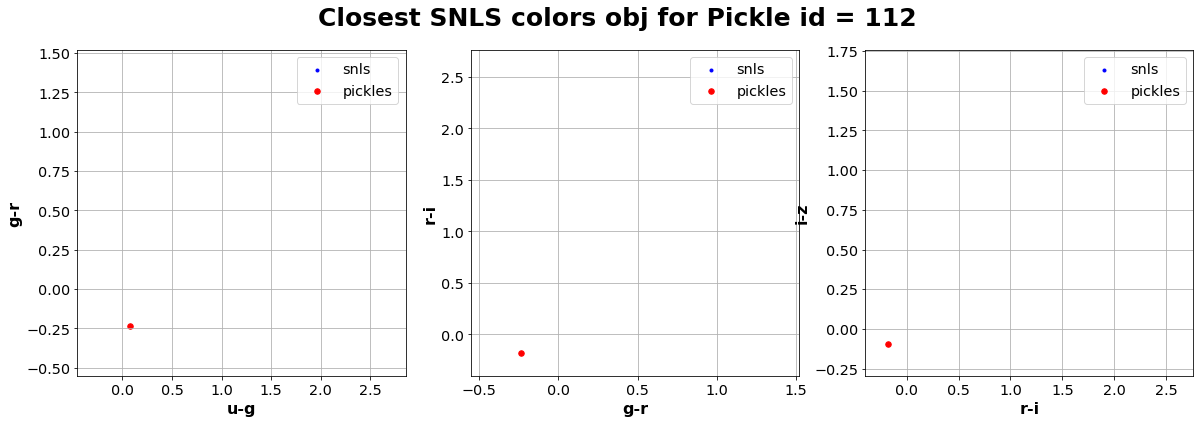

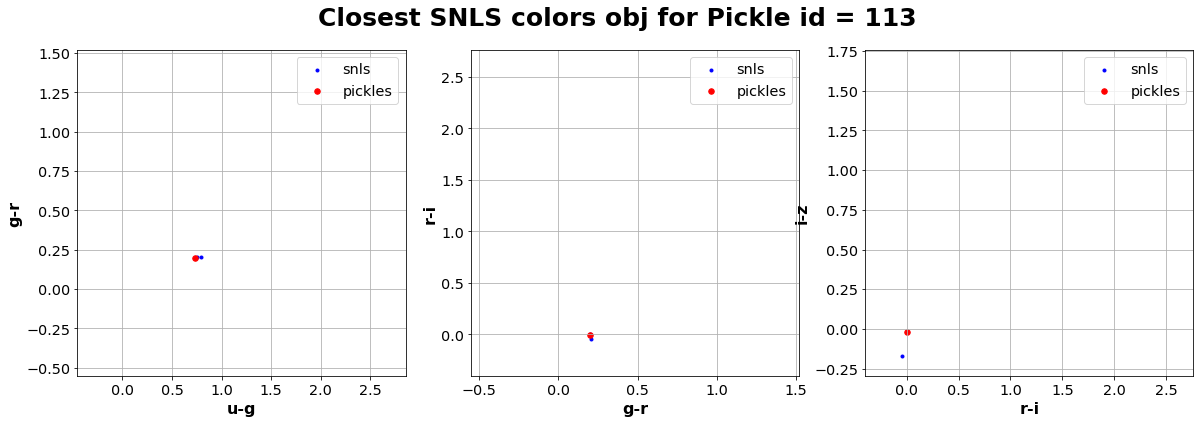

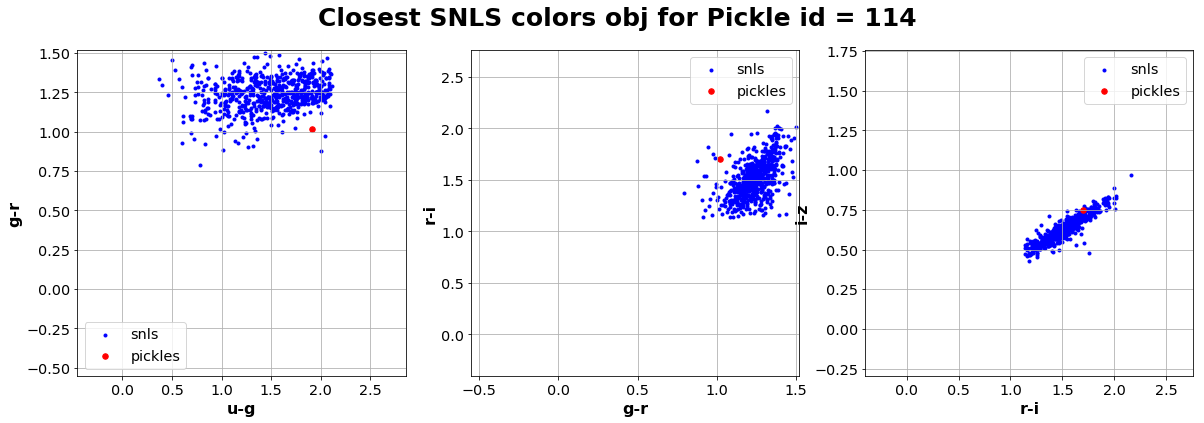

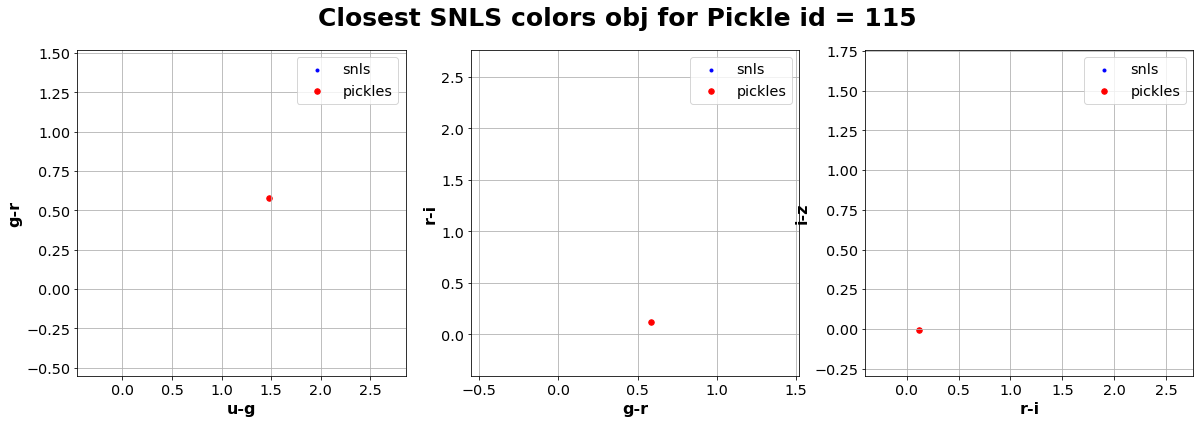

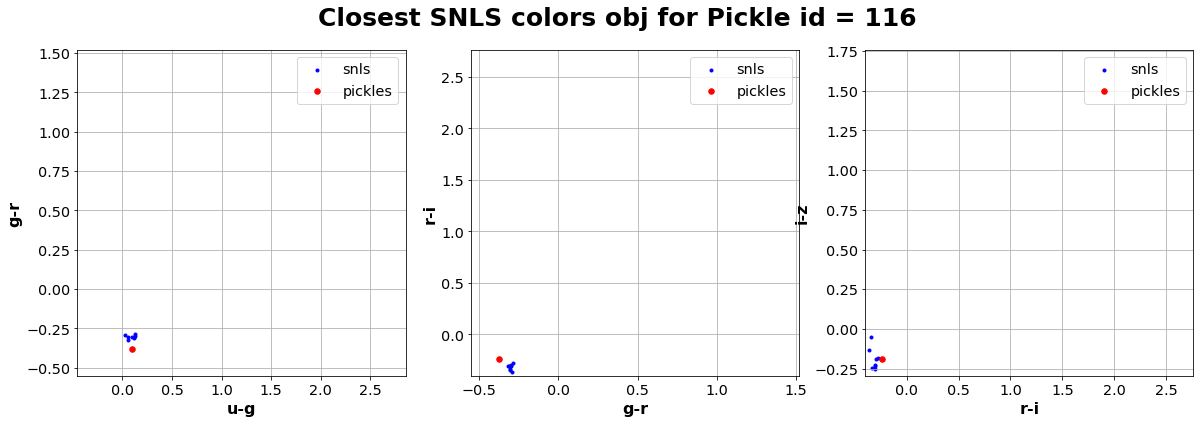

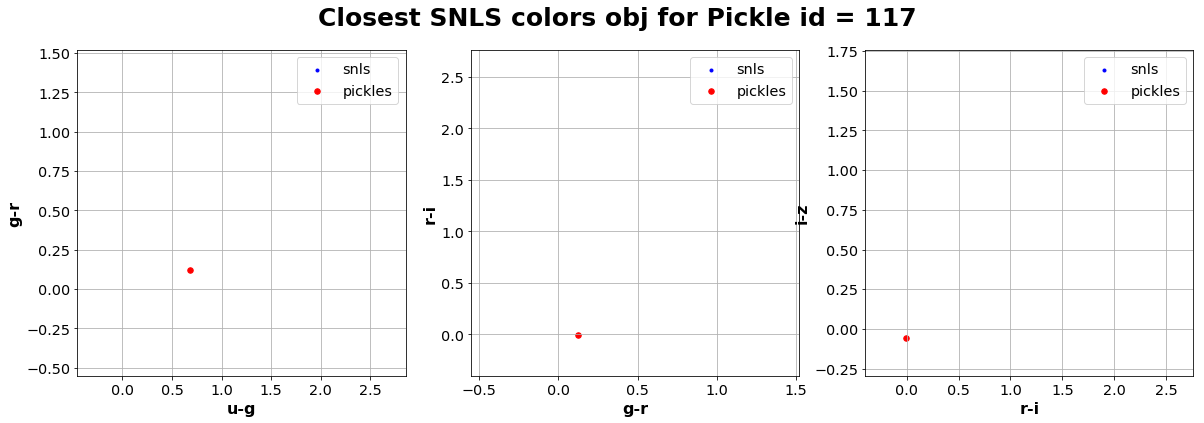

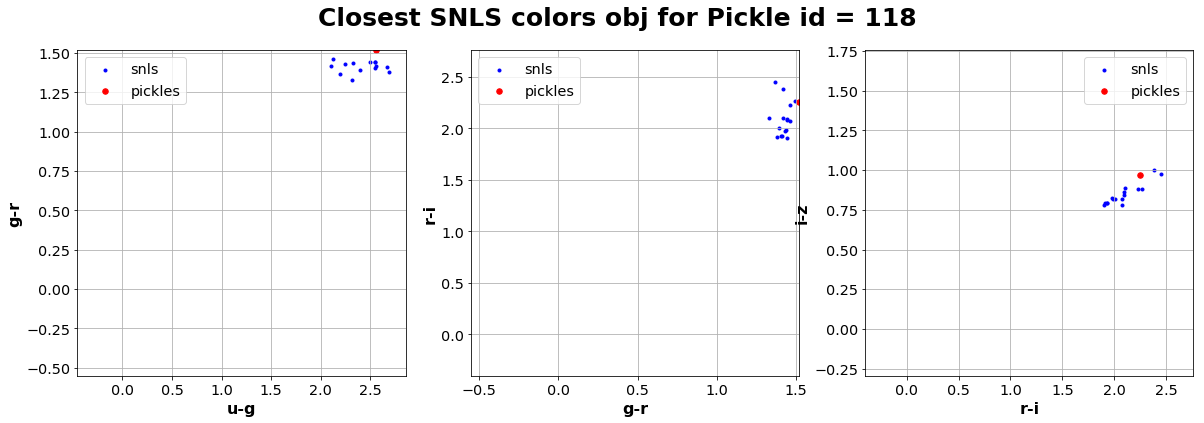

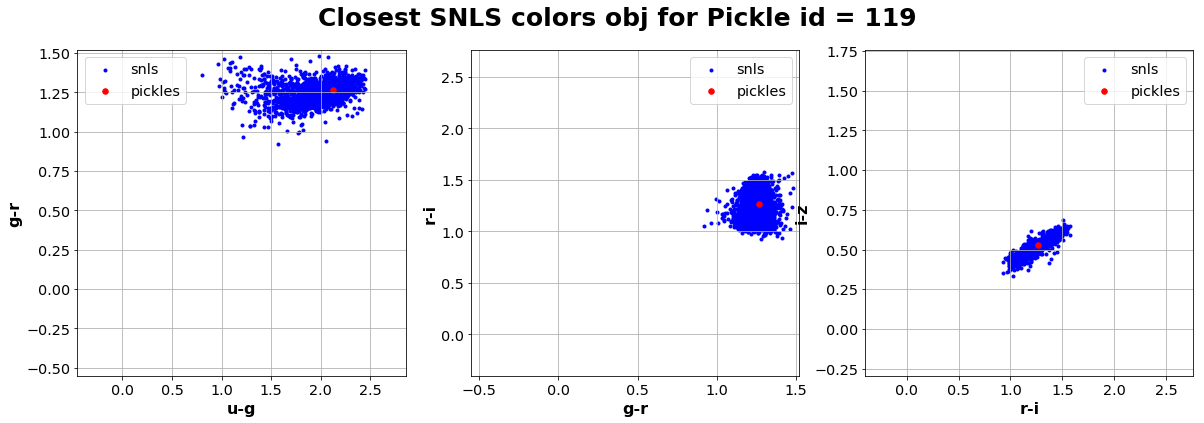

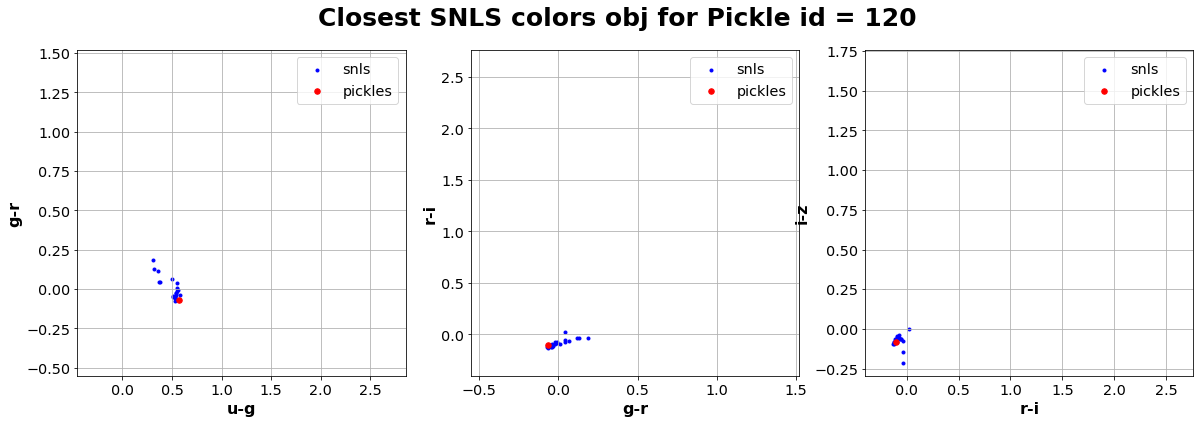

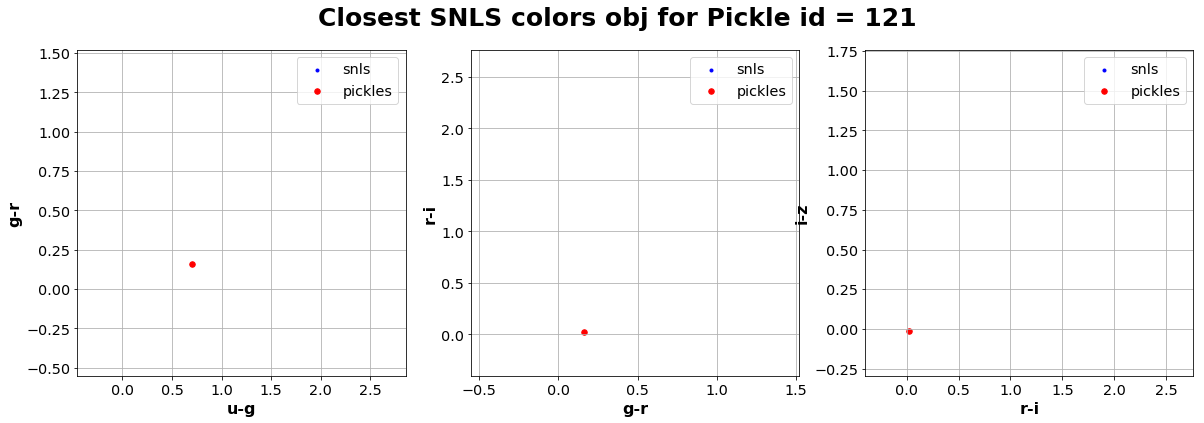

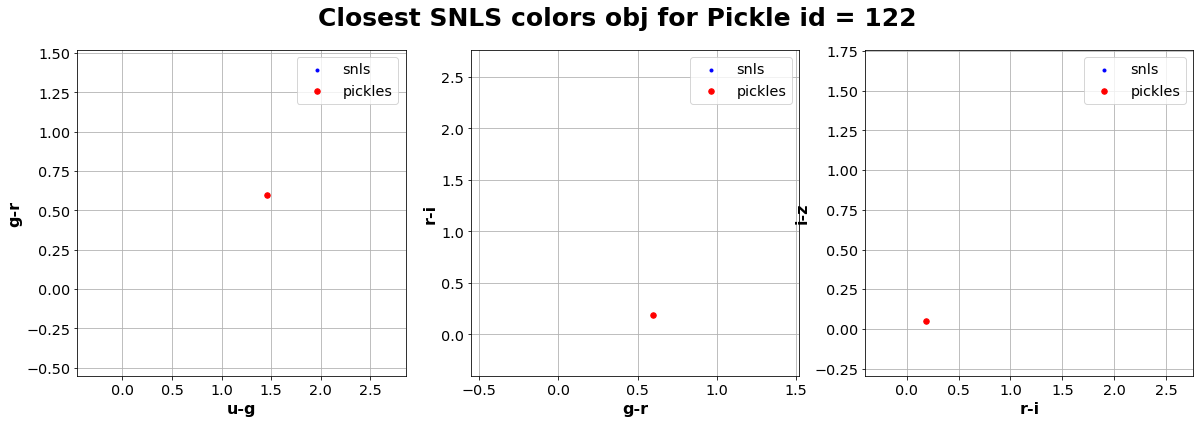

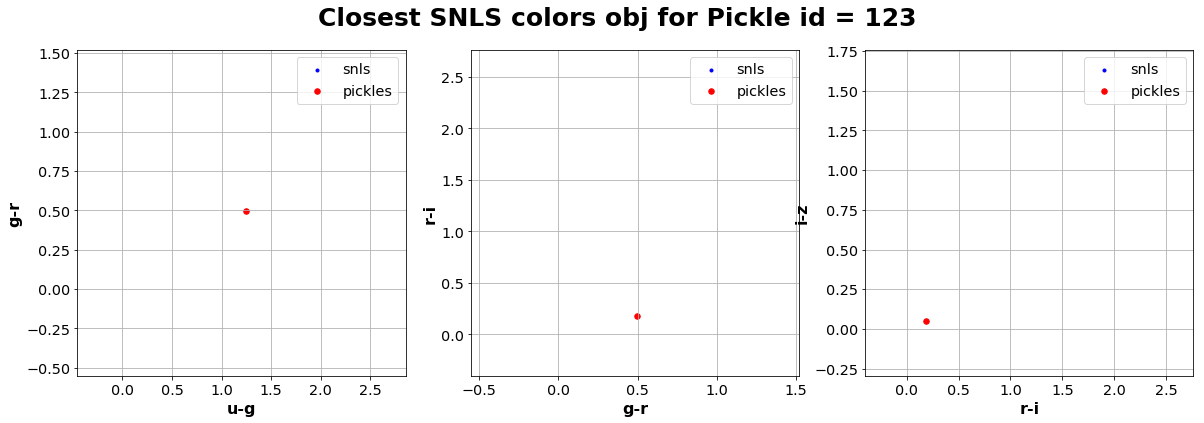

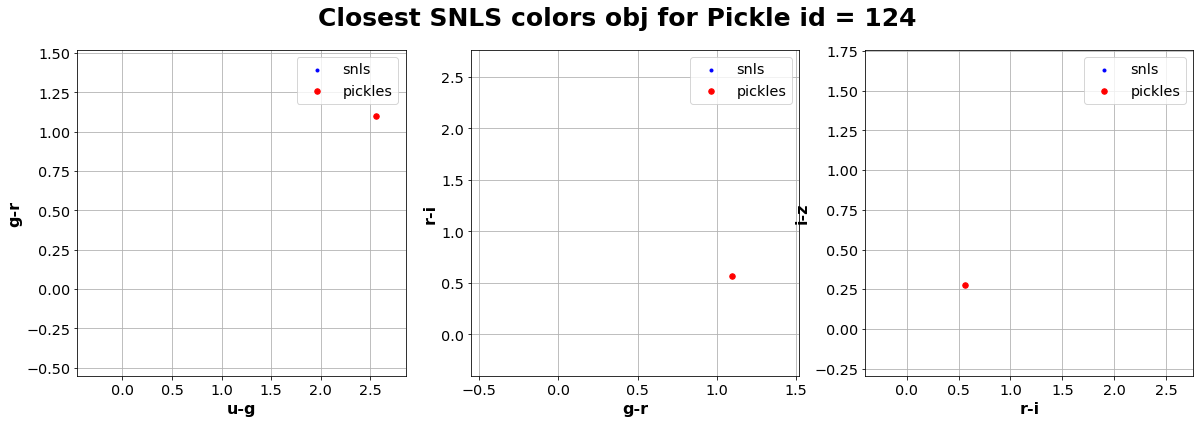

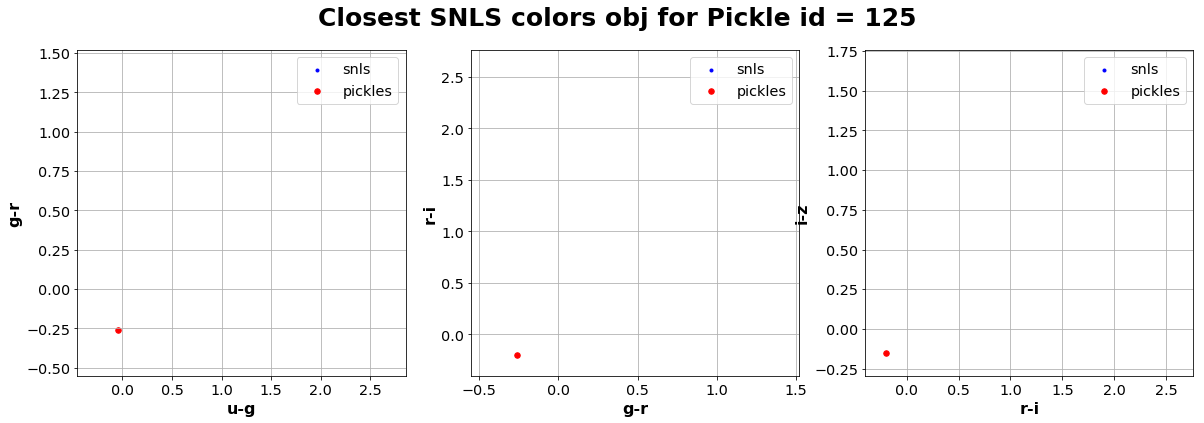

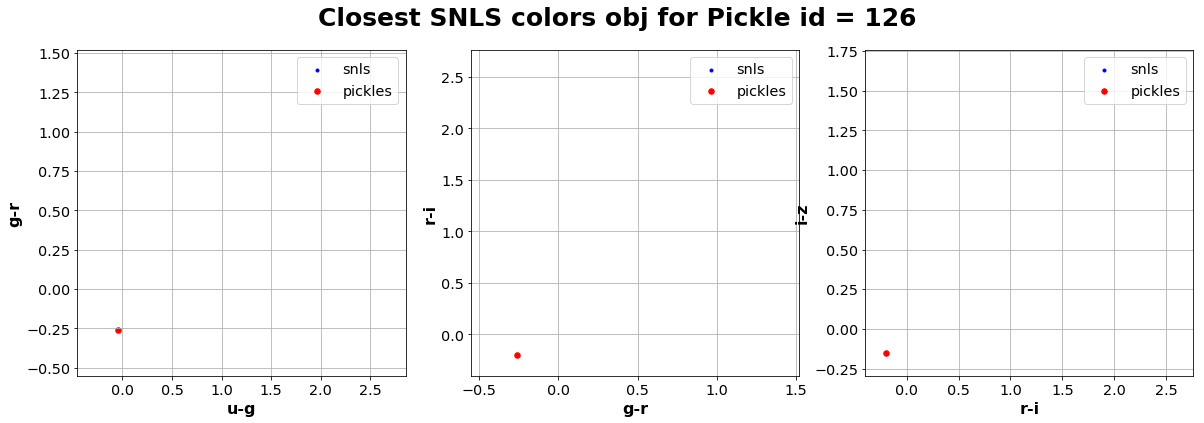

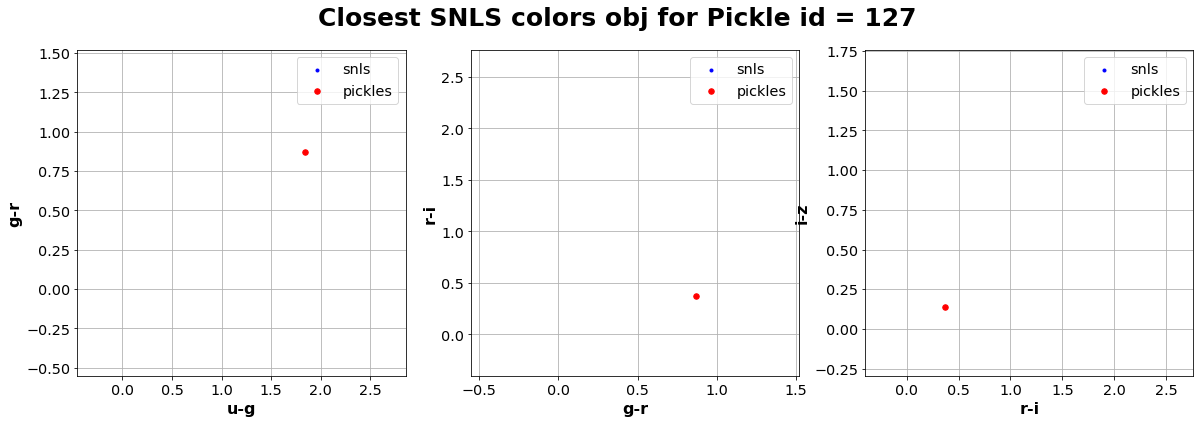

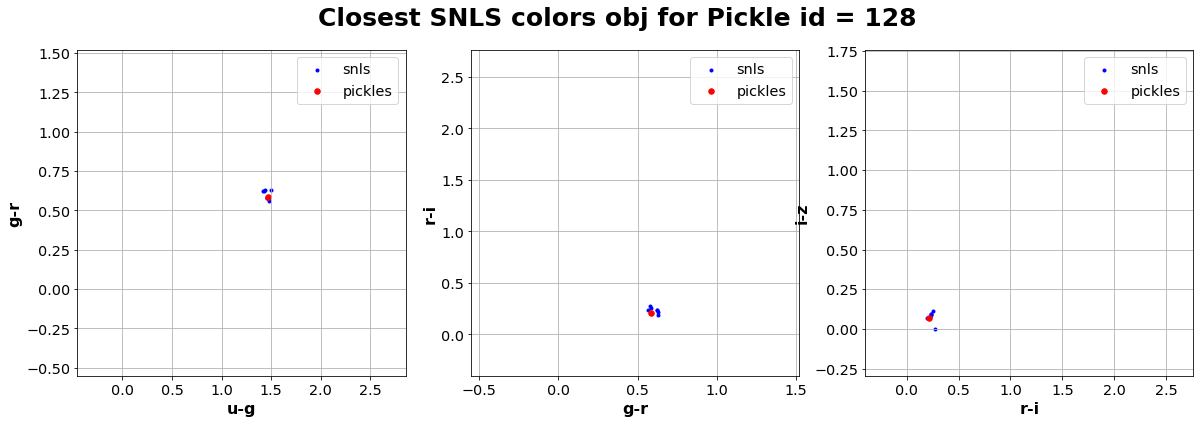

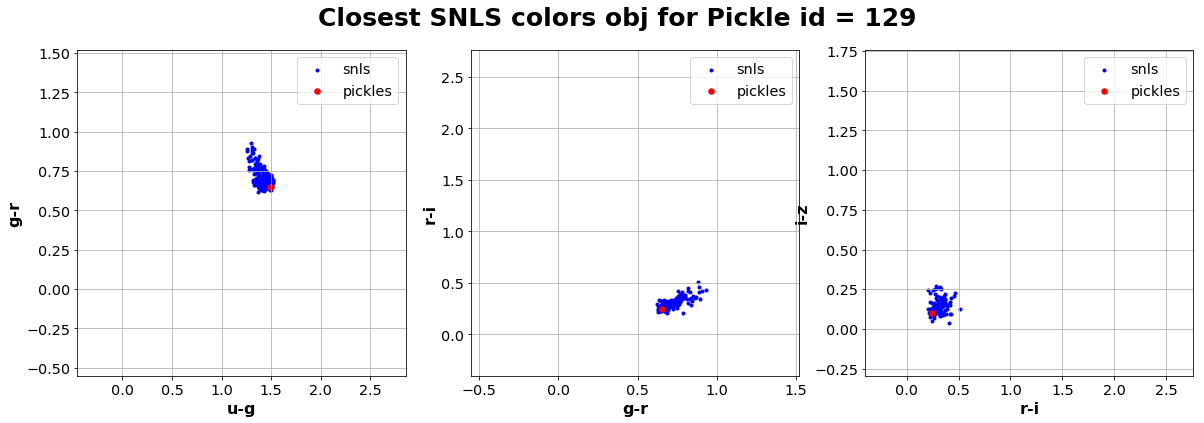

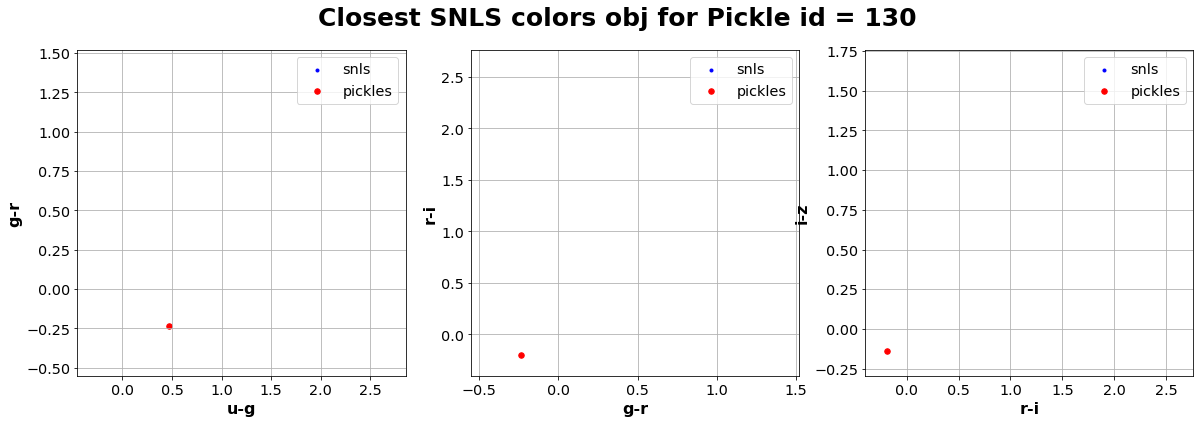

In [53]:
for idx in np.arange(X_train.shape[0]):
    Plot2DColorsID(idx,X_train,X,y_pred)

# Save the prediction

In [54]:
np.savetxt(file_prediction,y_pred)

In [55]:
len(y_pred)

12962